In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


## Loading data

In [4]:
test = pd.read_csv('/home/nadia/Documents/DICODING/MLPemula/house-prices-advanced-regression-techniques/test.csv')
test.head()

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [5]:
train = pd.read_csv('/home/nadia/Documents/DICODING/MLPemula/house-prices-advanced-regression-techniques/train.csv')
train.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

## Data Cleaning


Understanding data

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train.describe(include="all")

Id   MSSubClass  ... SaleCondition      SalePrice
count   1460.000000  1460.000000  ...          1460    1460.000000
unique          NaN          NaN  ...             6            NaN
top             NaN          NaN  ...        Normal            NaN
freq            NaN          NaN  ...          1198            NaN
mean     730.500000    56.897260  ...           NaN  180921.195890
std      421.610009    42.300571  ...           NaN   79442.502883
min        1.000000    20.000000  ...           NaN   34900.000000
25%      365.750000    20.000000  ...           NaN  129975.000000
50%      730.500000    50.000000  ...           NaN  163000.000000
75%     1095.250000    70.000000  ...           NaN  214000.000000
max     1460.000000   190.000000  ...           NaN  755000.000000

[11 rows x 81 columns]

Manage missing value

In [9]:
missing_values = train.isnull().sum()
missing_percentage = (missing_values/ len(train))*100

missing_data = pd.DataFrame({
    'Missing Values':missing_values,
    'Percentage' : missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]

Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageQual                81    5.547945
GarageFinish              81    5.547945
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageCond                81    5.547945
BsmtFinType2              38    2.602740
BsmtExposure              38    2.602740
BsmtCond                  37    2.534247
BsmtQual                  37    2.534247
BsmtFinType1              37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493

In [10]:
missing_values = train.isnull().sum()
missing_values[missing_values > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
# less = missing_values[missing_values < 1000][missing_values > 0].index
# less

less = missing_values[missing_values < 1000].index
less

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [12]:
over = missing_values[missing_values >= 1000].index
over

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [13]:
missing_values[less][missing_values > 0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [14]:
numeric_features = train[less].select_dtypes(include=["number"]).columns
print(numeric_features)
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median())

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [15]:
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median())

In [16]:
update_miss_vals = train.isnull().sum()[missing_values>0][missing_values<1000]
update_miss_vals

LotFrontage       0
MasVnrType      872
MasVnrArea        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt       0
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [17]:
kategorical_features = train[less].select_dtypes(include=["object"]).columns
print(kategorical_features)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [18]:
for column in kategorical_features:
    train[column] = train[column].fillna(train[column].mode()[0])

In [19]:
train[less].isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [20]:
df = train.drop(columns=over)

In [21]:
df.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 77 columns]

In [22]:
missing_values = df.isnull().sum()
missing_values[missing_values>0]

Series([], dtype: int64)

In [23]:
df.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 77 columns]

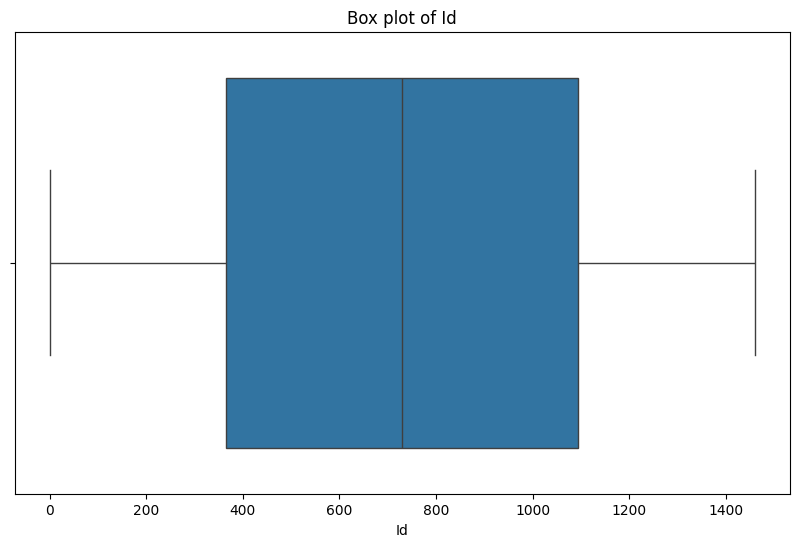

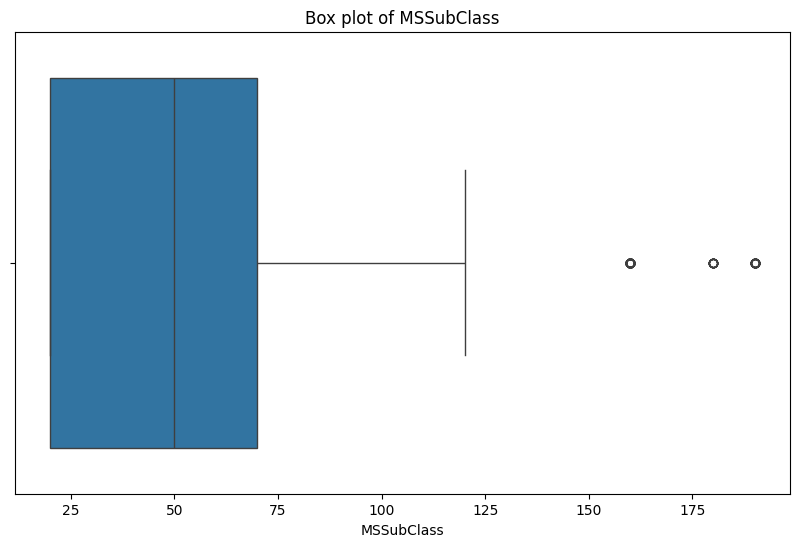

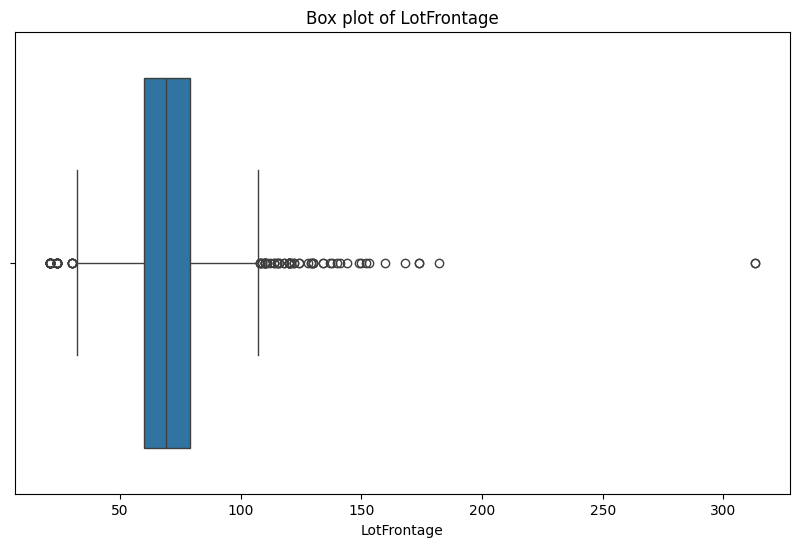

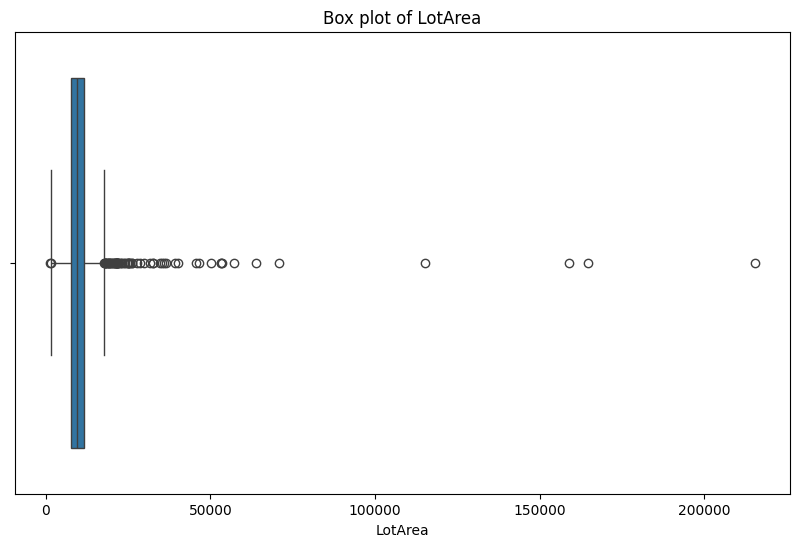

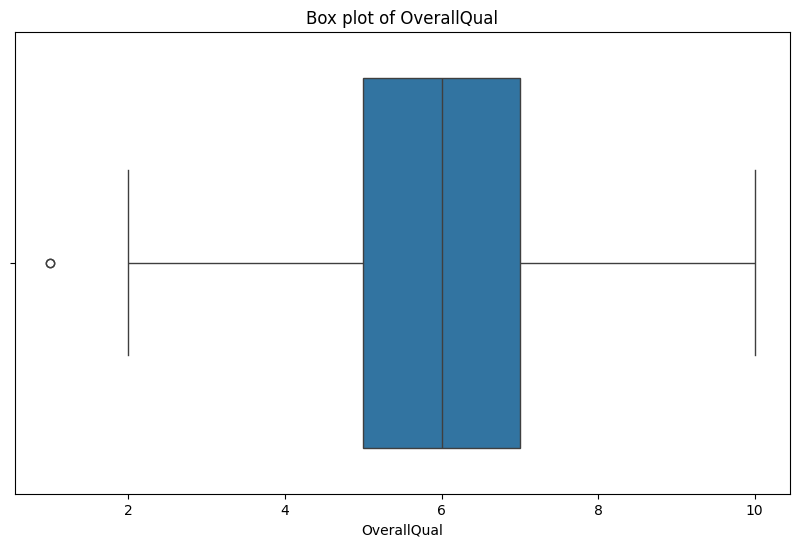

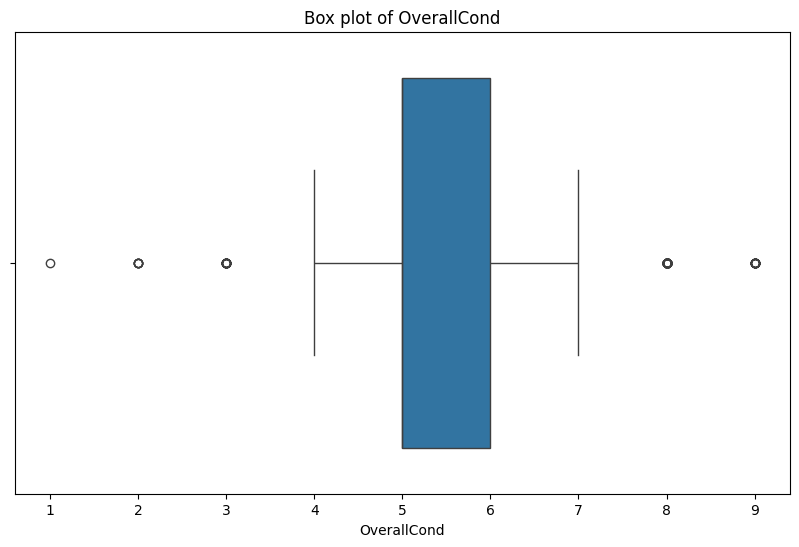

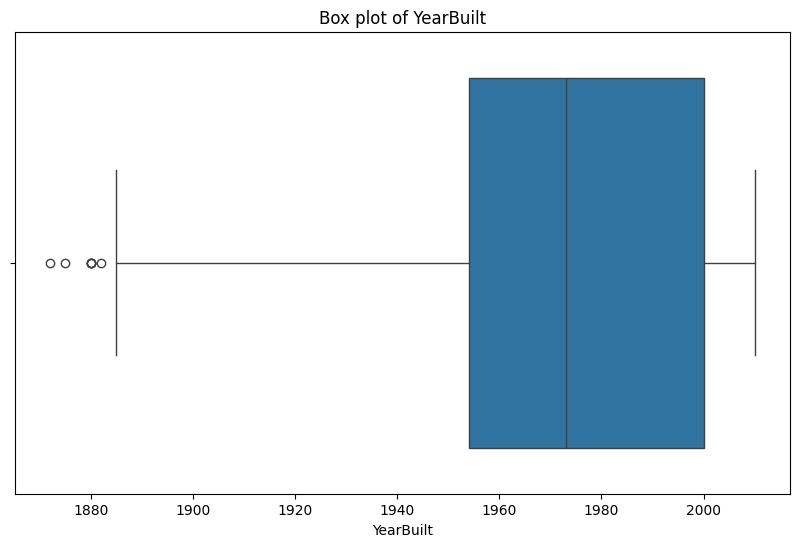

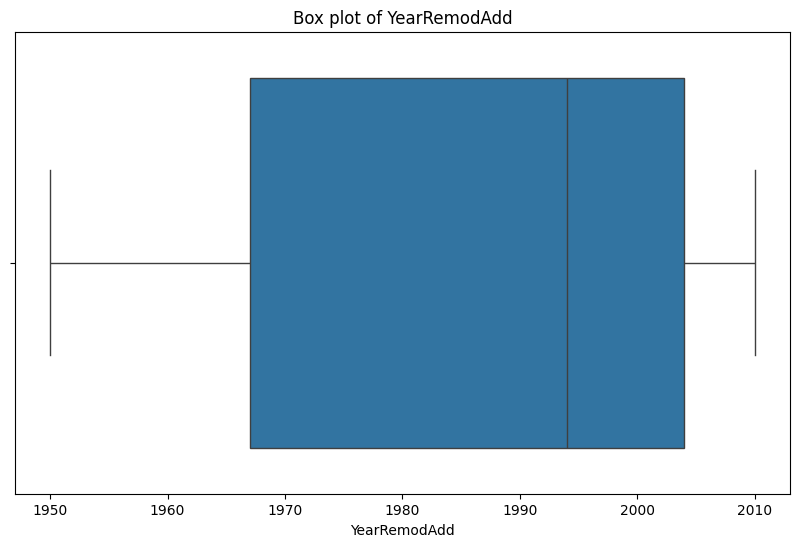

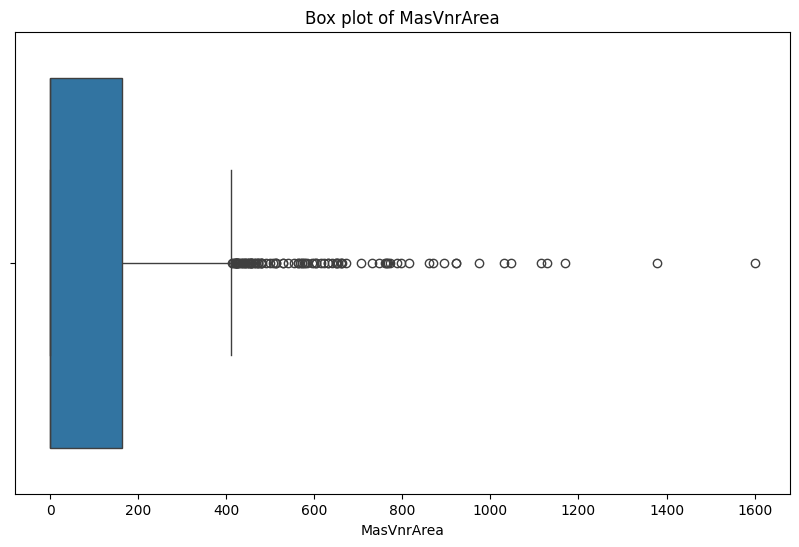

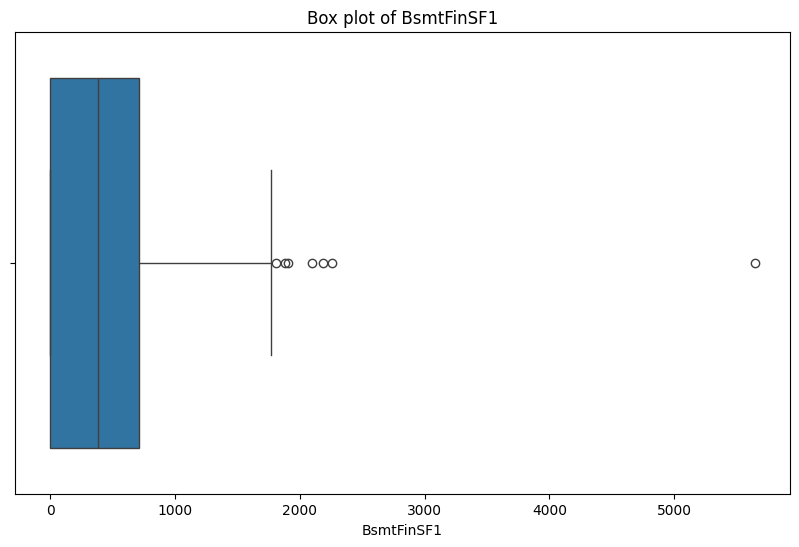

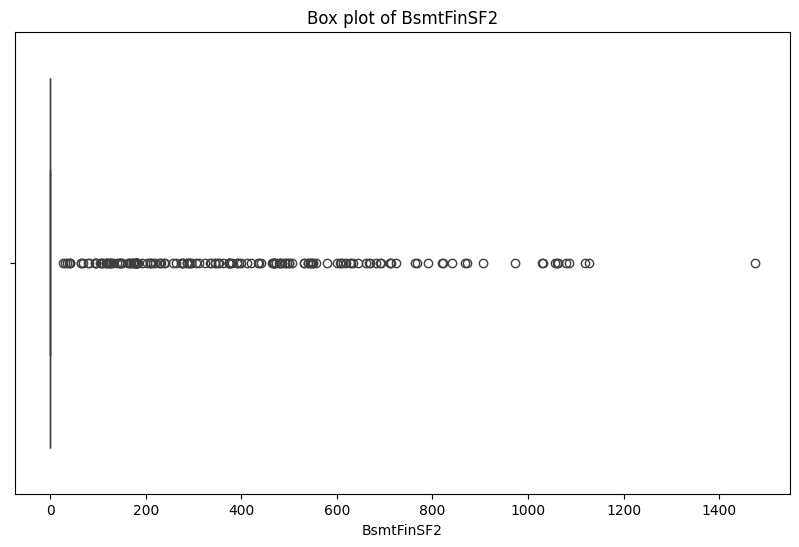

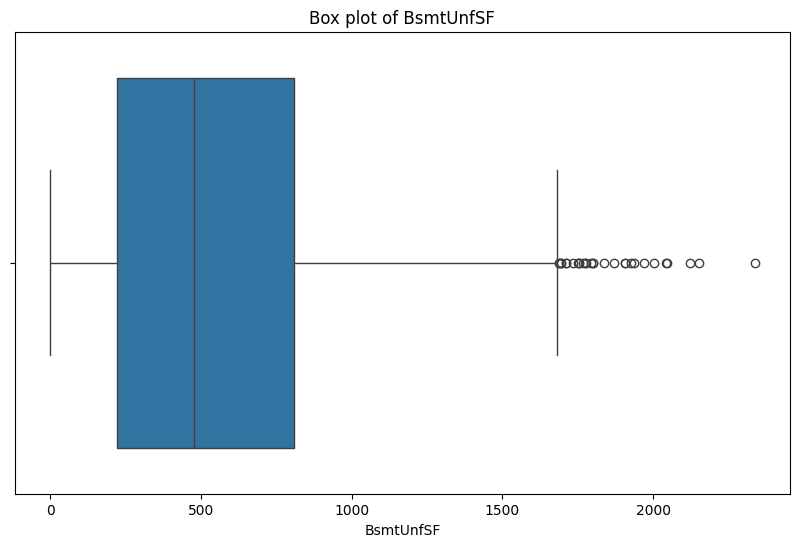

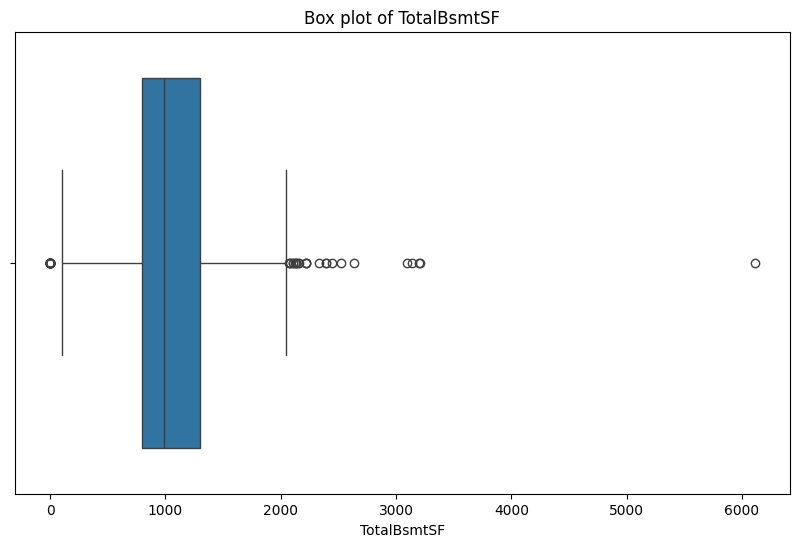

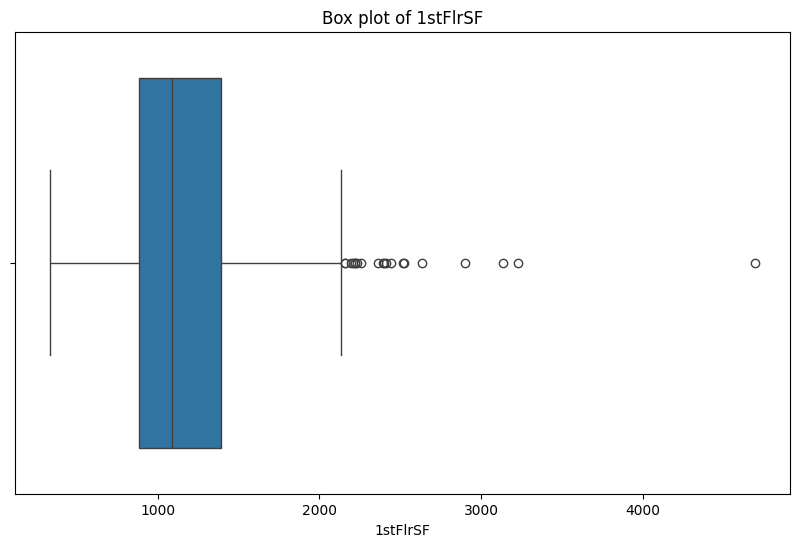

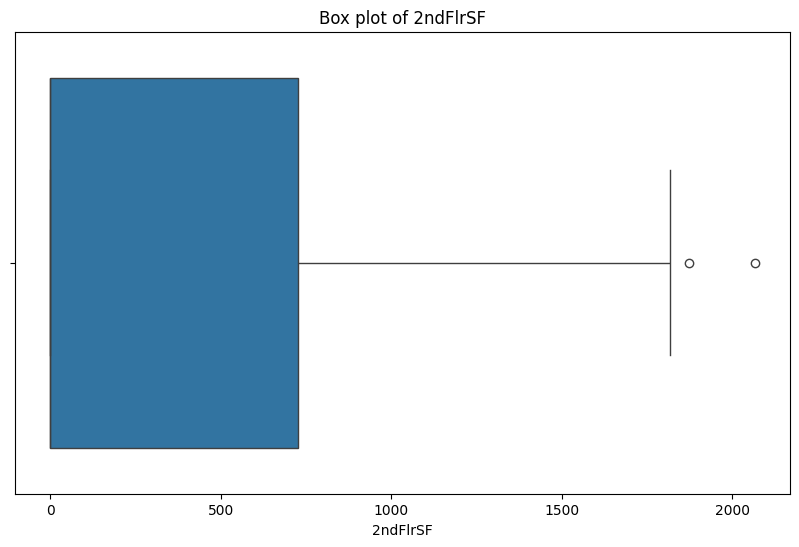

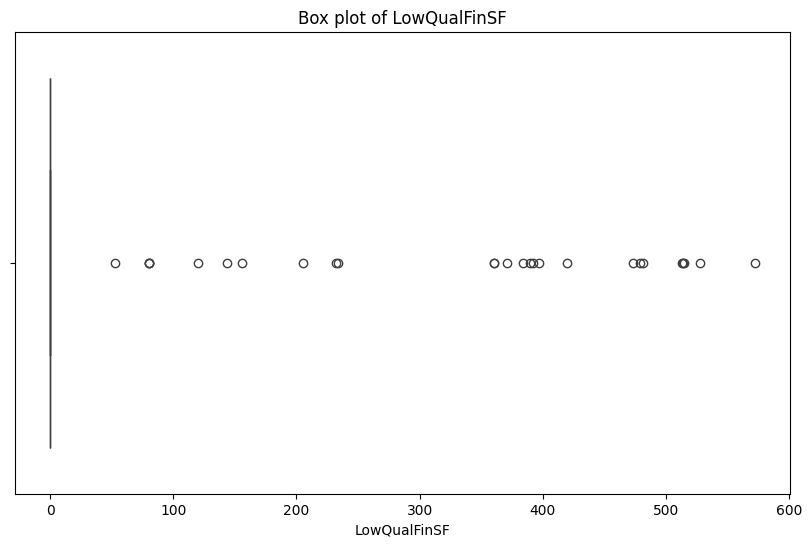

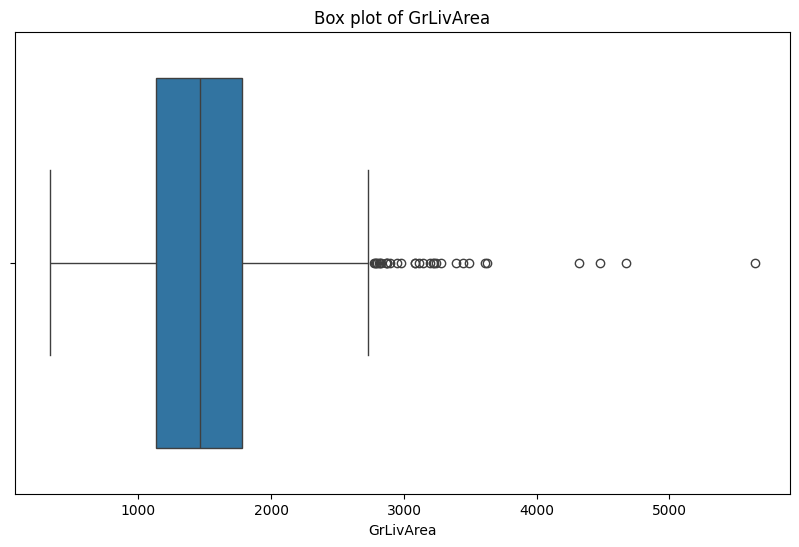

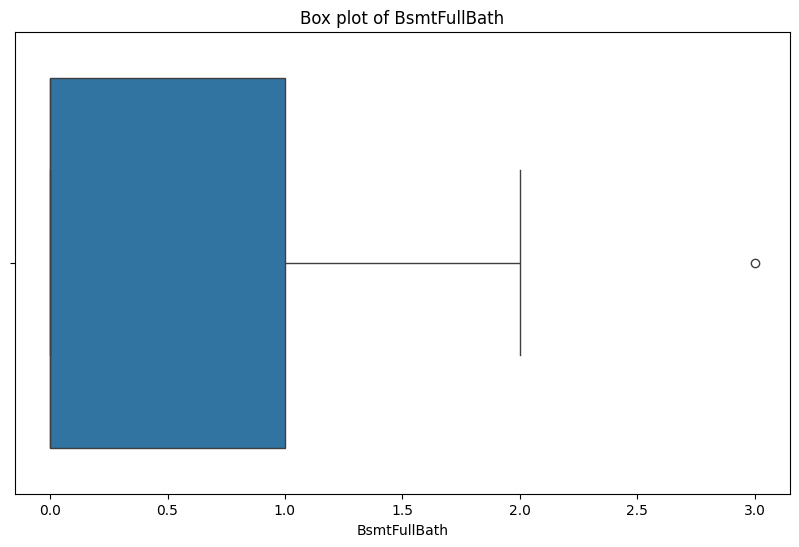

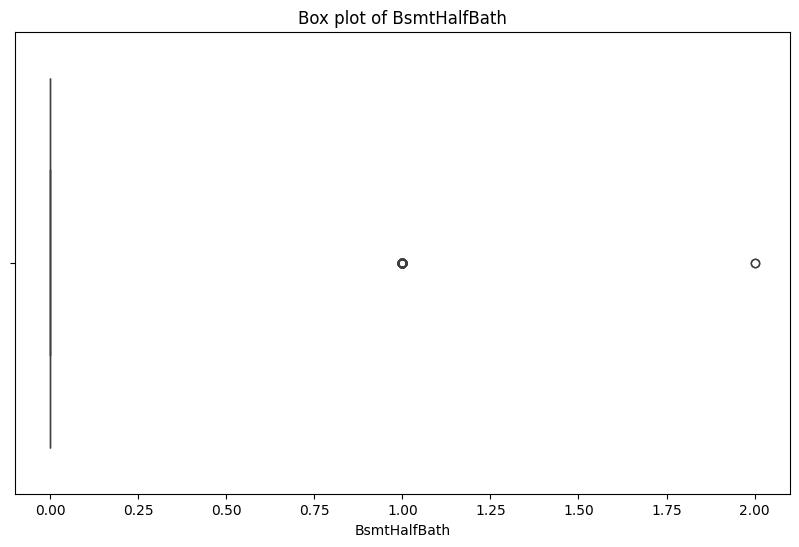

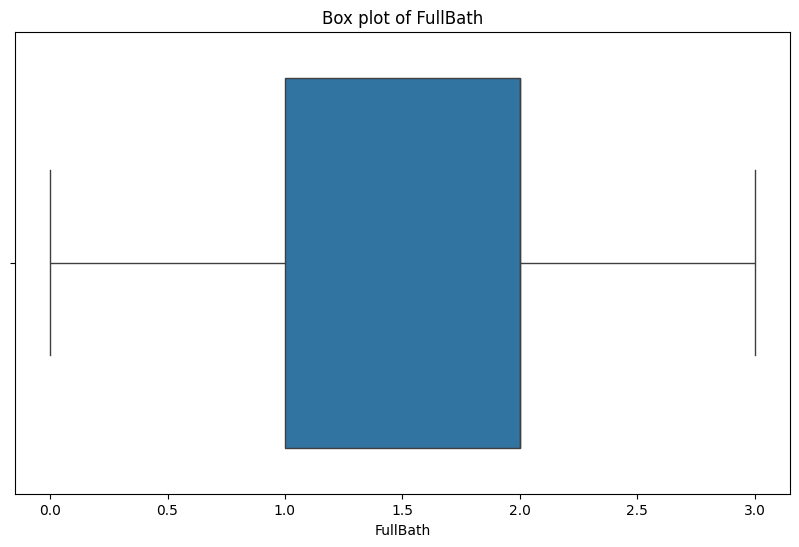

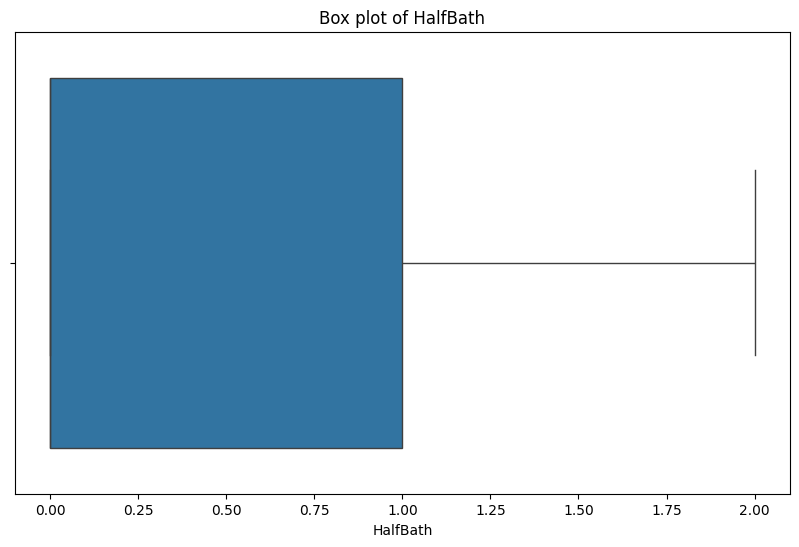

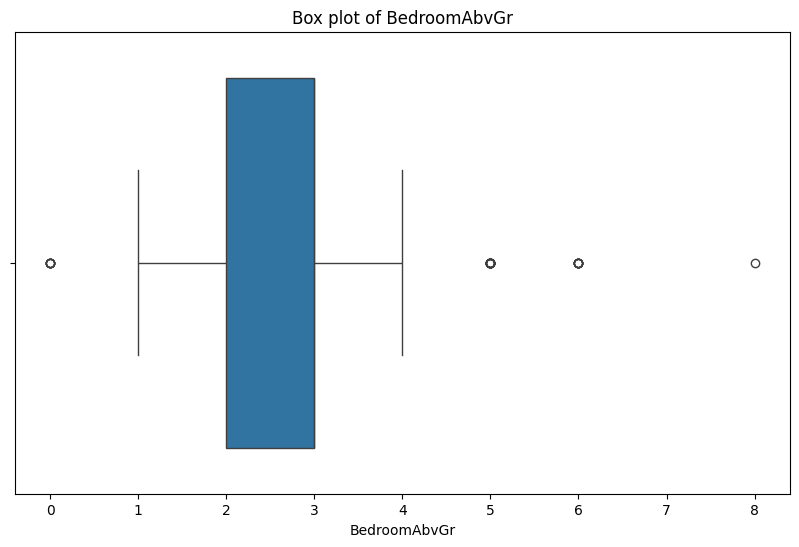

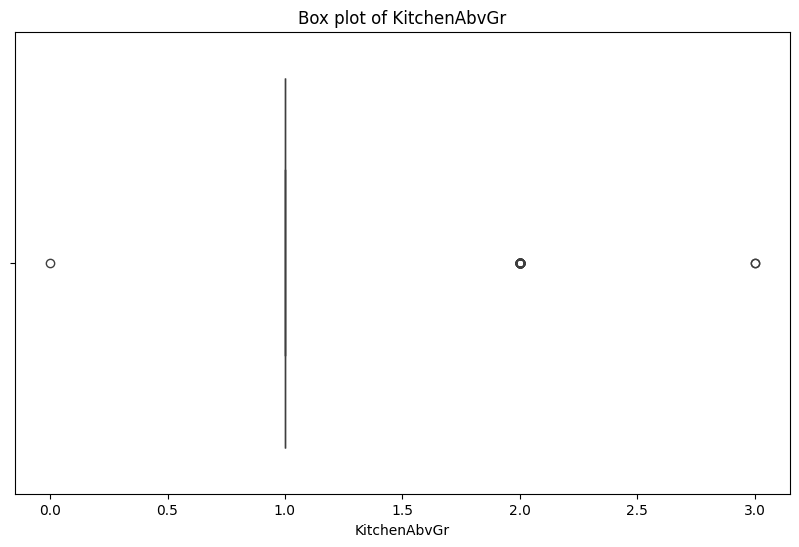

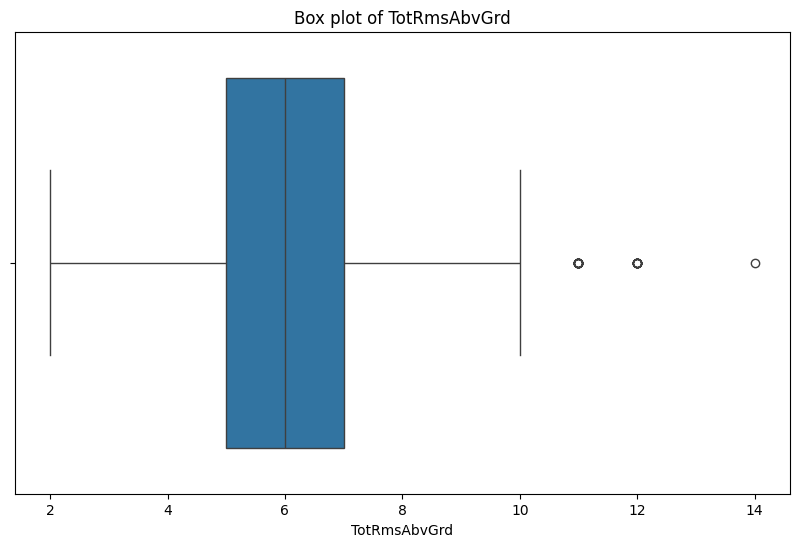

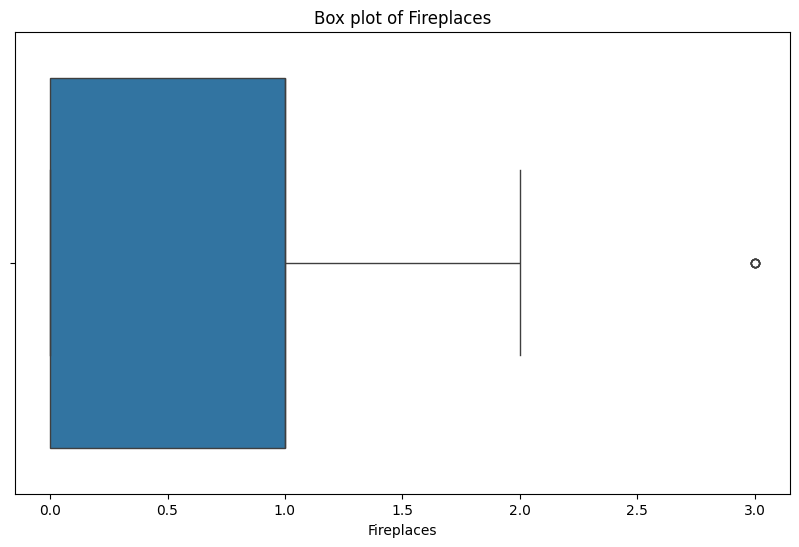

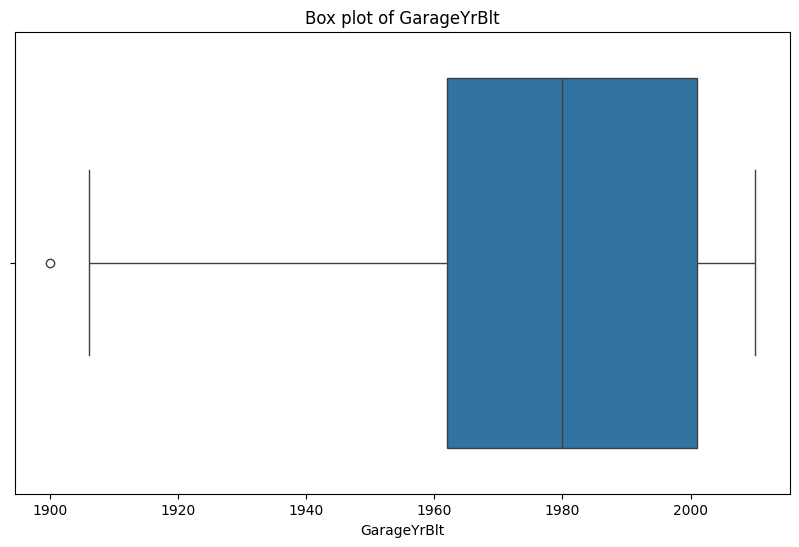

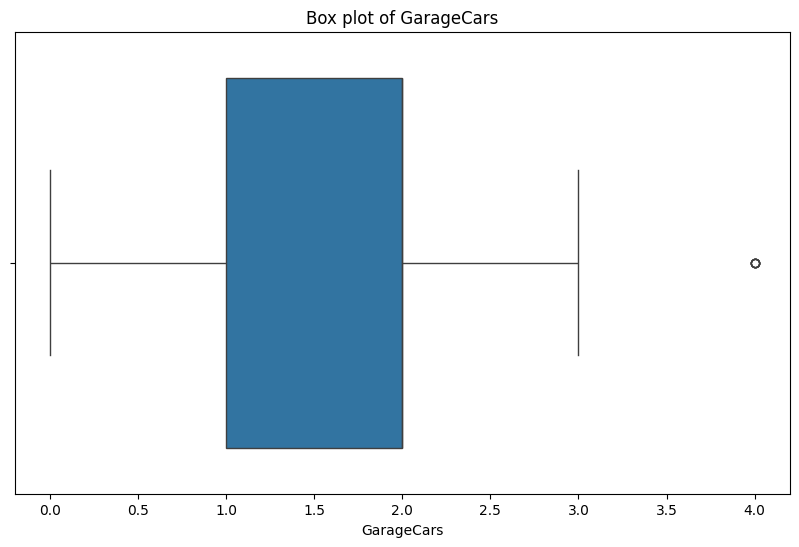

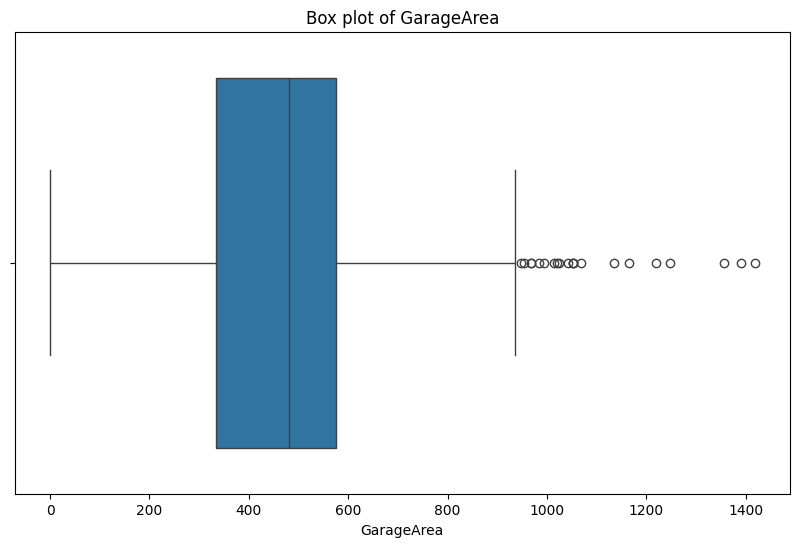

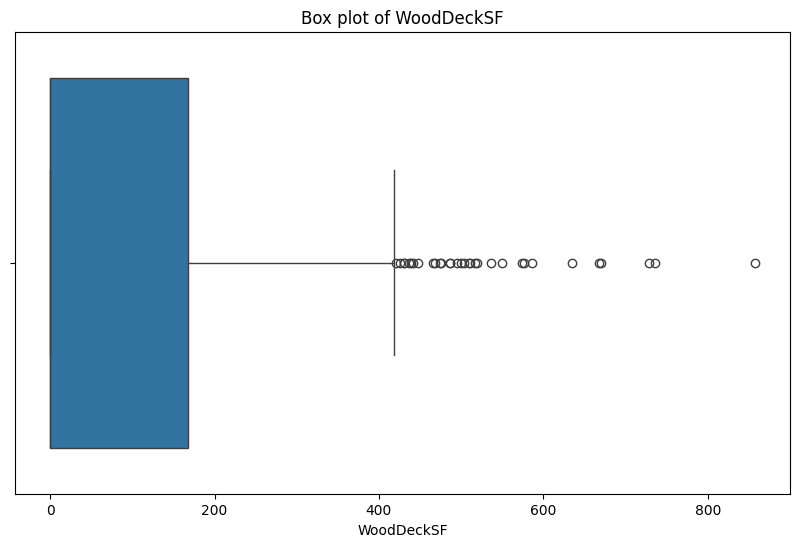

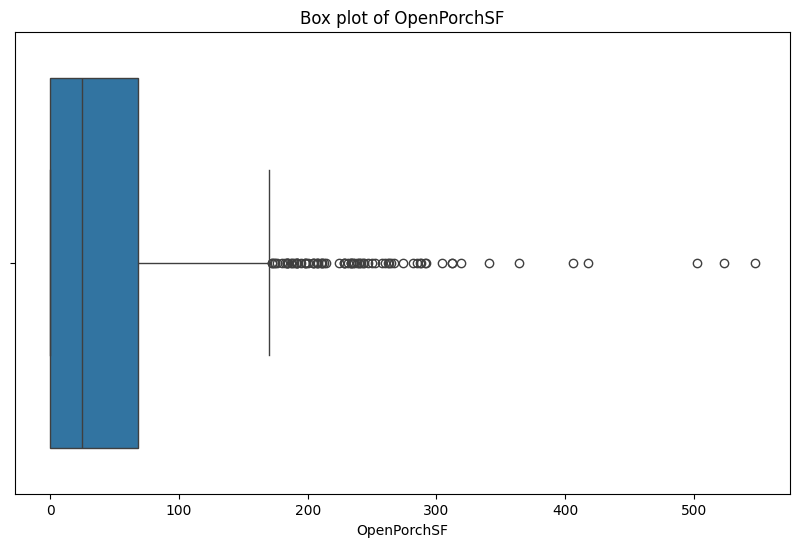

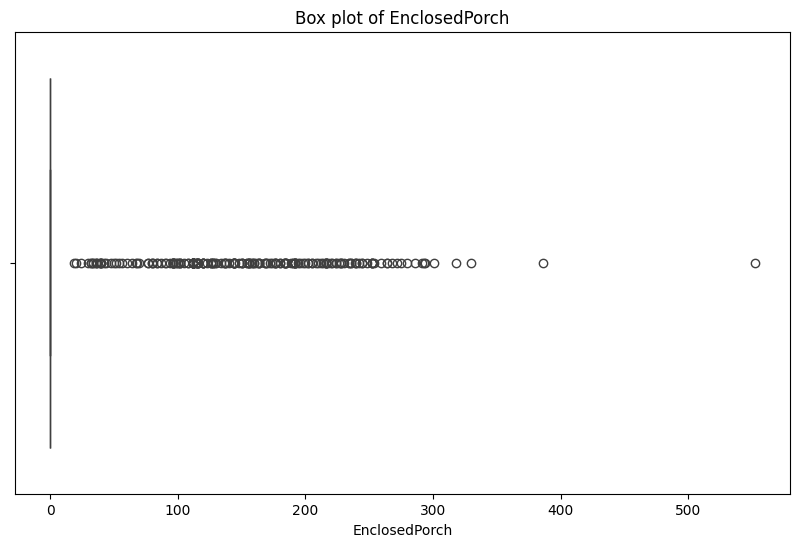

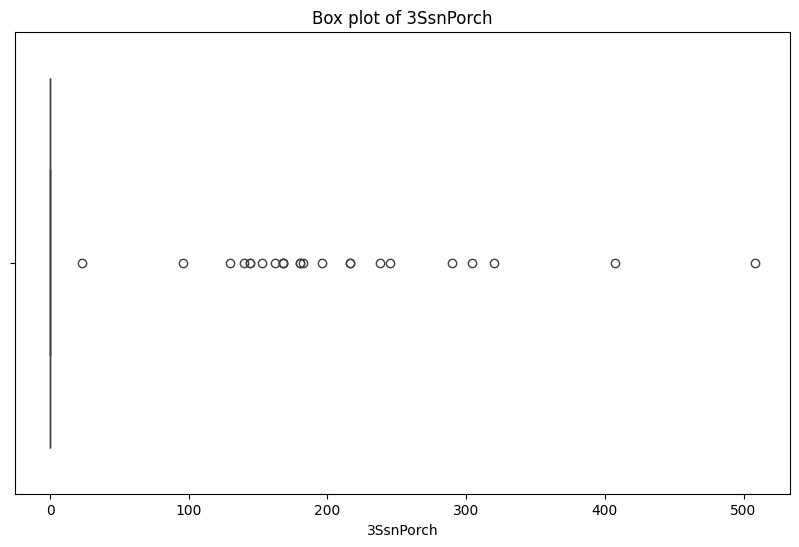

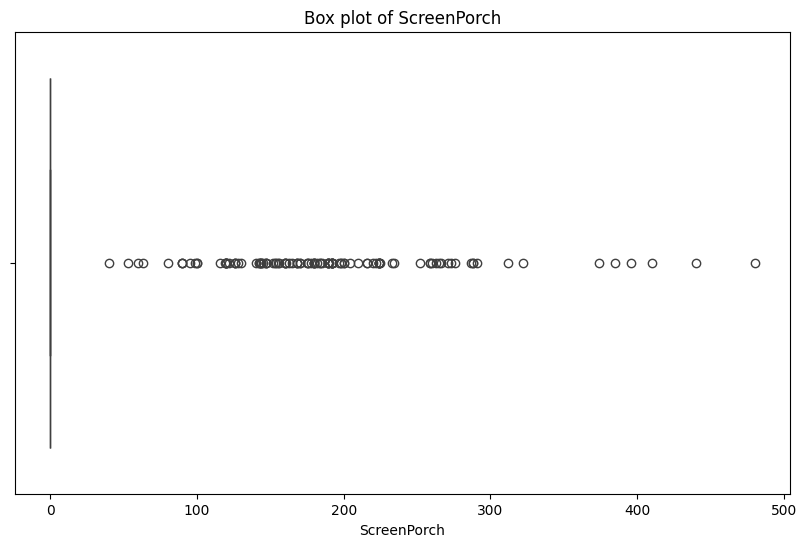

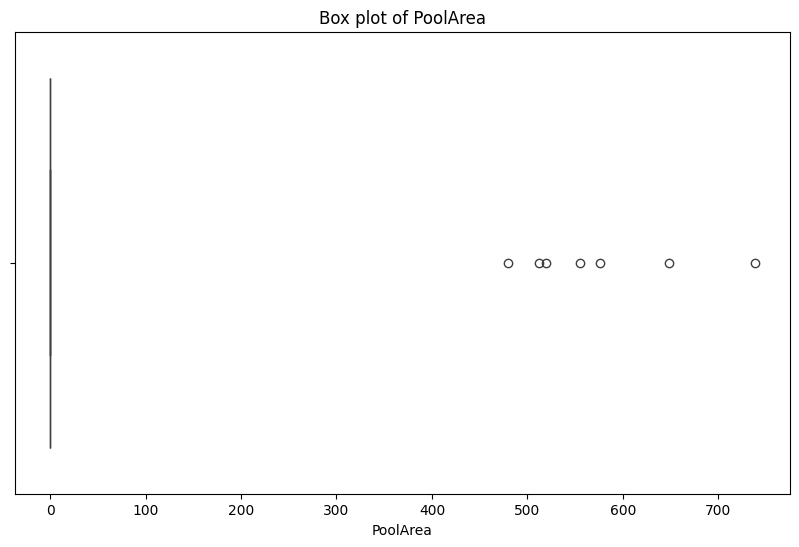

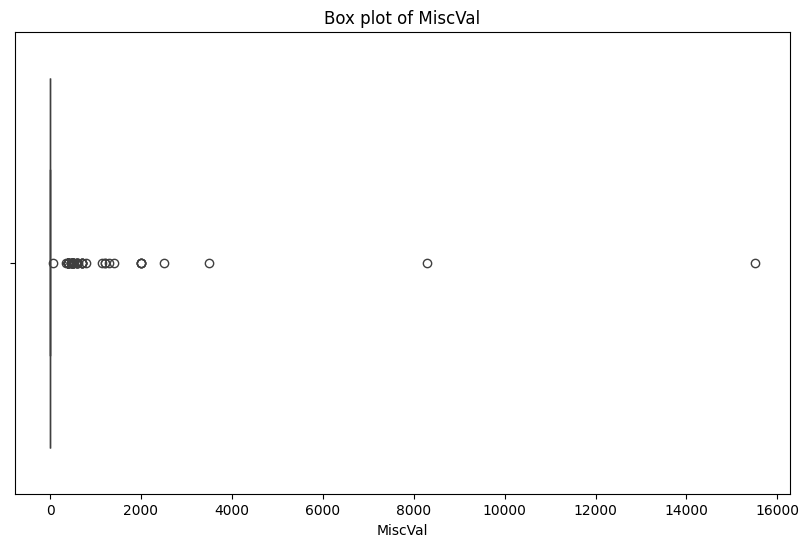

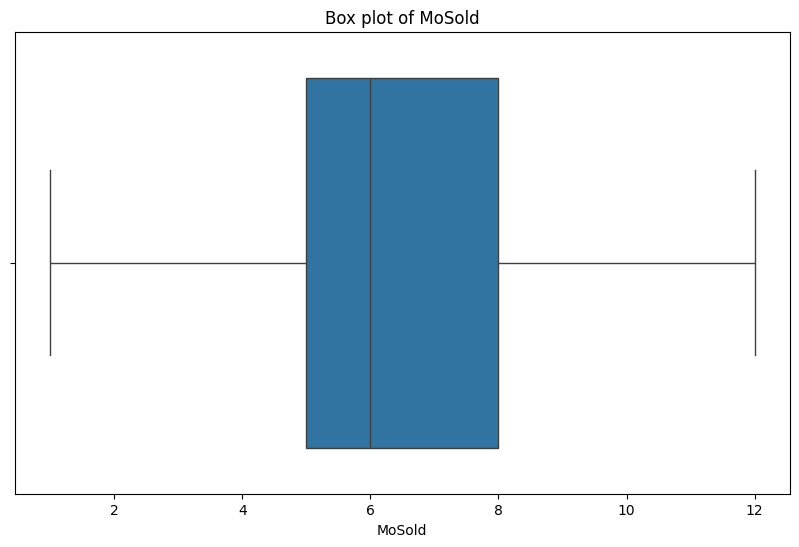

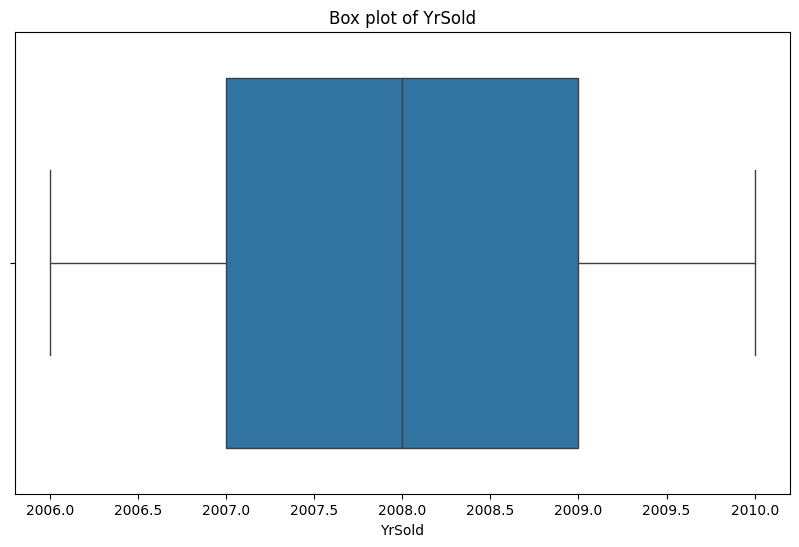

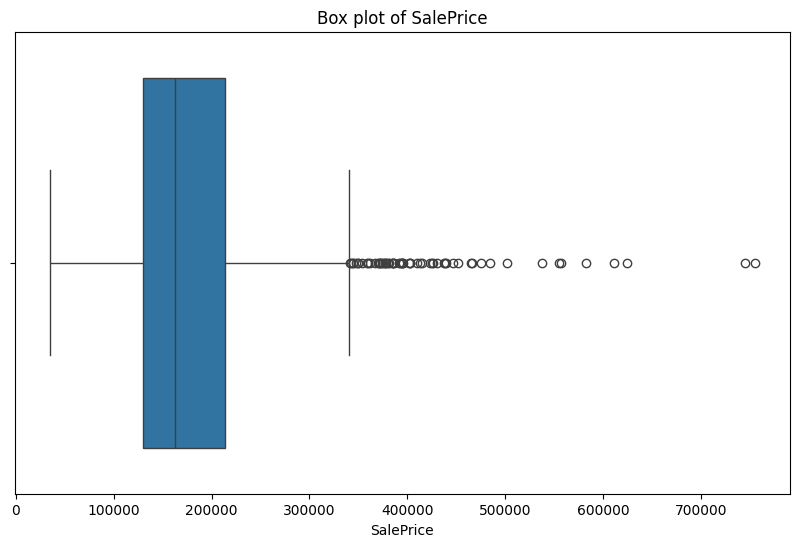

In [24]:
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [25]:
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3-Q1

In [26]:
df.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 77 columns]

In [27]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]
    
# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

In [28]:
df.head()

Id  MSSubClass  LotFrontage  ...  PavedDrive  SaleType  SaleCondition
0    1          60         65.0  ...           Y        WD         Normal
2    3          60         68.0  ...           Y        WD         Normal
4    5          60         84.0  ...           Y        WD         Normal
6    7          20         75.0  ...           Y        WD         Normal
10  11          20         70.0  ...           Y        WD         Normal

[5 rows x 77 columns]

In [29]:
condition = -((df[numeric_features] < (Q1-1.5*IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric,df.loc[condition, categorical_features]], axis=1)

In [30]:
df.head()

Id  MSSubClass  LotFrontage  ...  PavedDrive  SaleType  SaleCondition
0    1          60         65.0  ...           Y        WD         Normal
2    3          60         68.0  ...           Y        WD         Normal
4    5          60         84.0  ...           Y        WD         Normal
6    7          20         75.0  ...           Y        WD         Normal
10  11          20         70.0  ...           Y        WD         Normal

[5 rows x 77 columns]

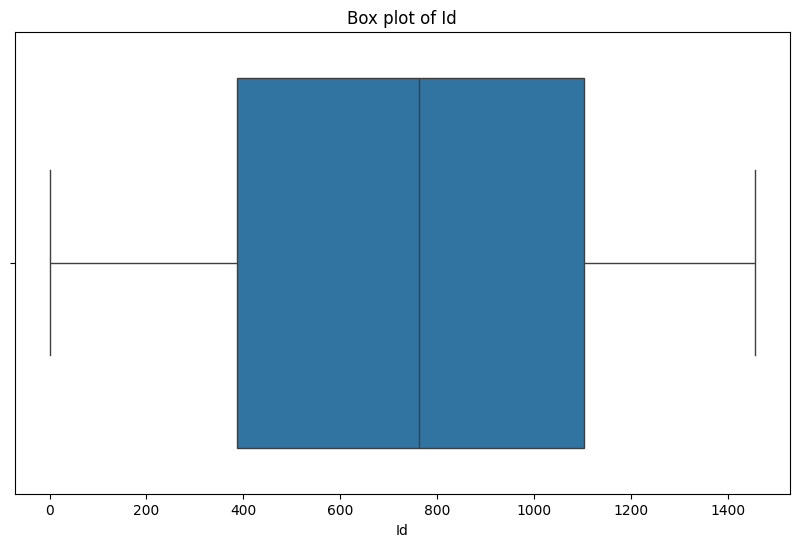

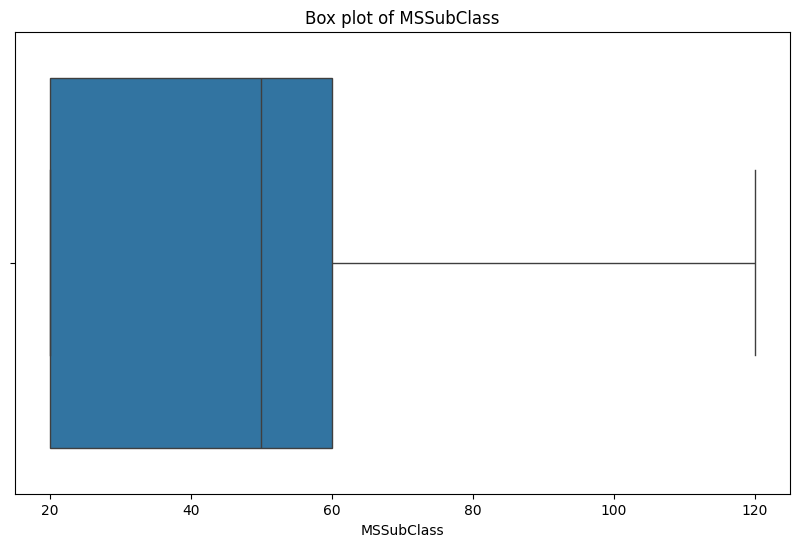

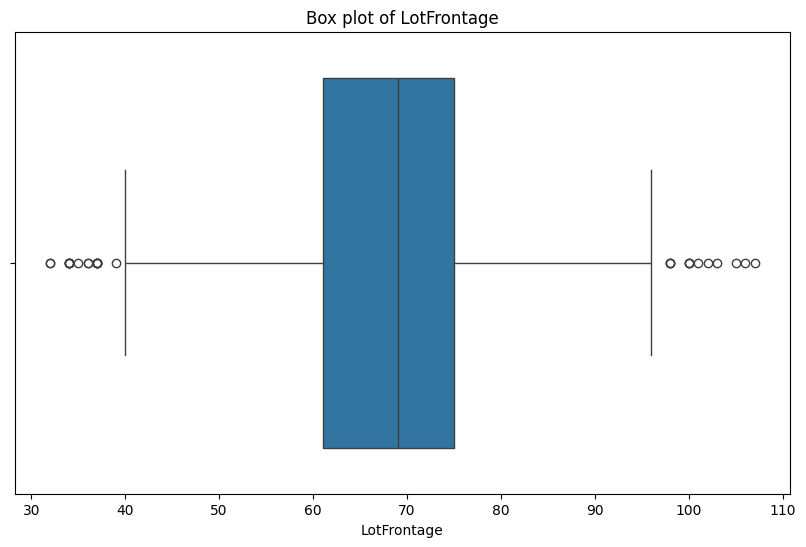

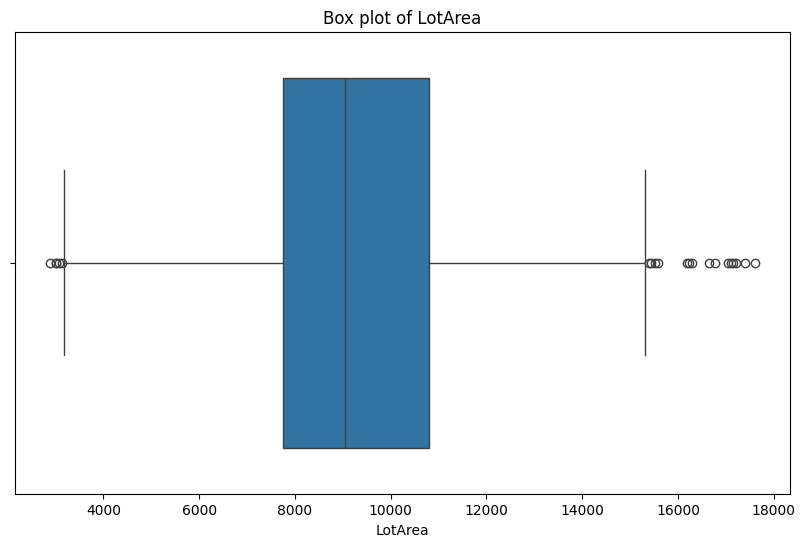

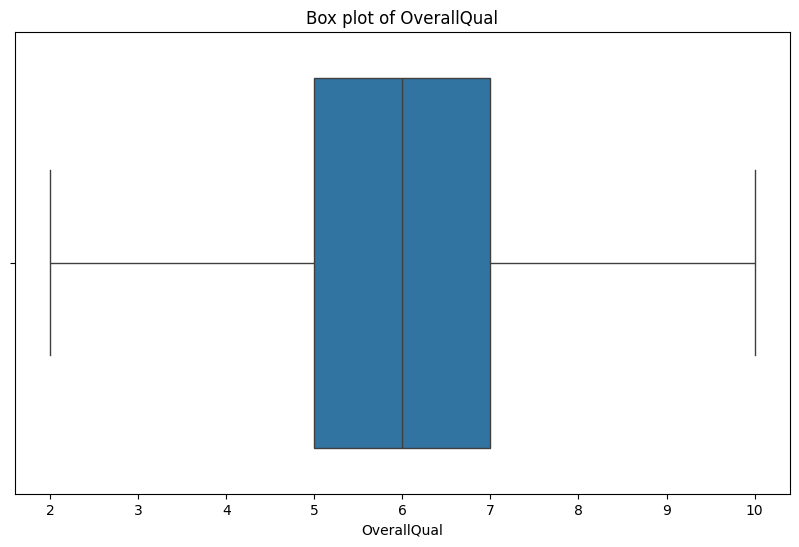

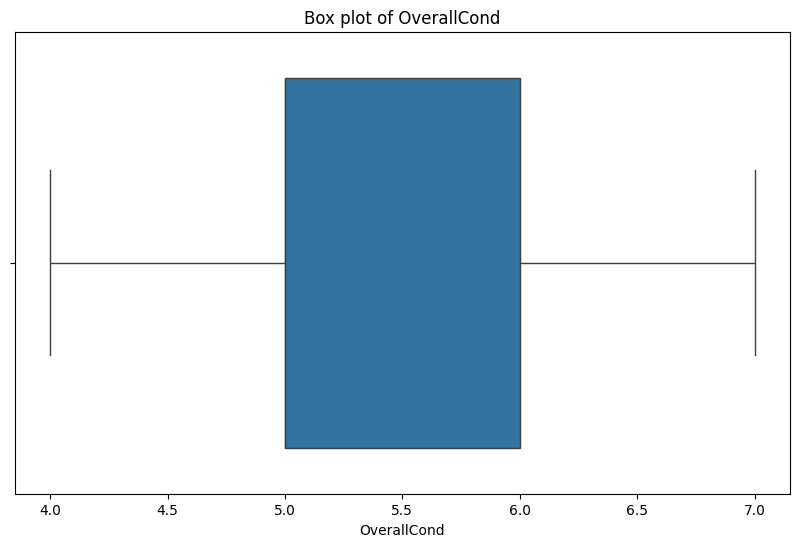

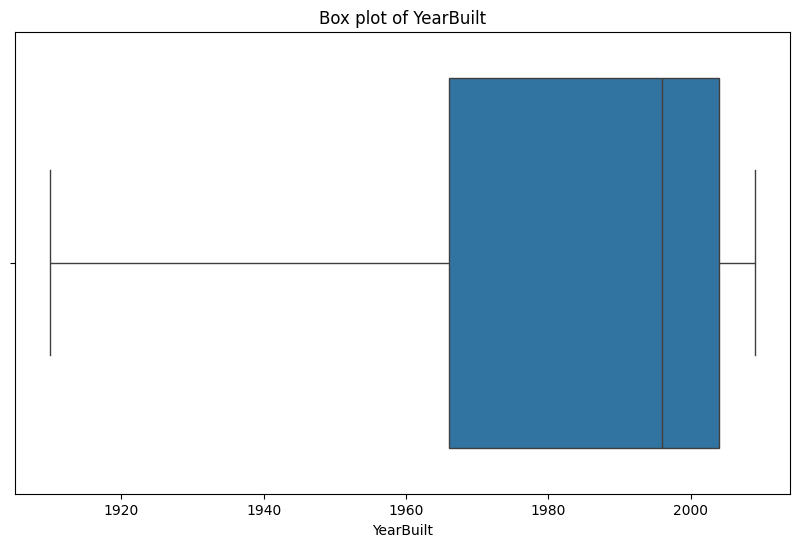

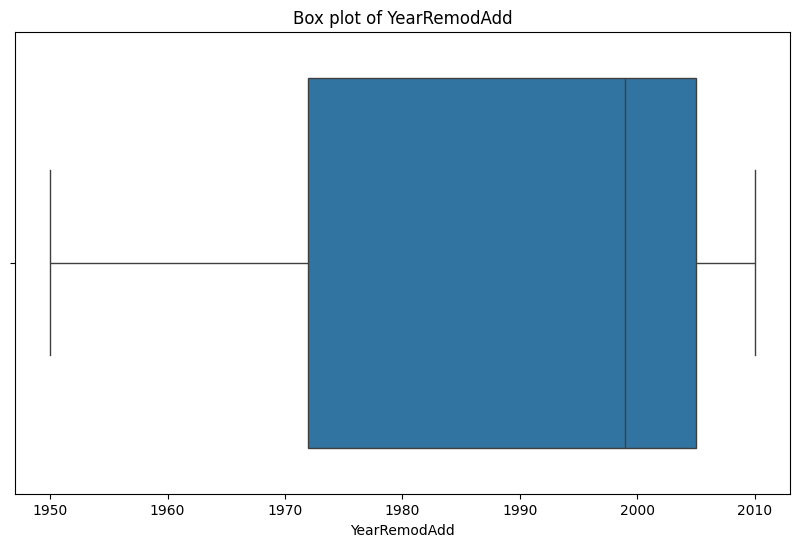

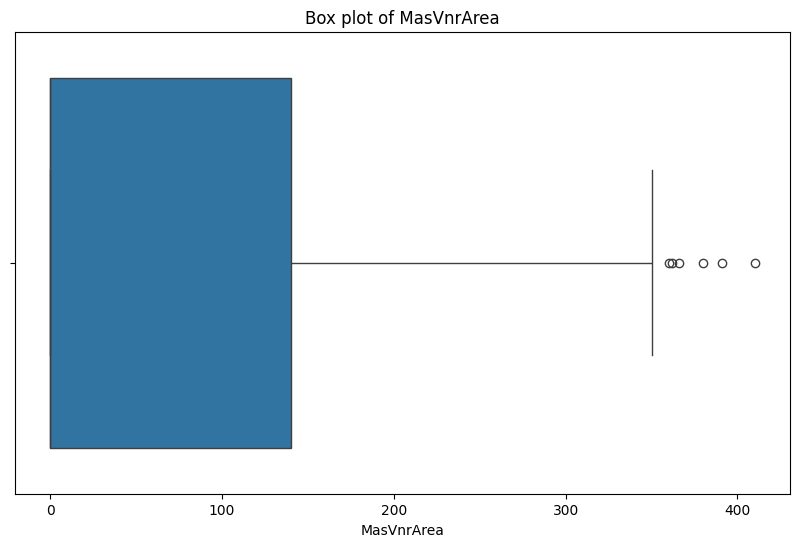

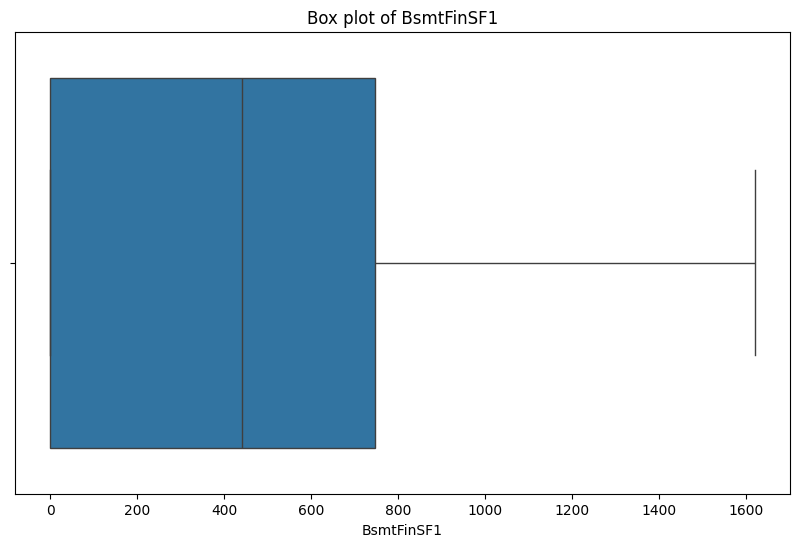

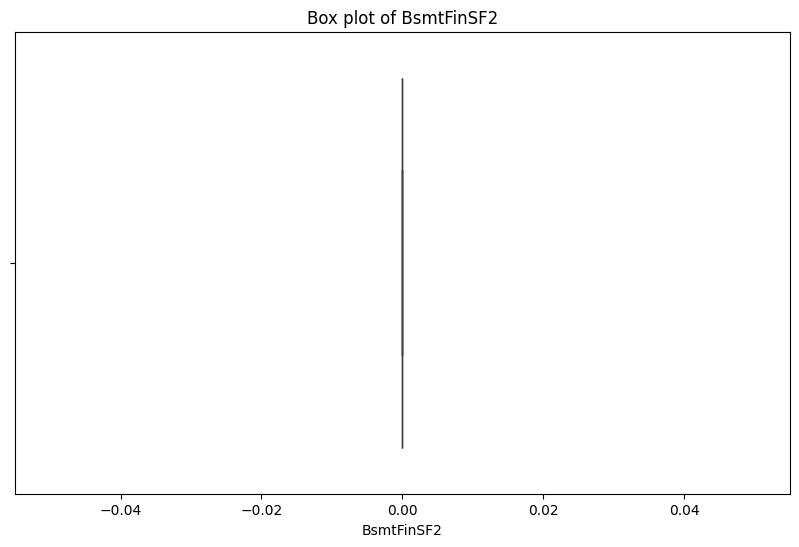

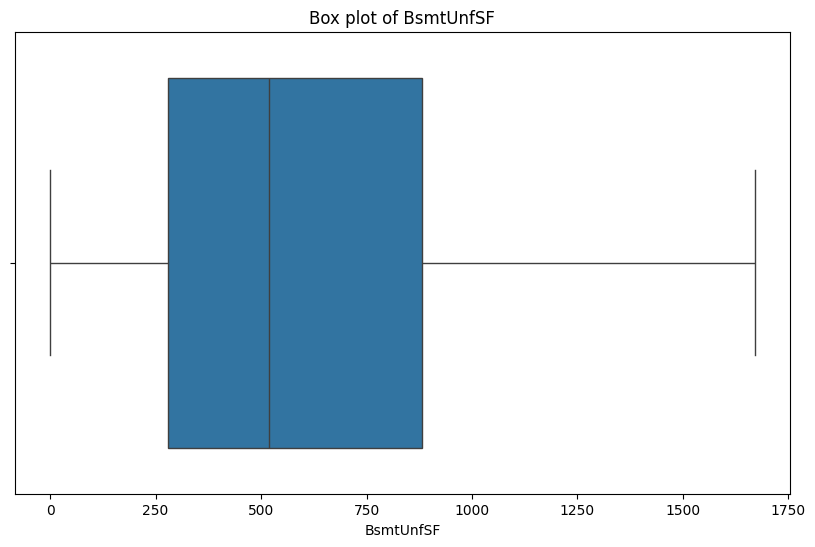

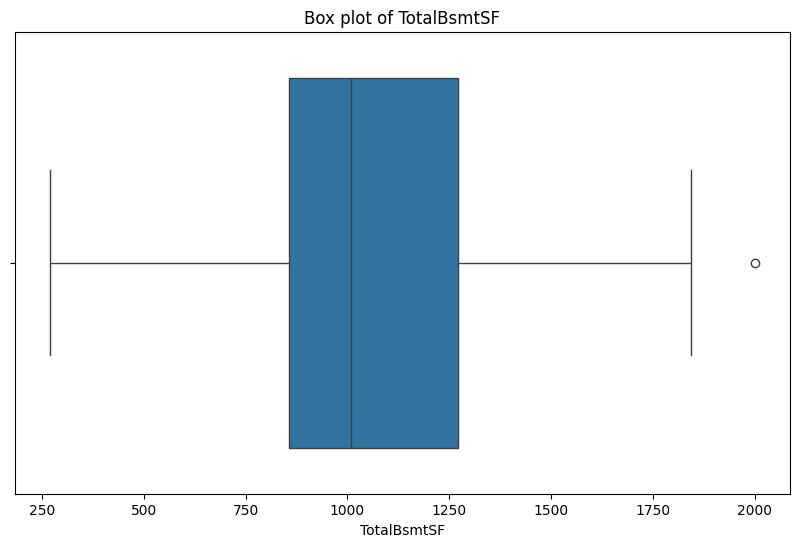

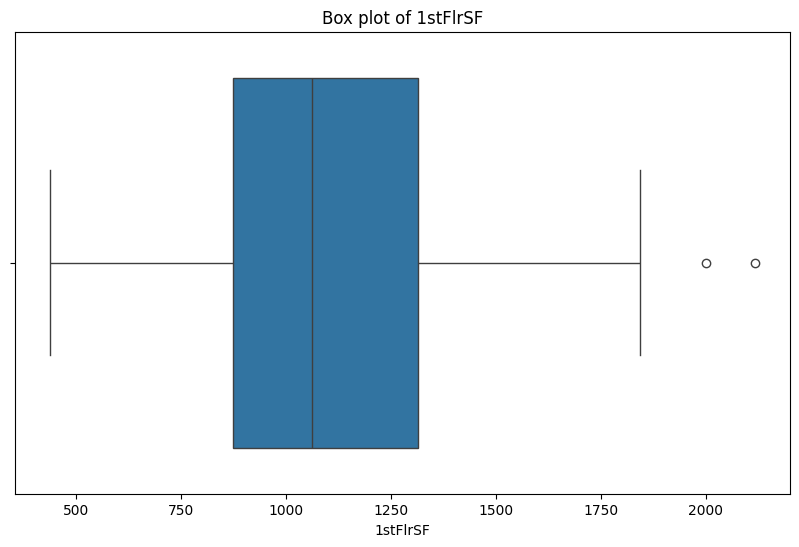

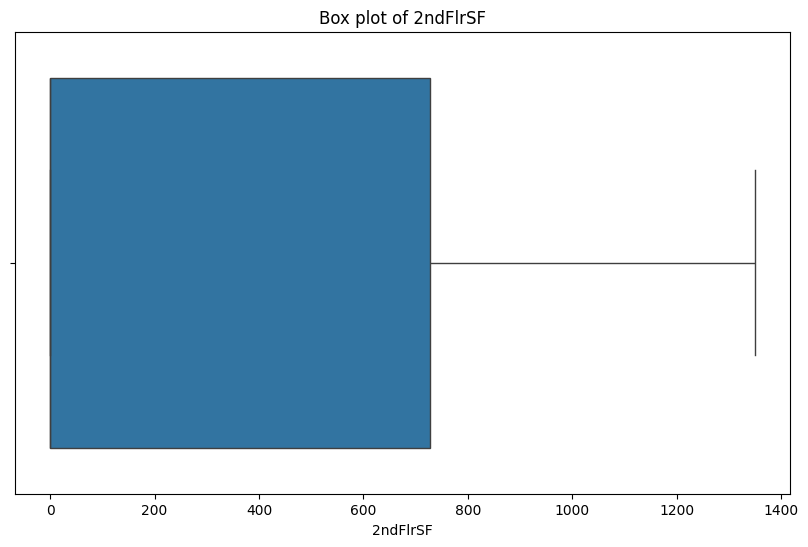

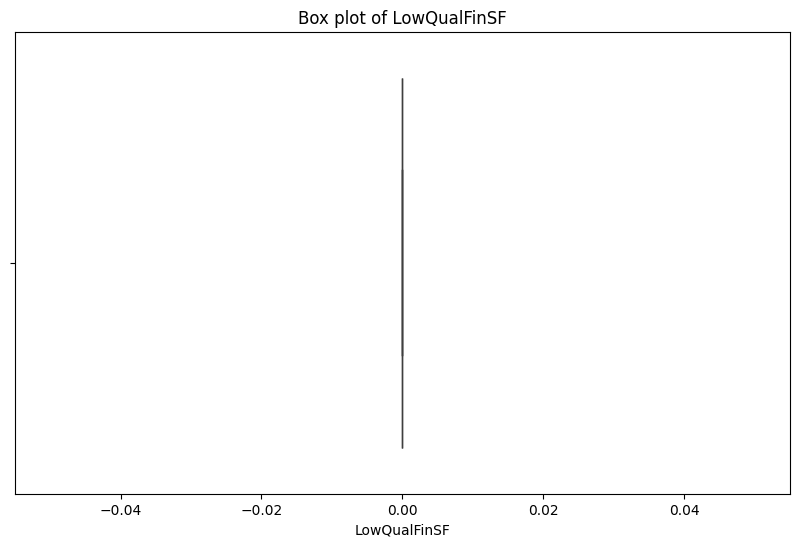

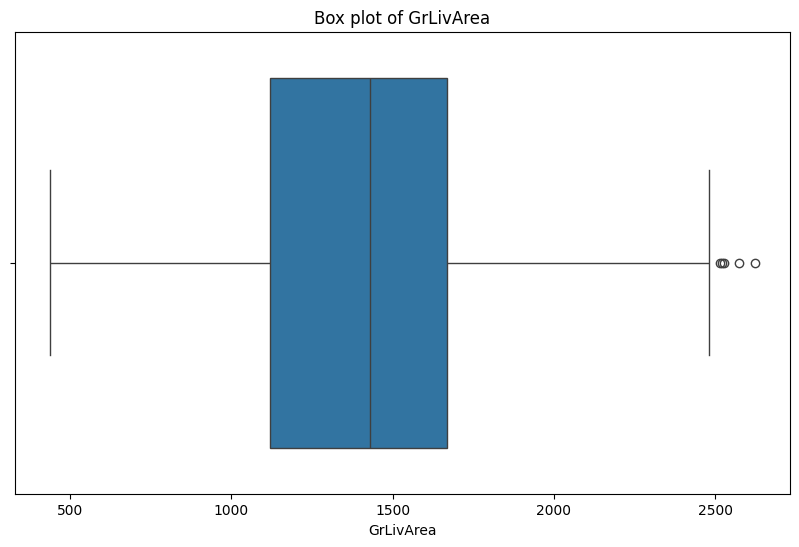

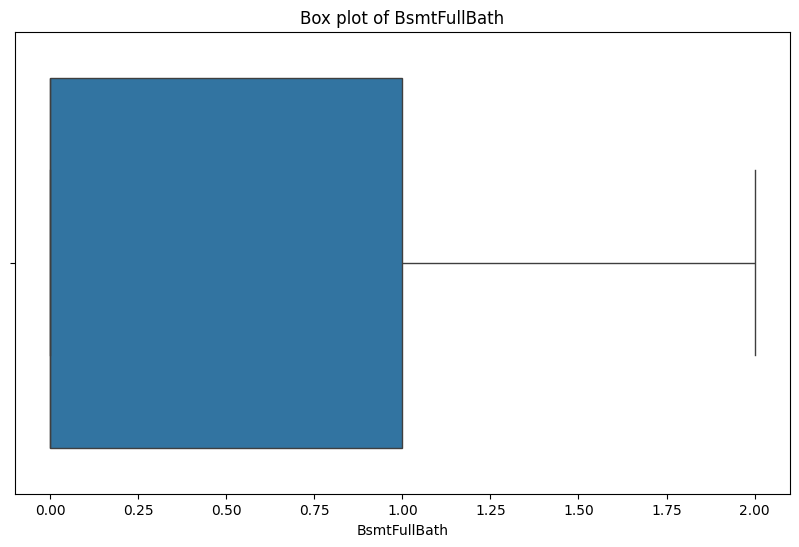

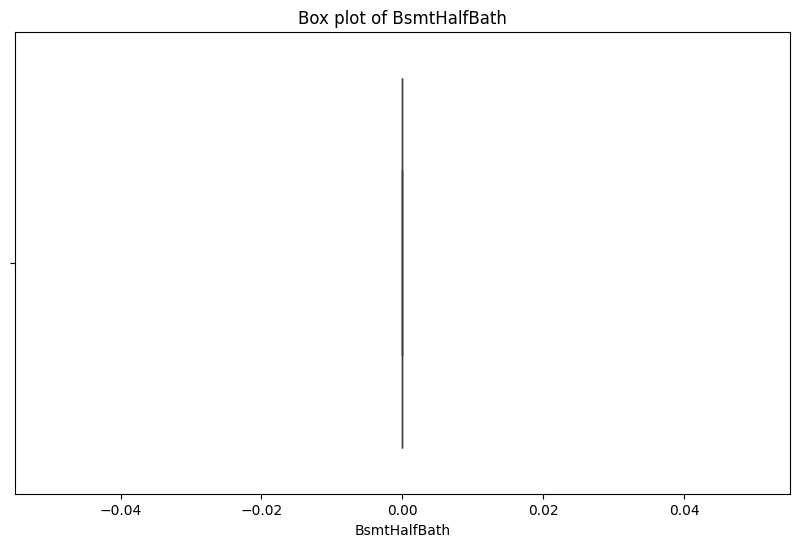

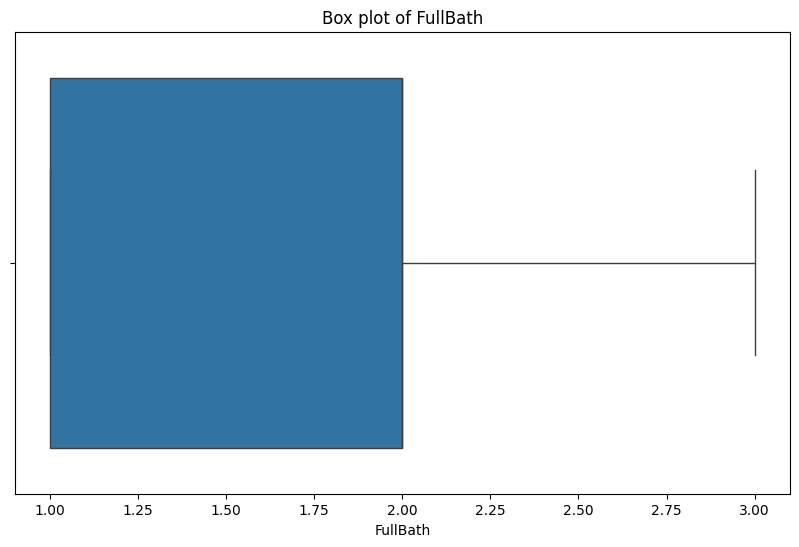

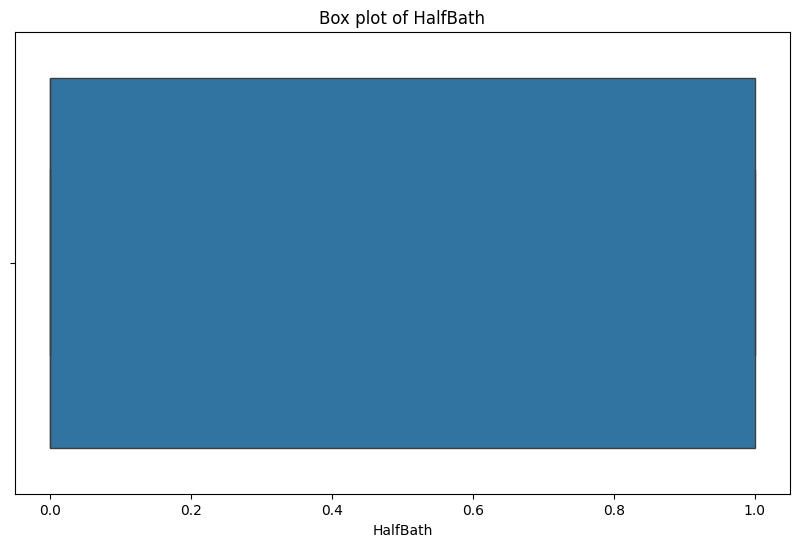

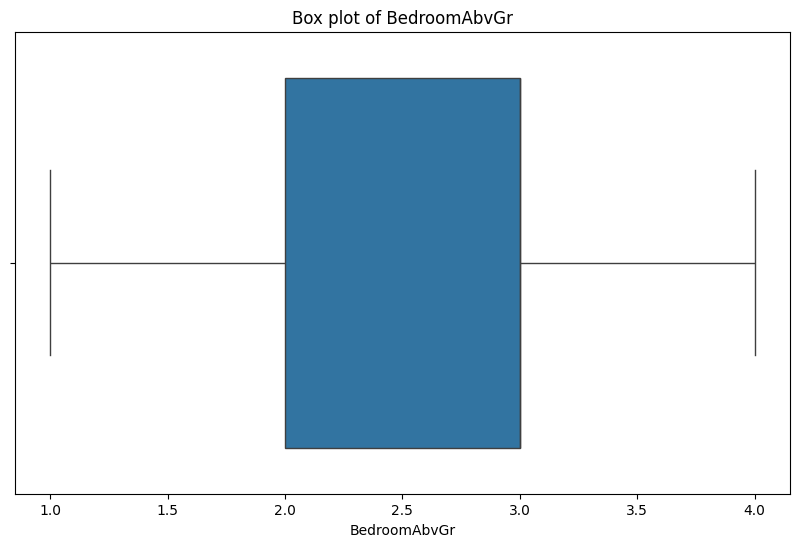

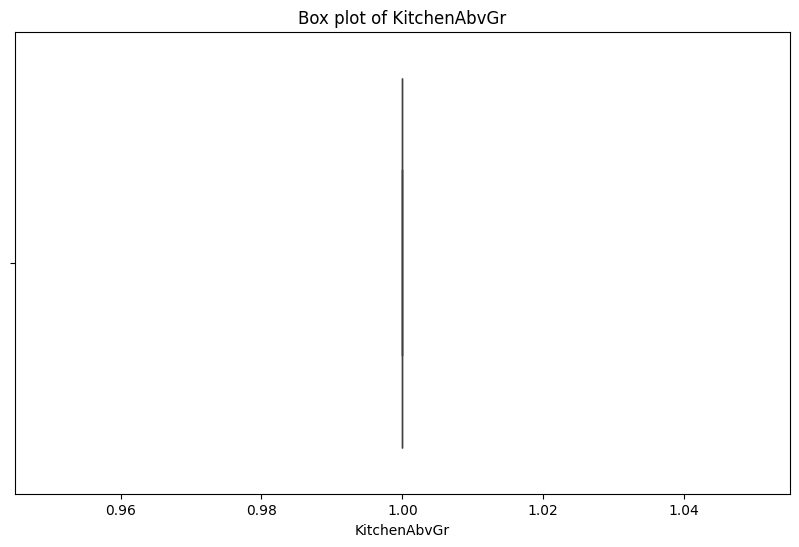

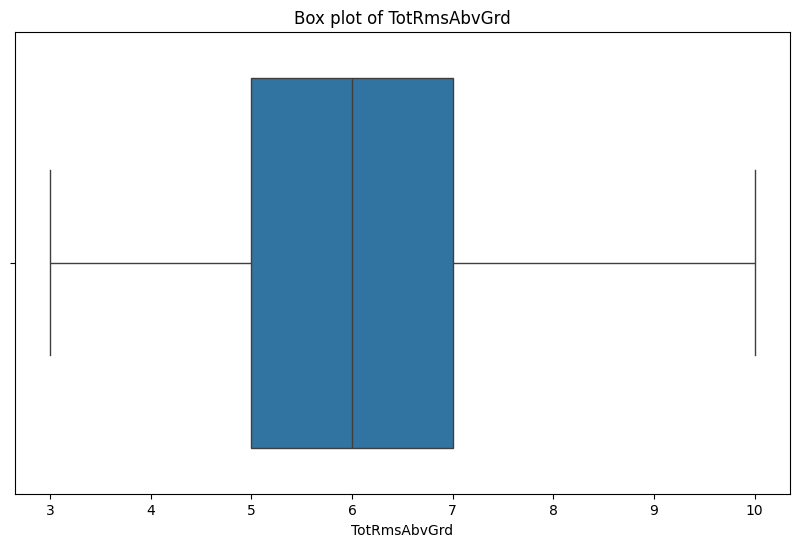

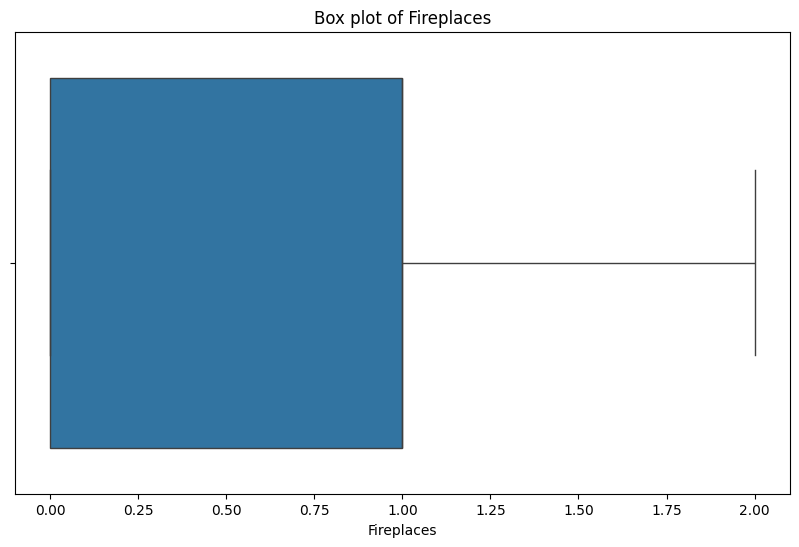

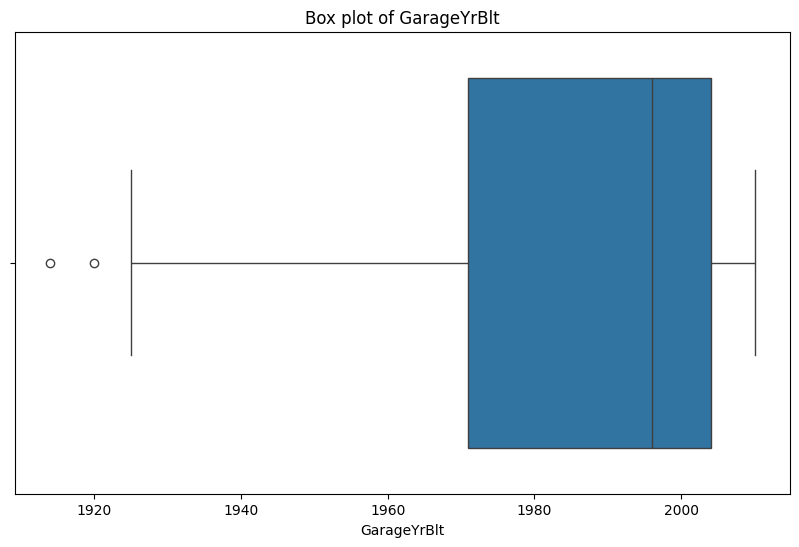

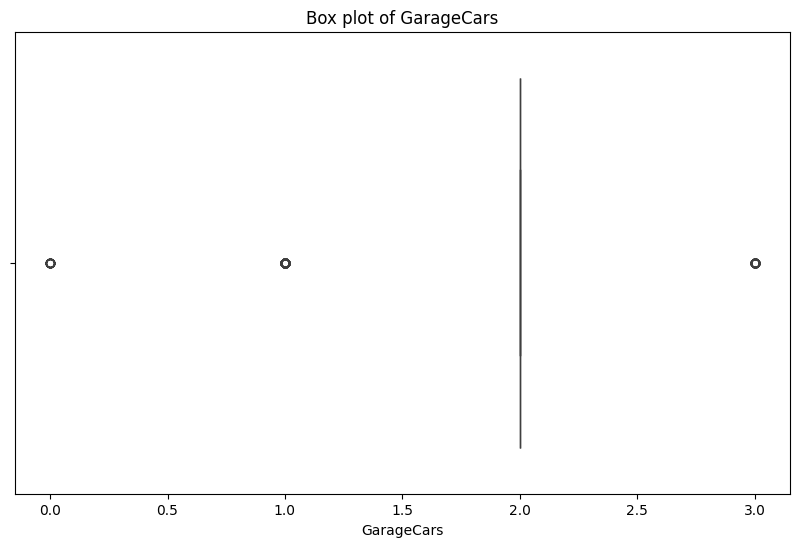

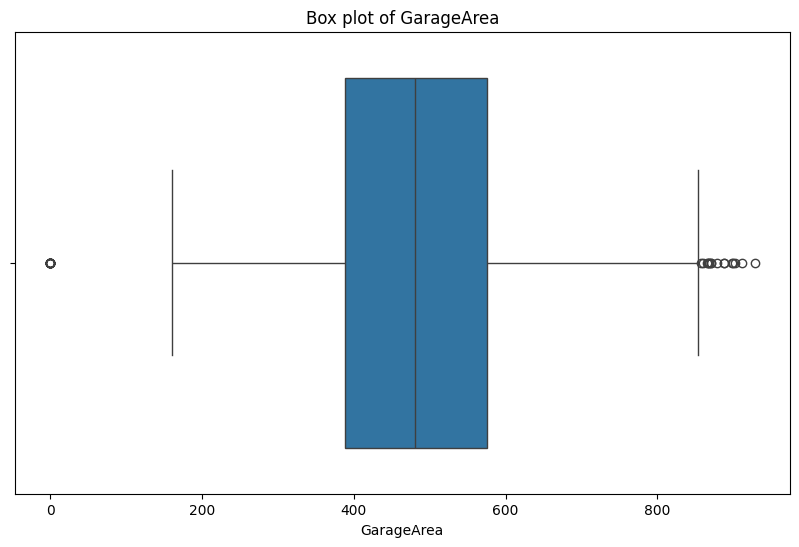

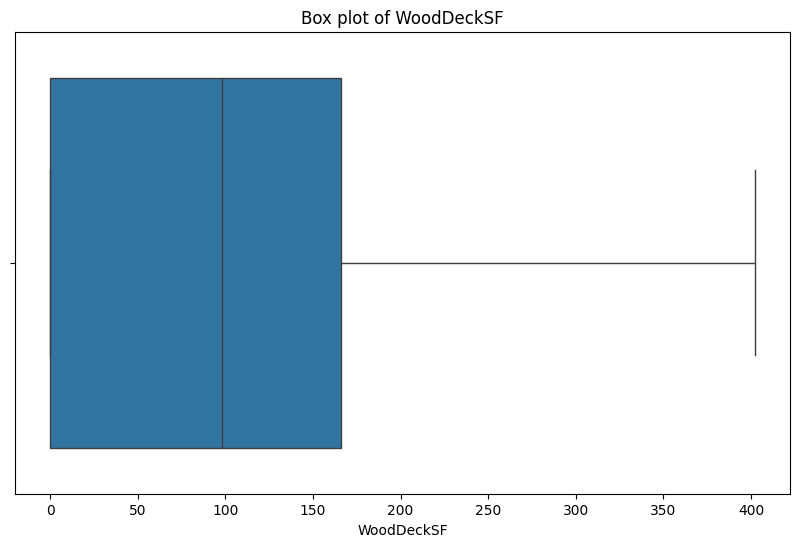

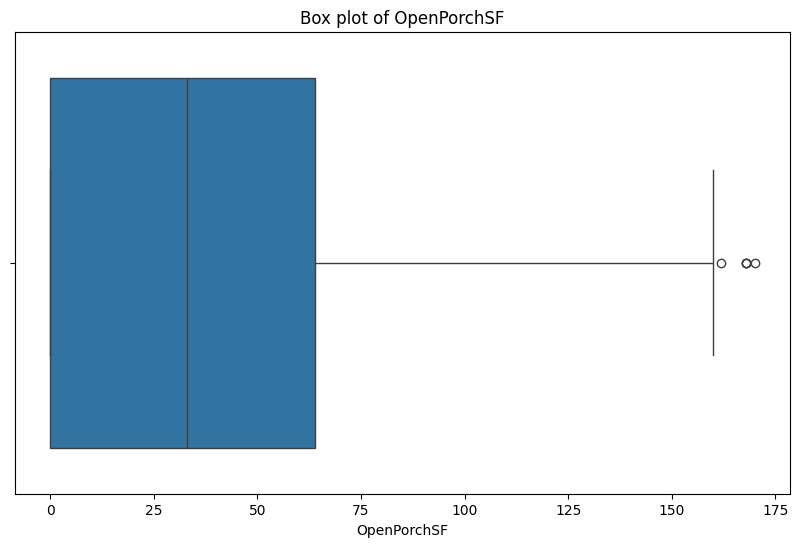

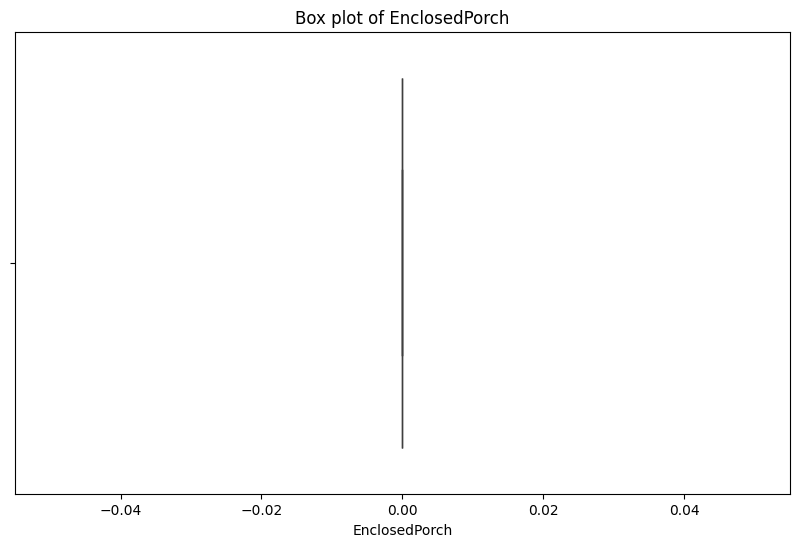

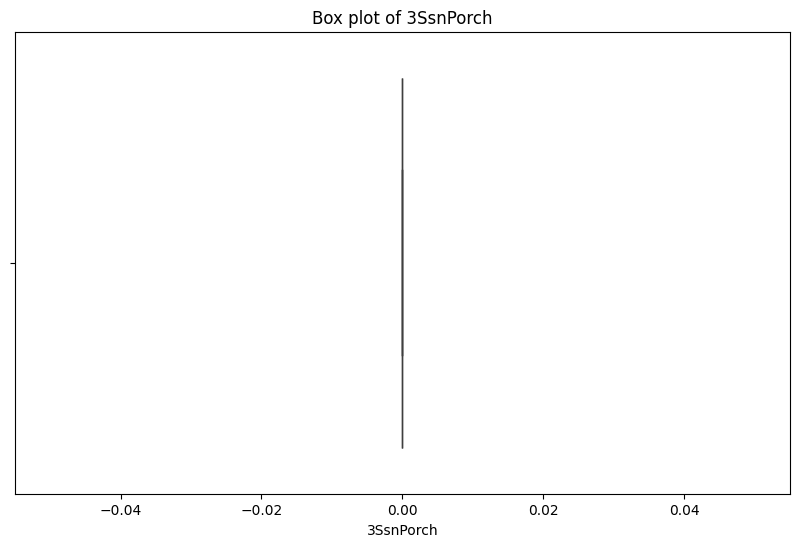

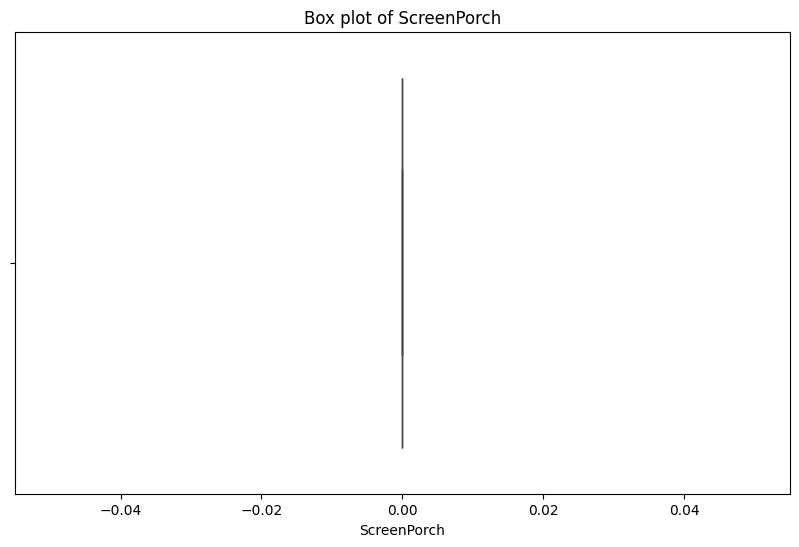

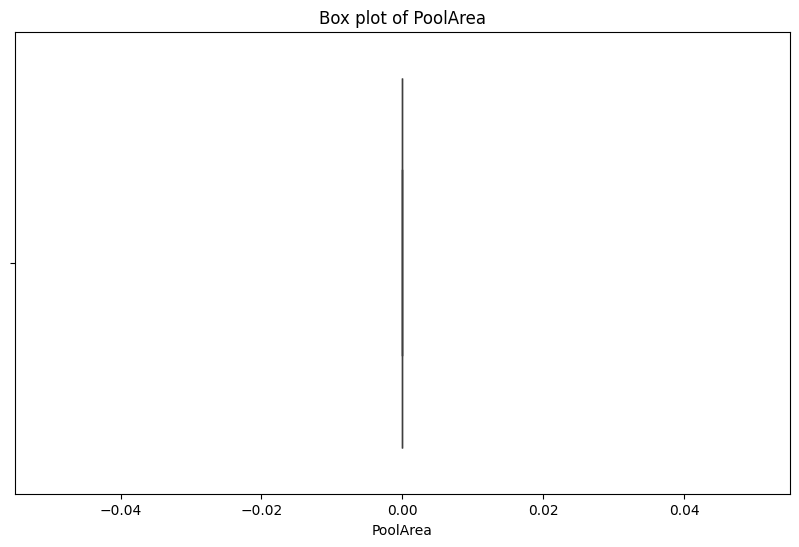

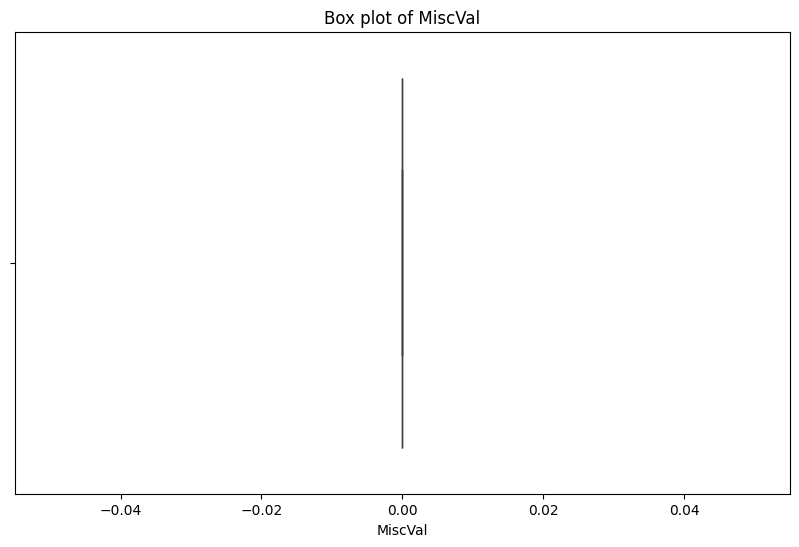

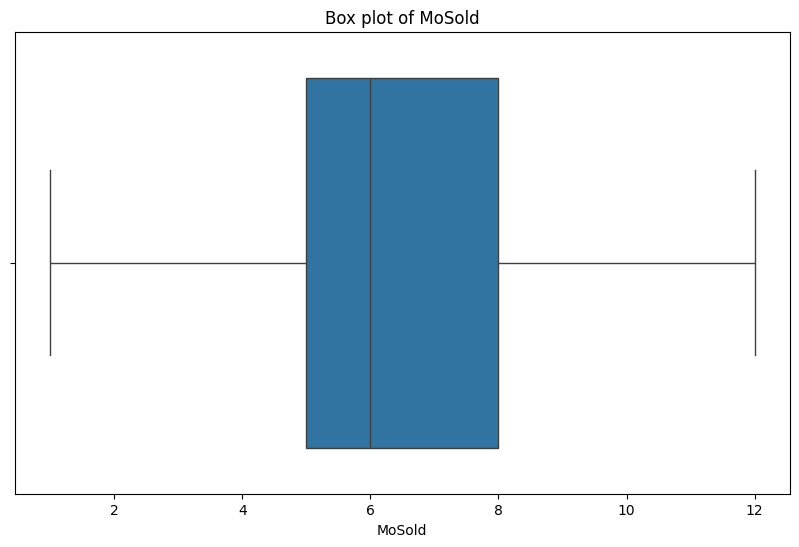

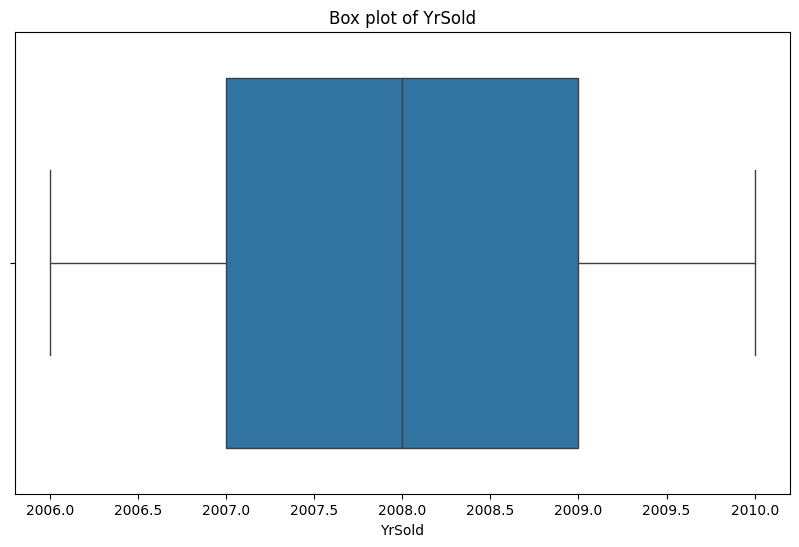

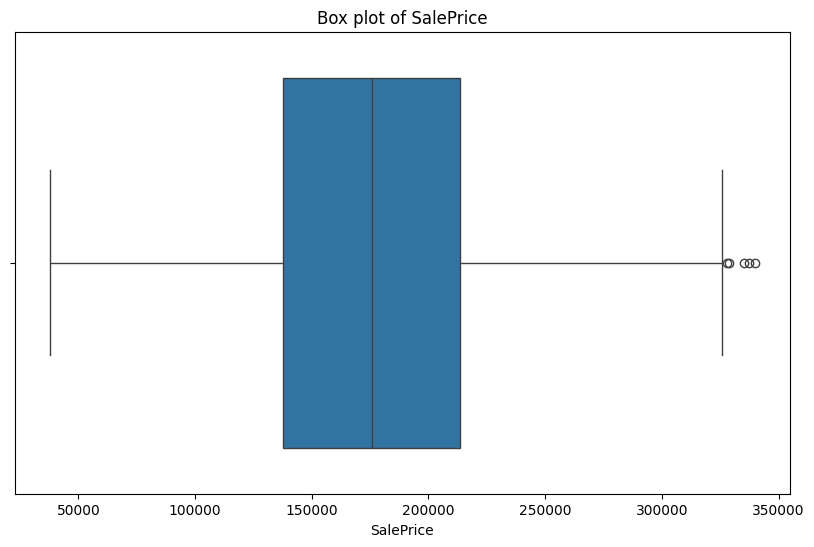

In [31]:
for feature in df_filtered_numeric:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

cara lain mengatasi outlier

In [32]:
# median = df['column_name'].median()
# df['column_name'] = df['column_name'].apply(lambda x: median if x < (Q1 - 1.5  IQR) or x > (Q3 + 1.5  IQR) else x)

# # Mengganti outlier dengan nilai batas terdekat
# df['column_name'] = df['column_name'].apply(lambda x: (Q1 - 1.5  IQR) if x < lower_bound else (Q3 + 1.5  IQR) if x > (Q3 + 1.5 * IQR) else x)

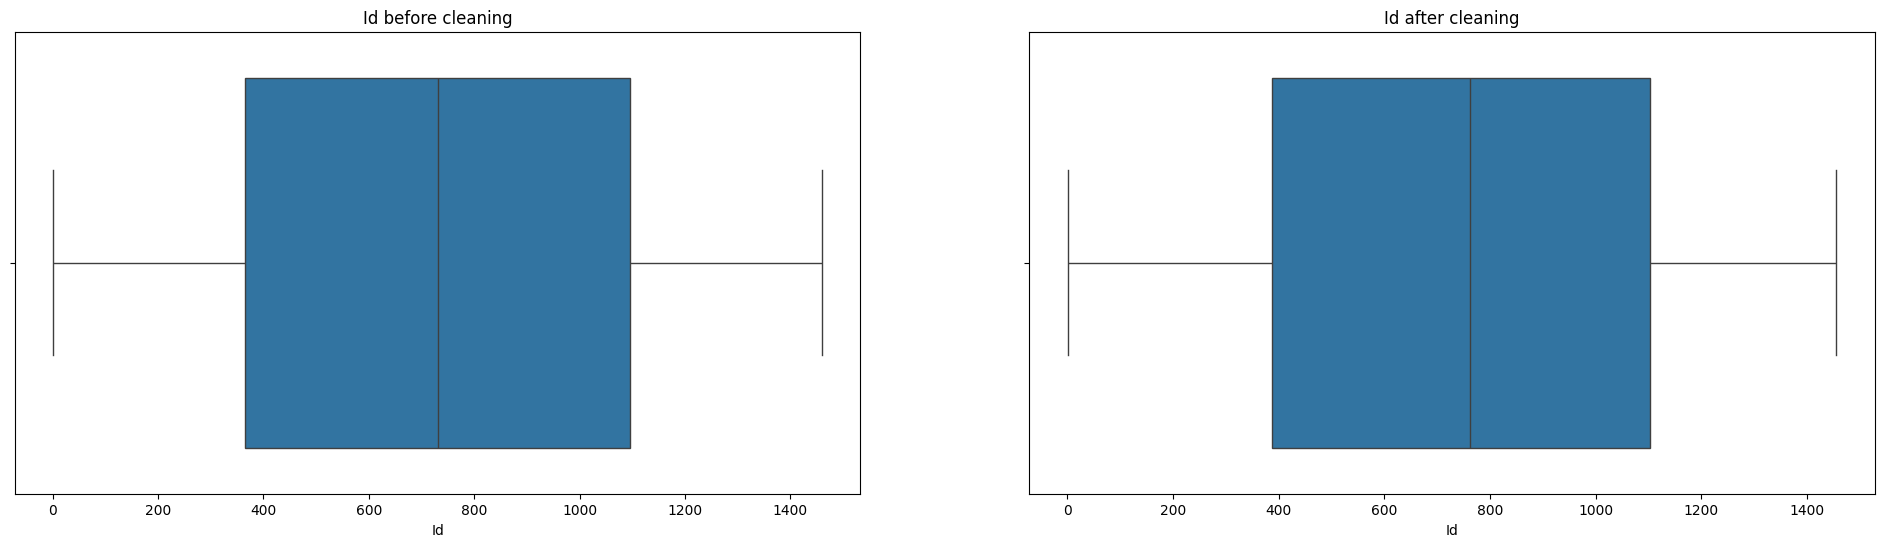

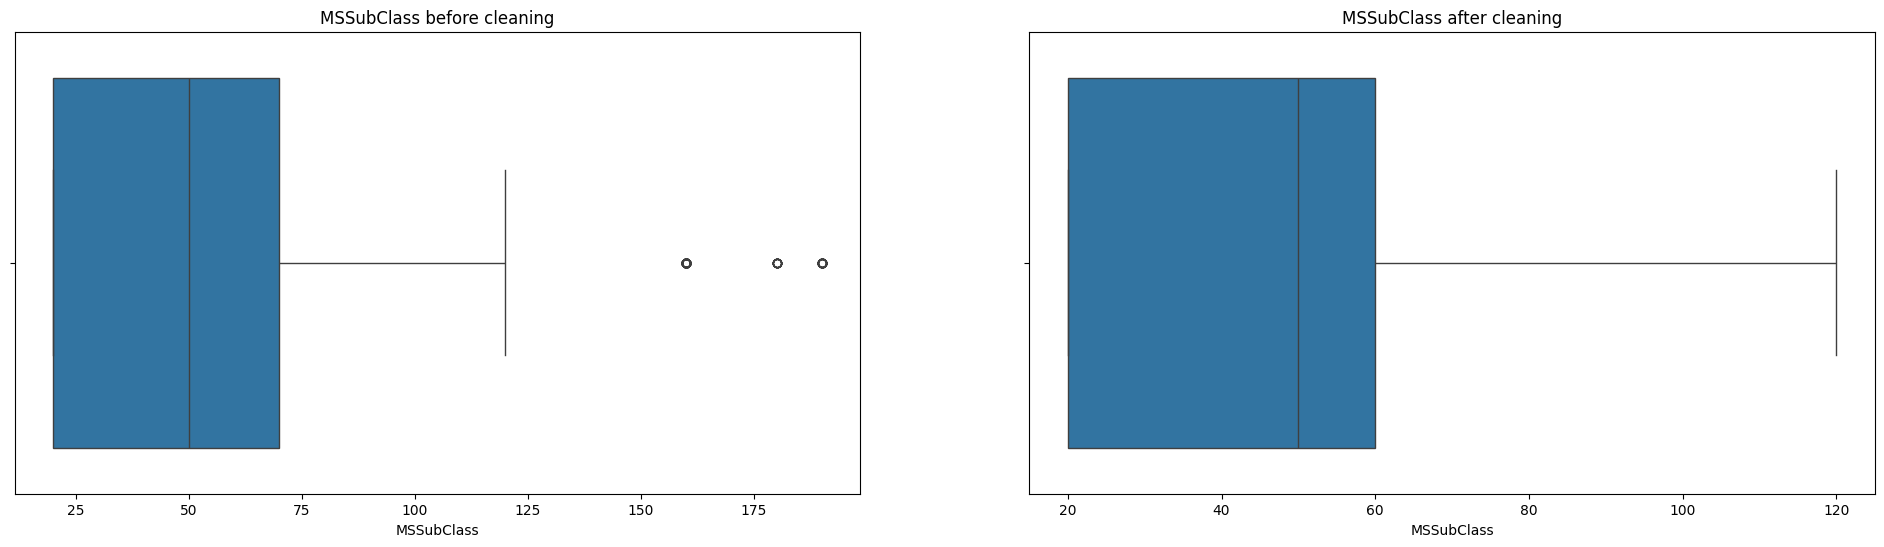

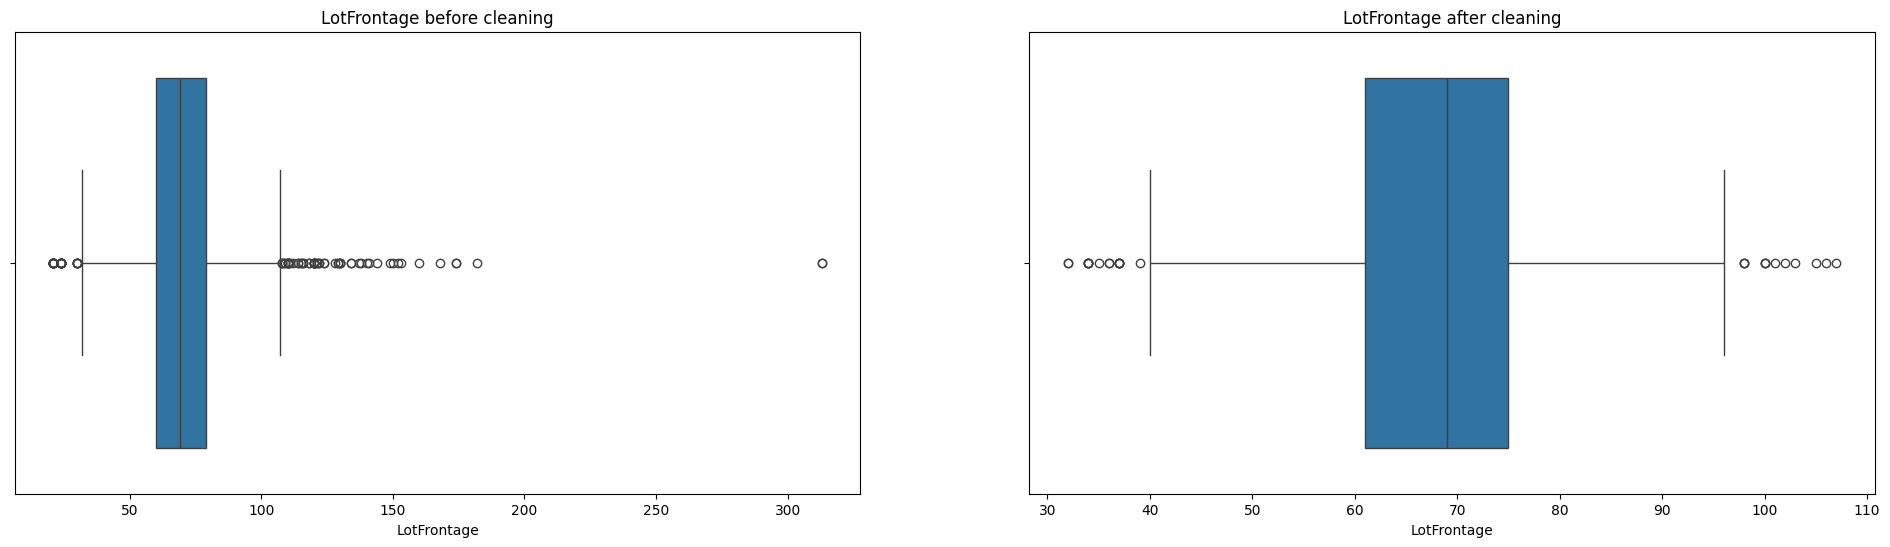

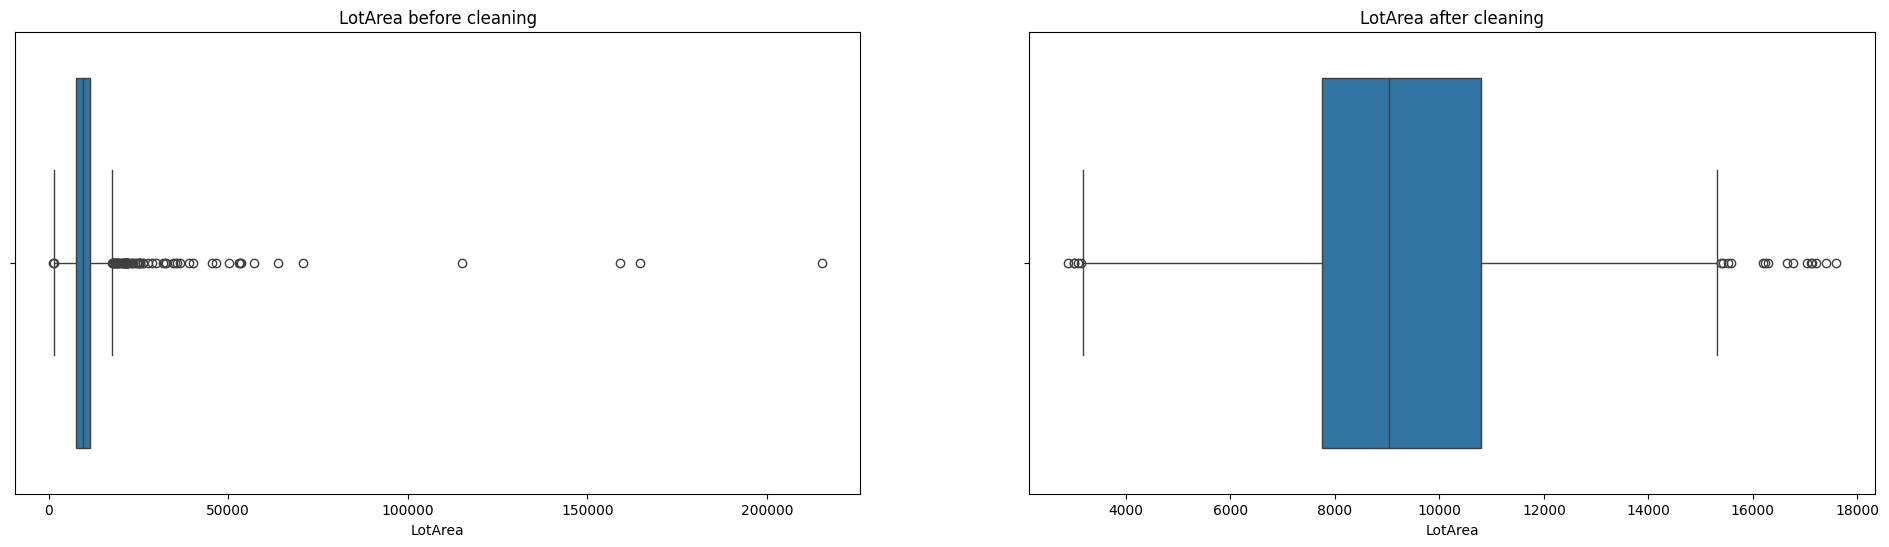

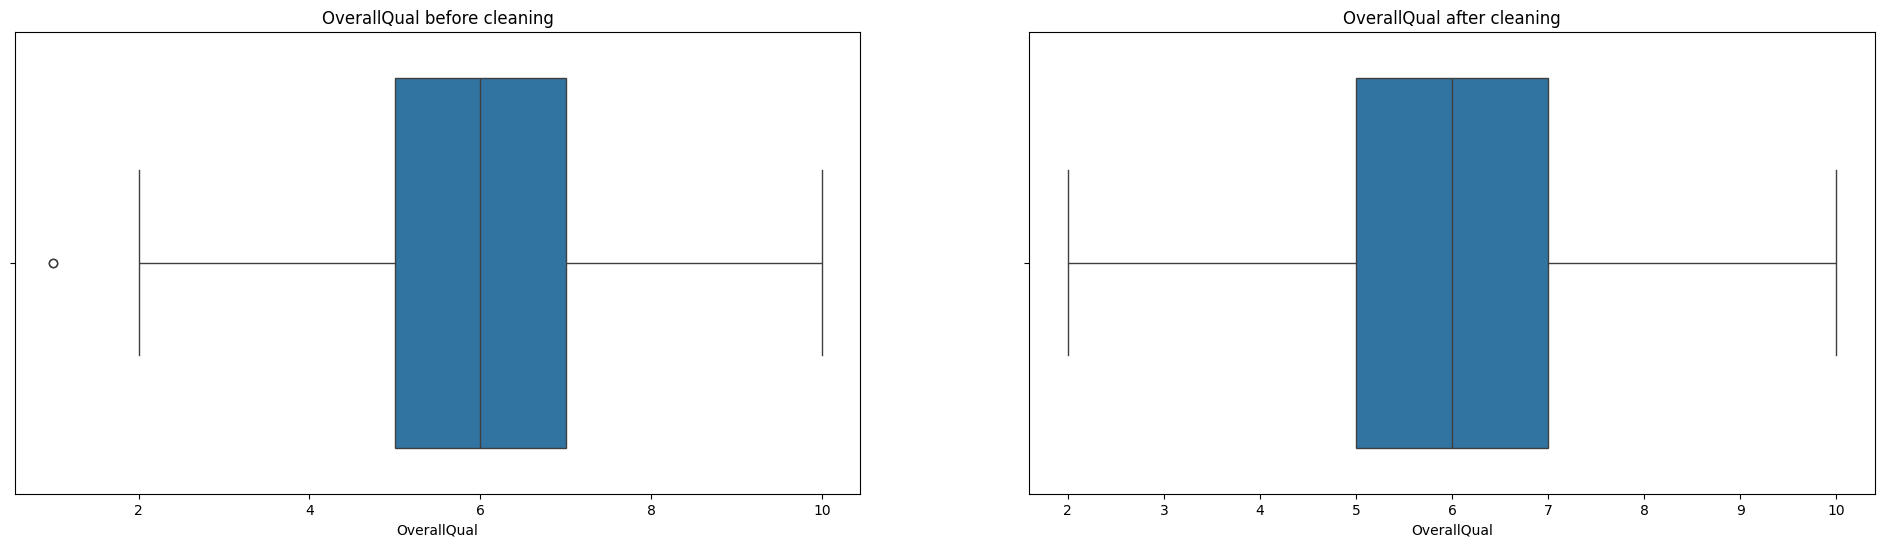

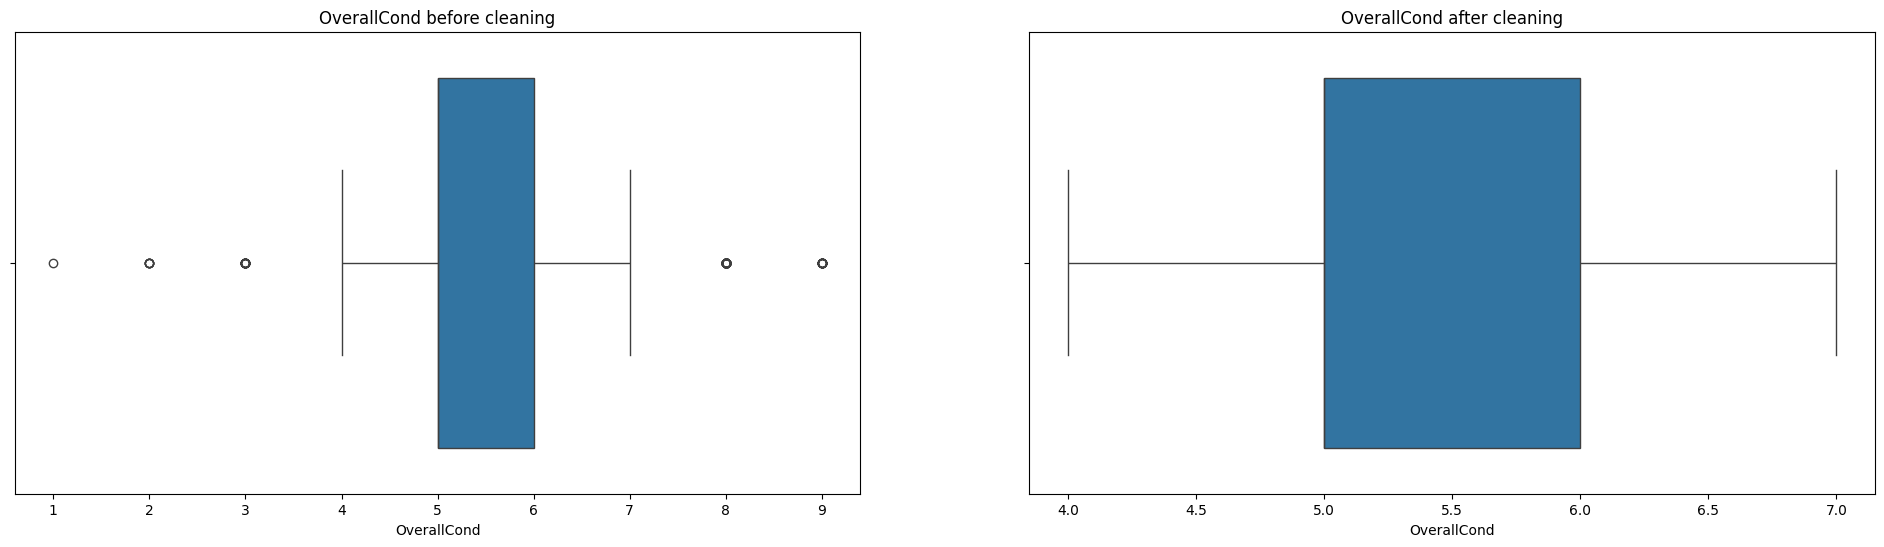

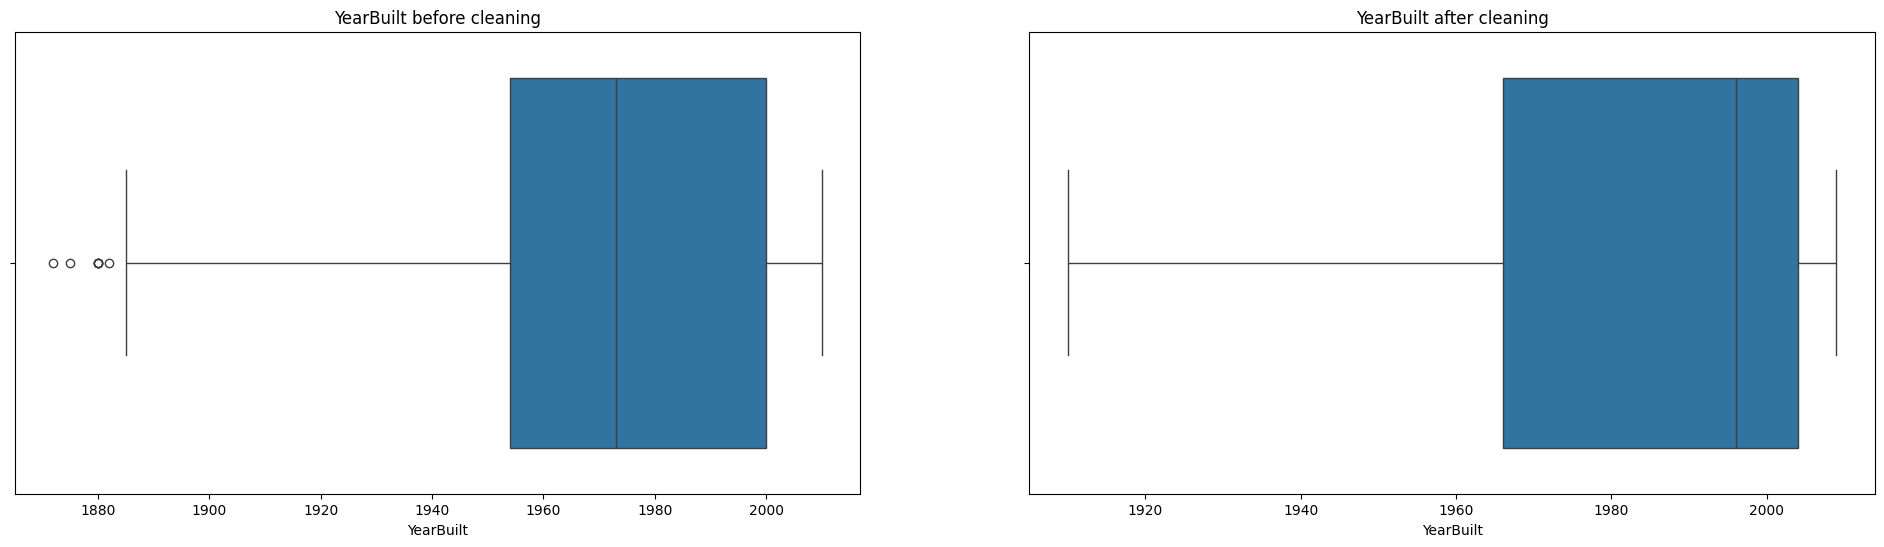

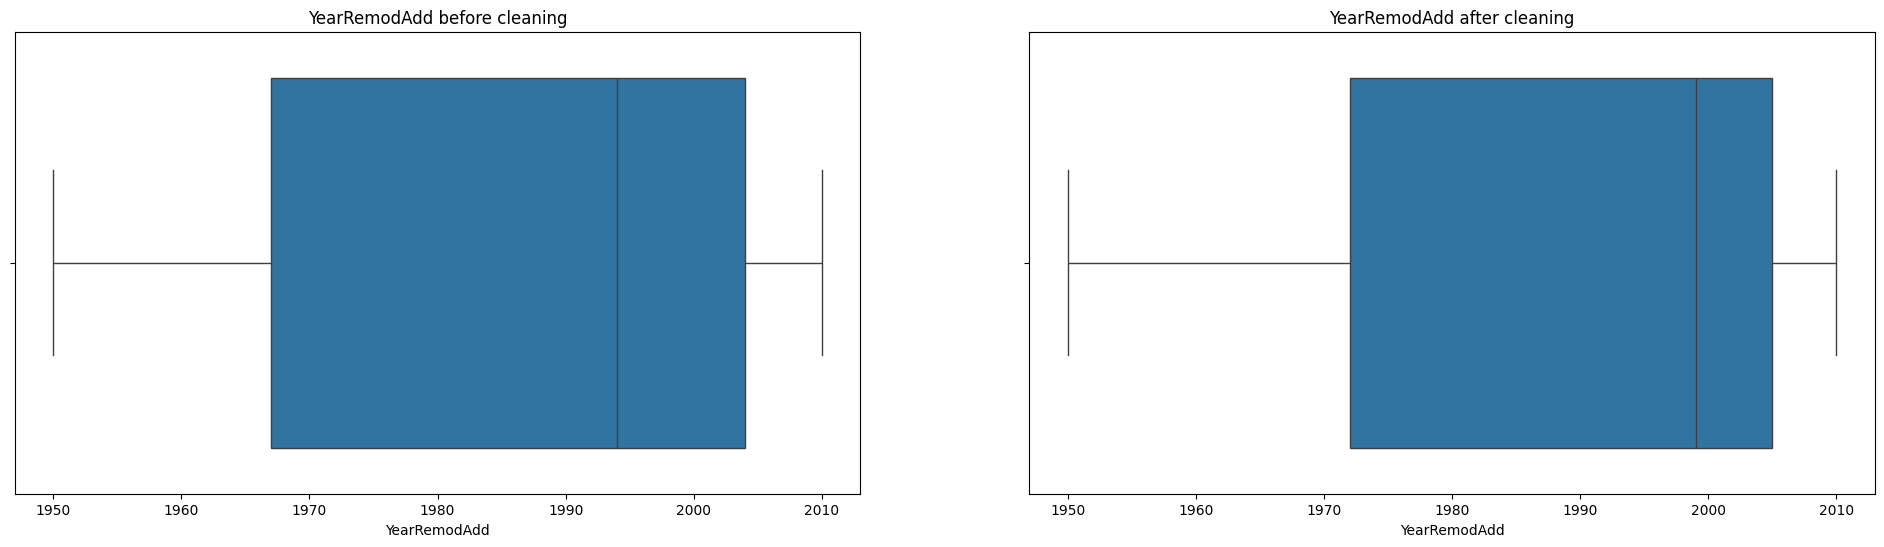

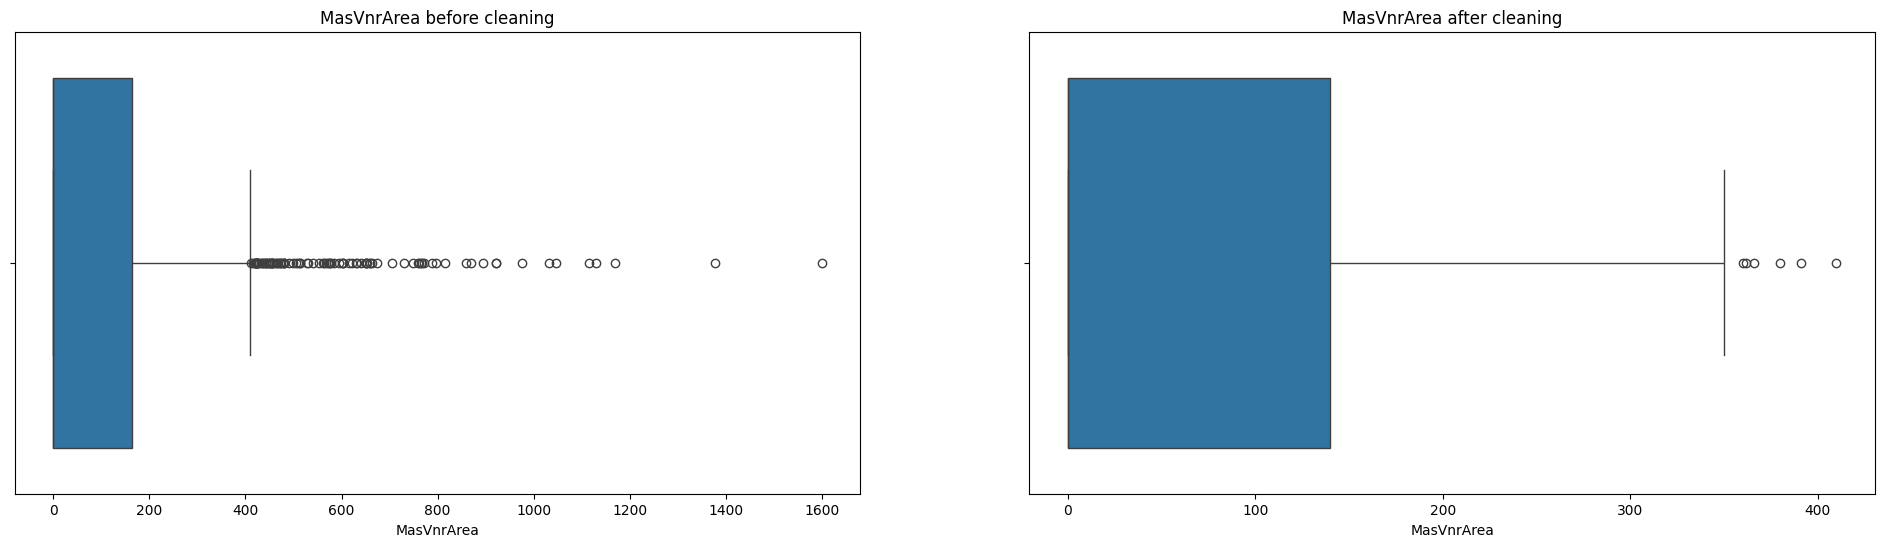

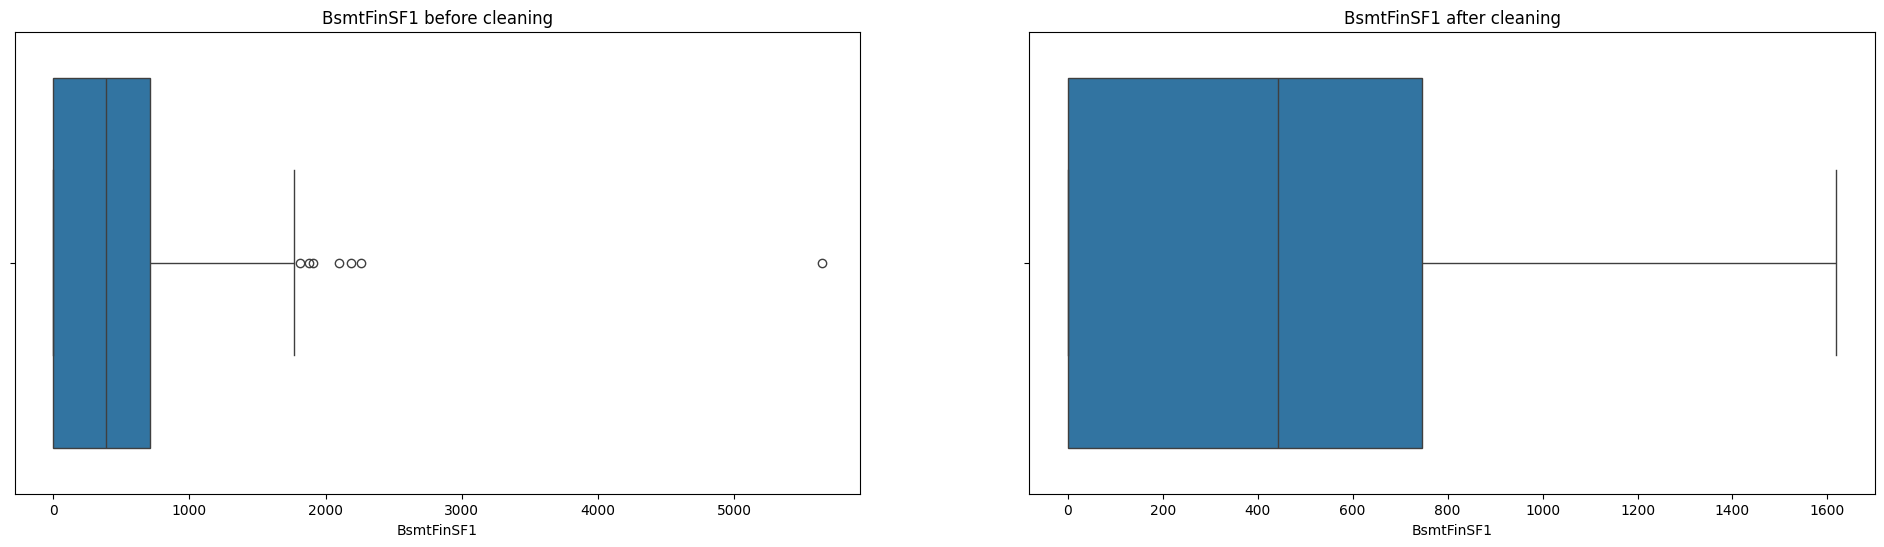

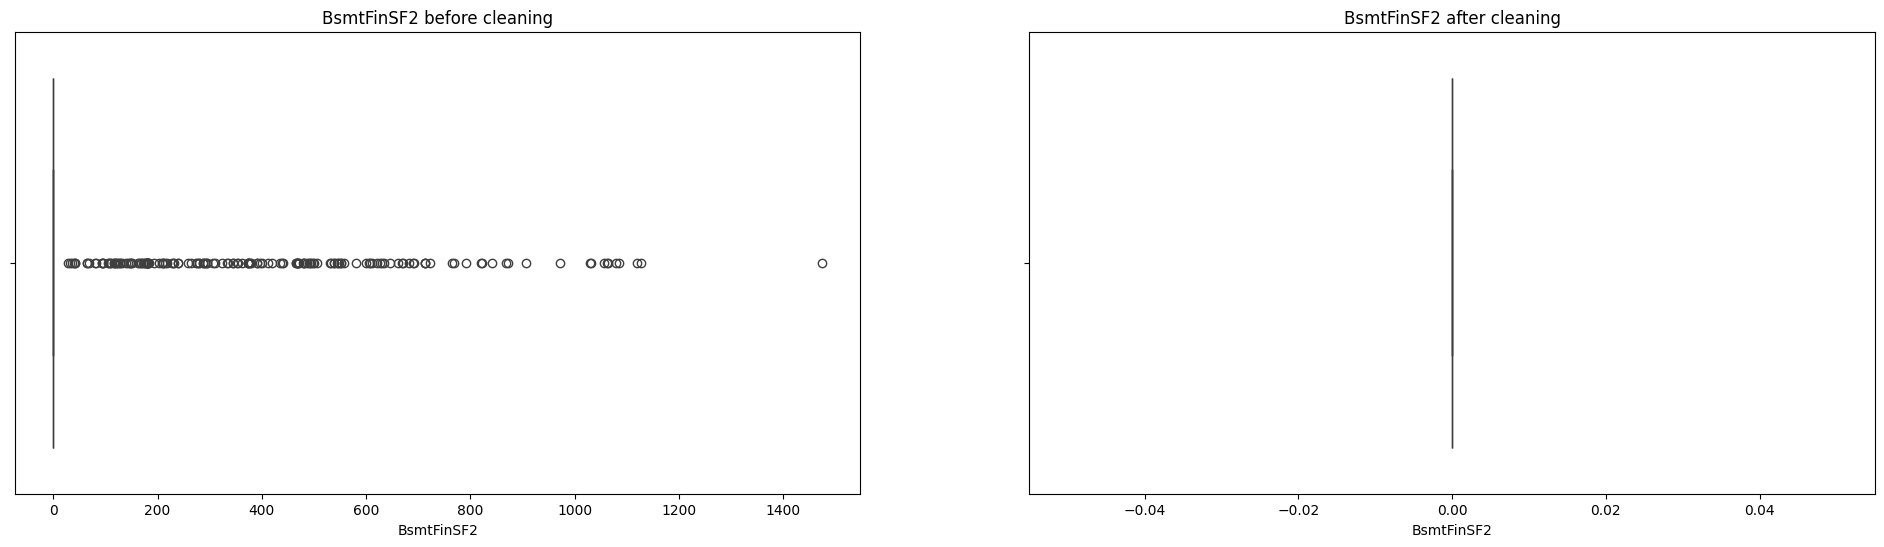

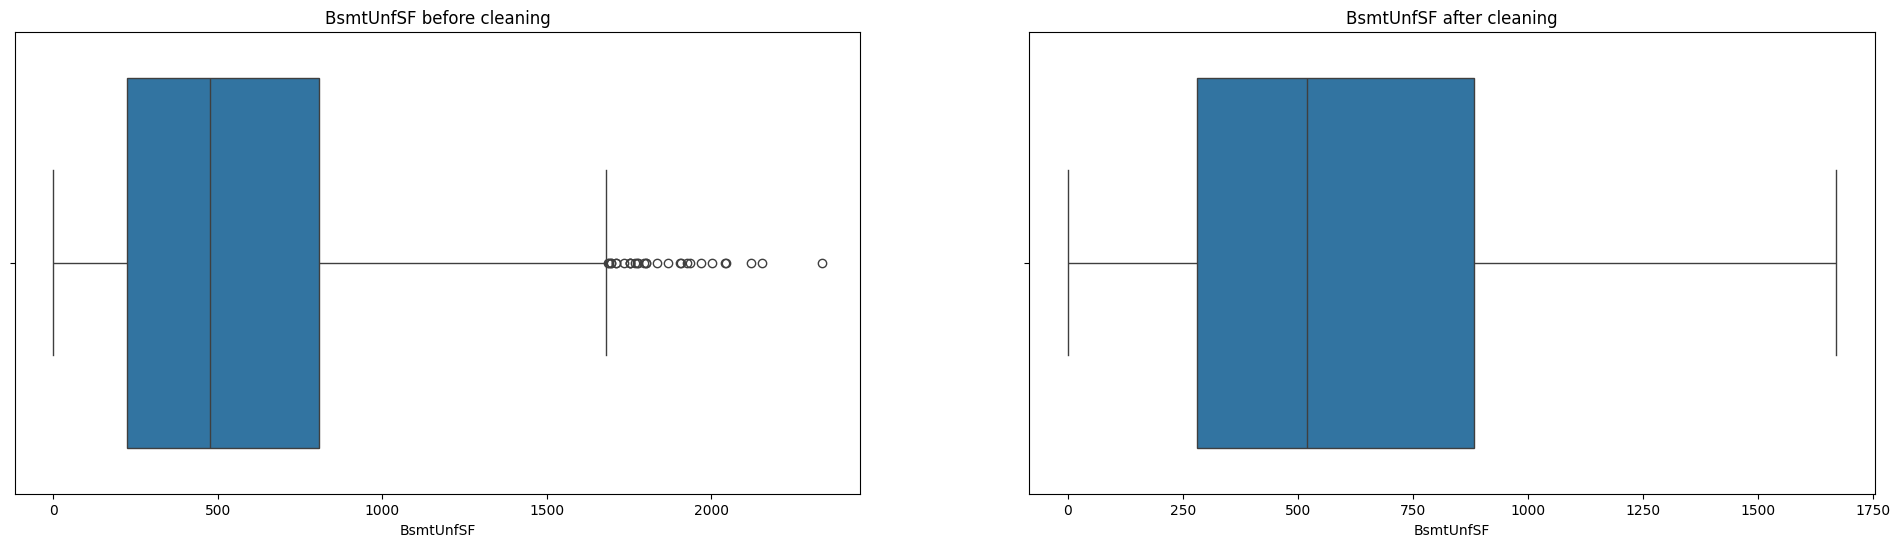

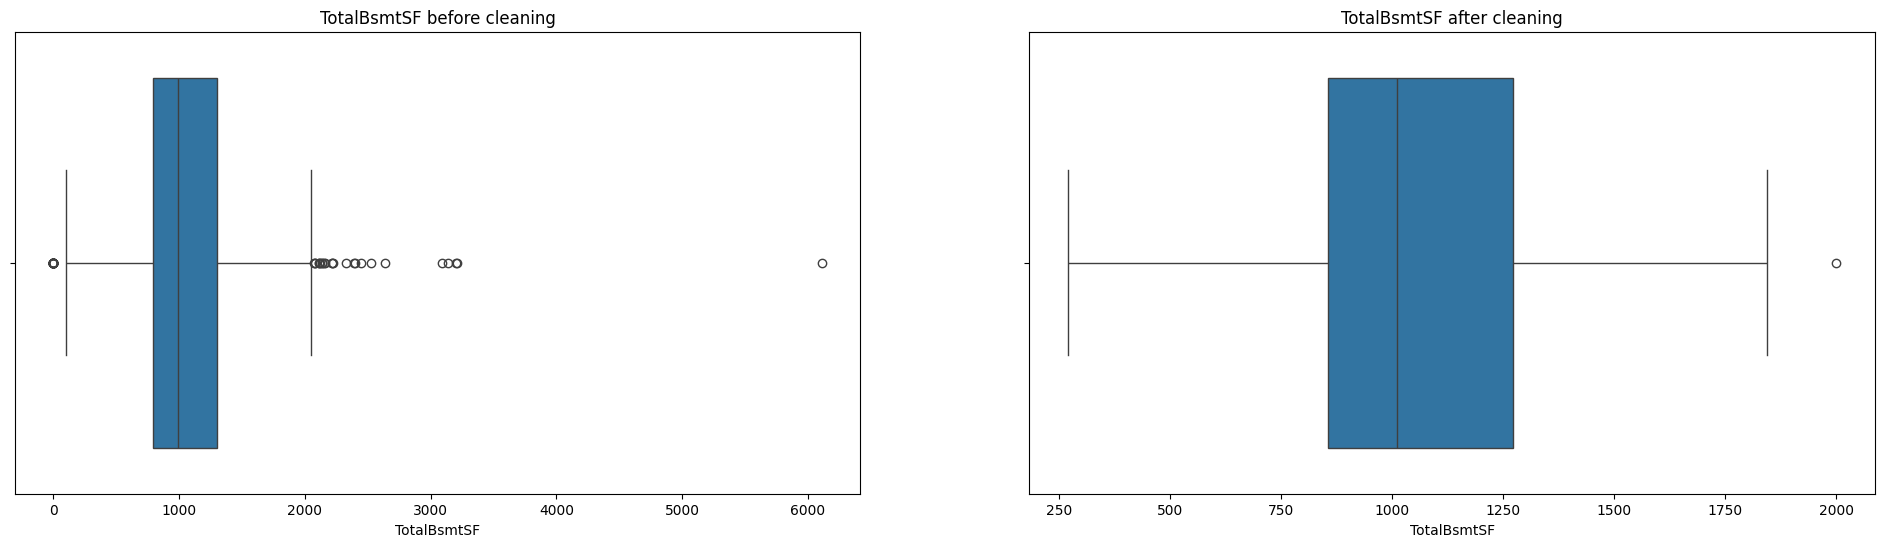

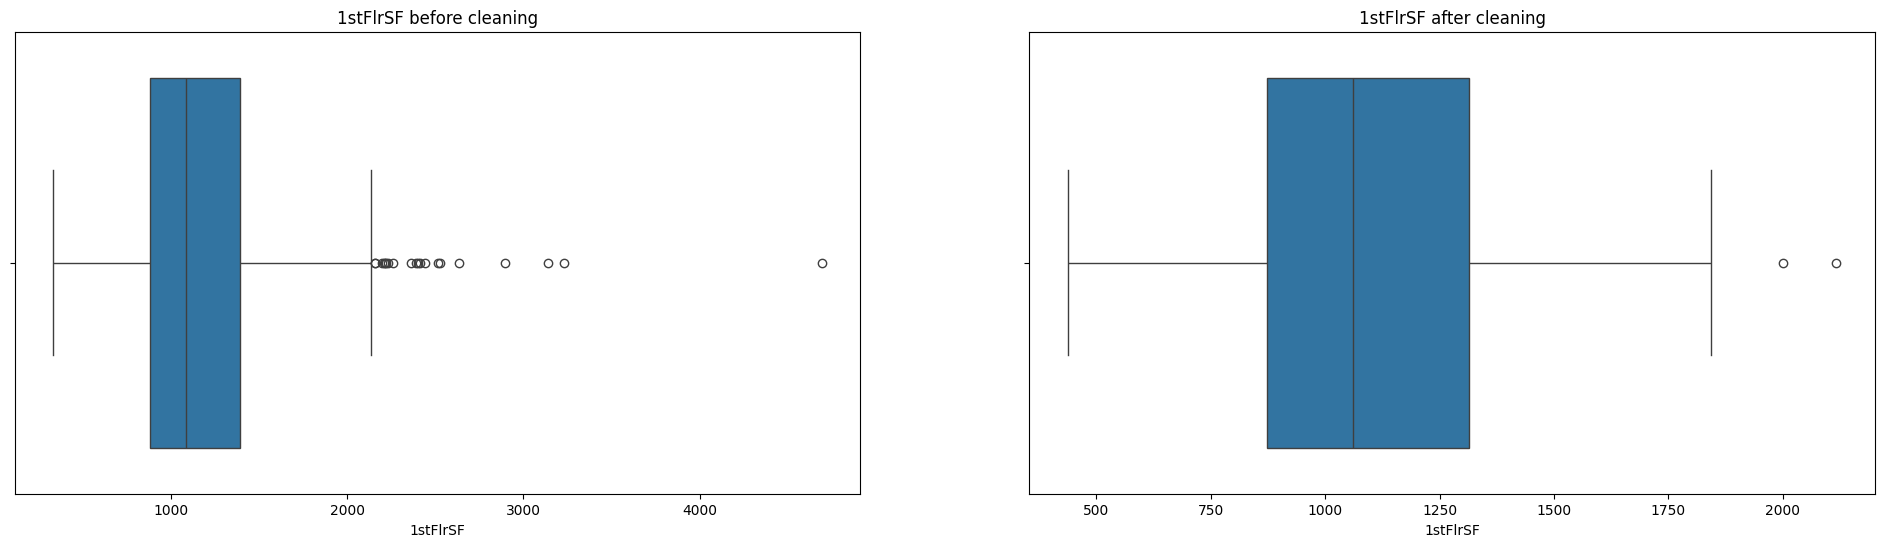

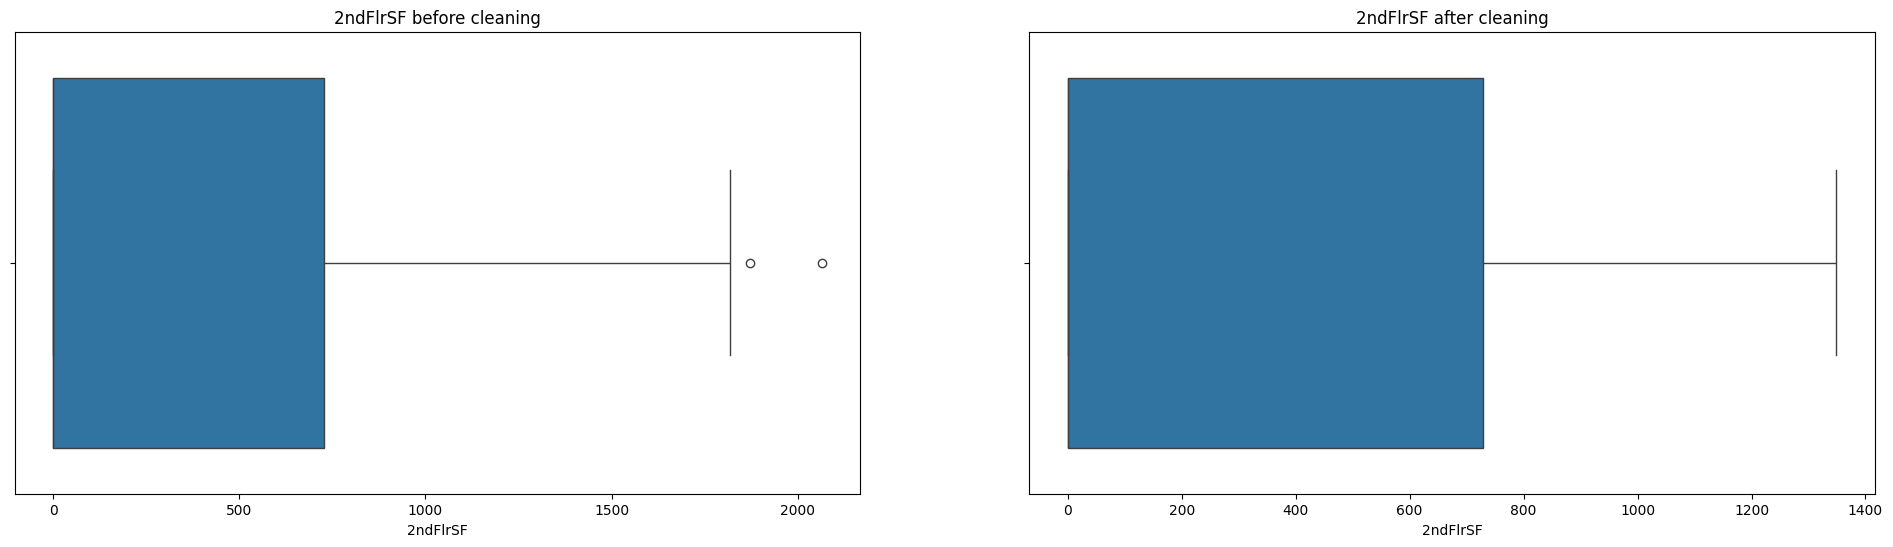

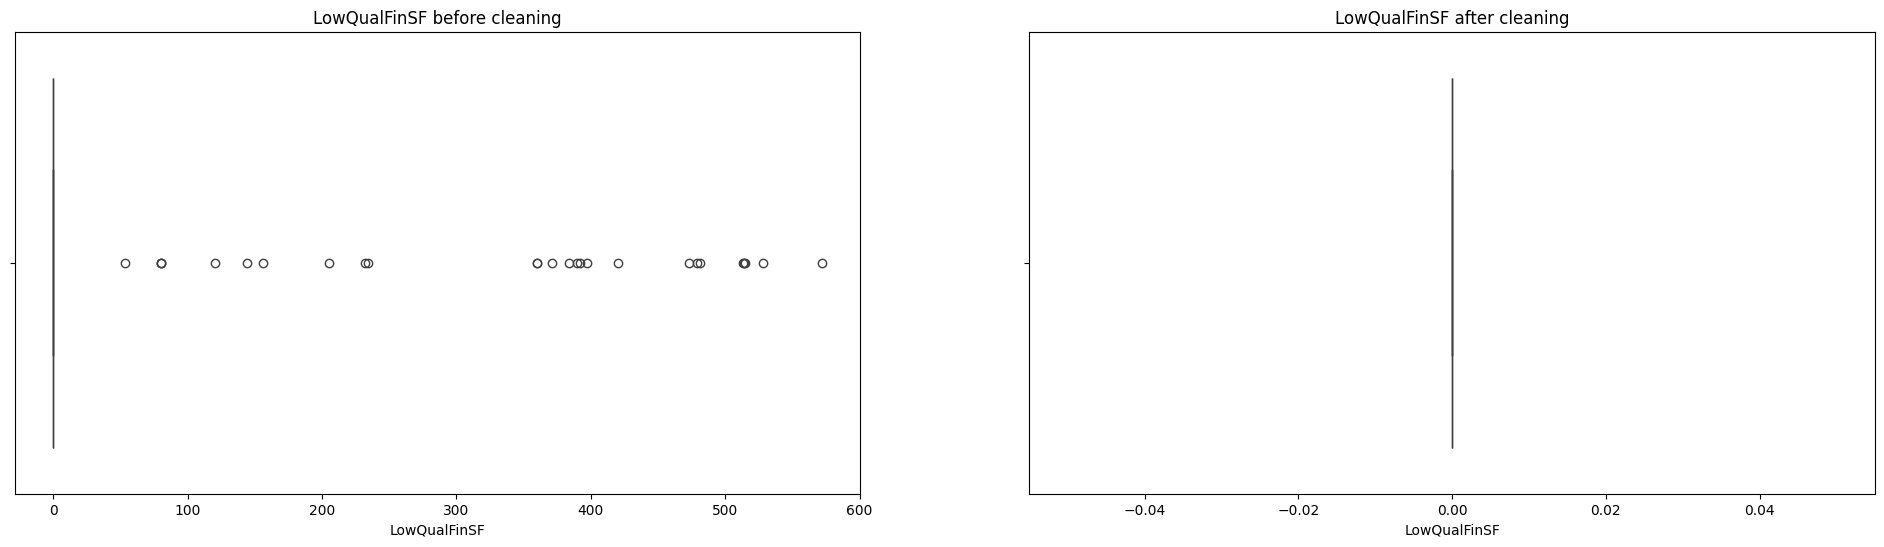

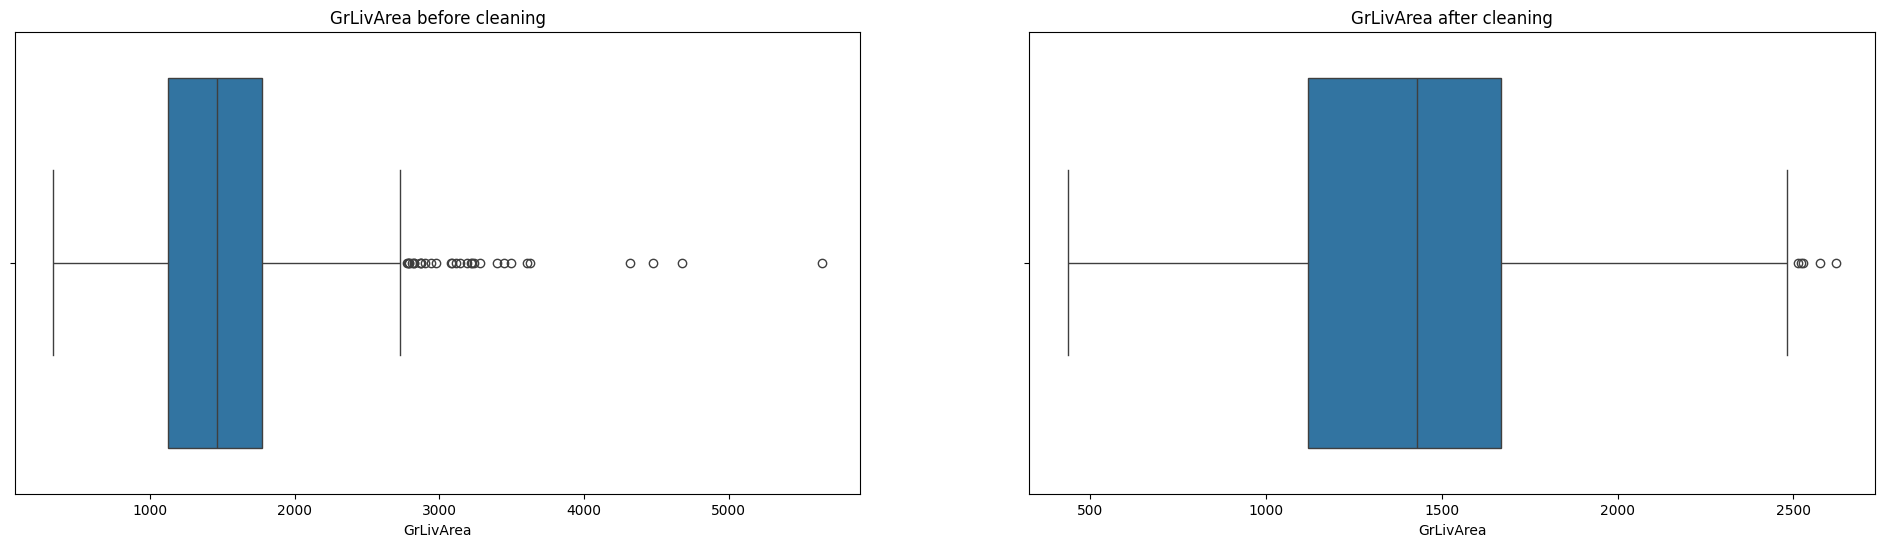

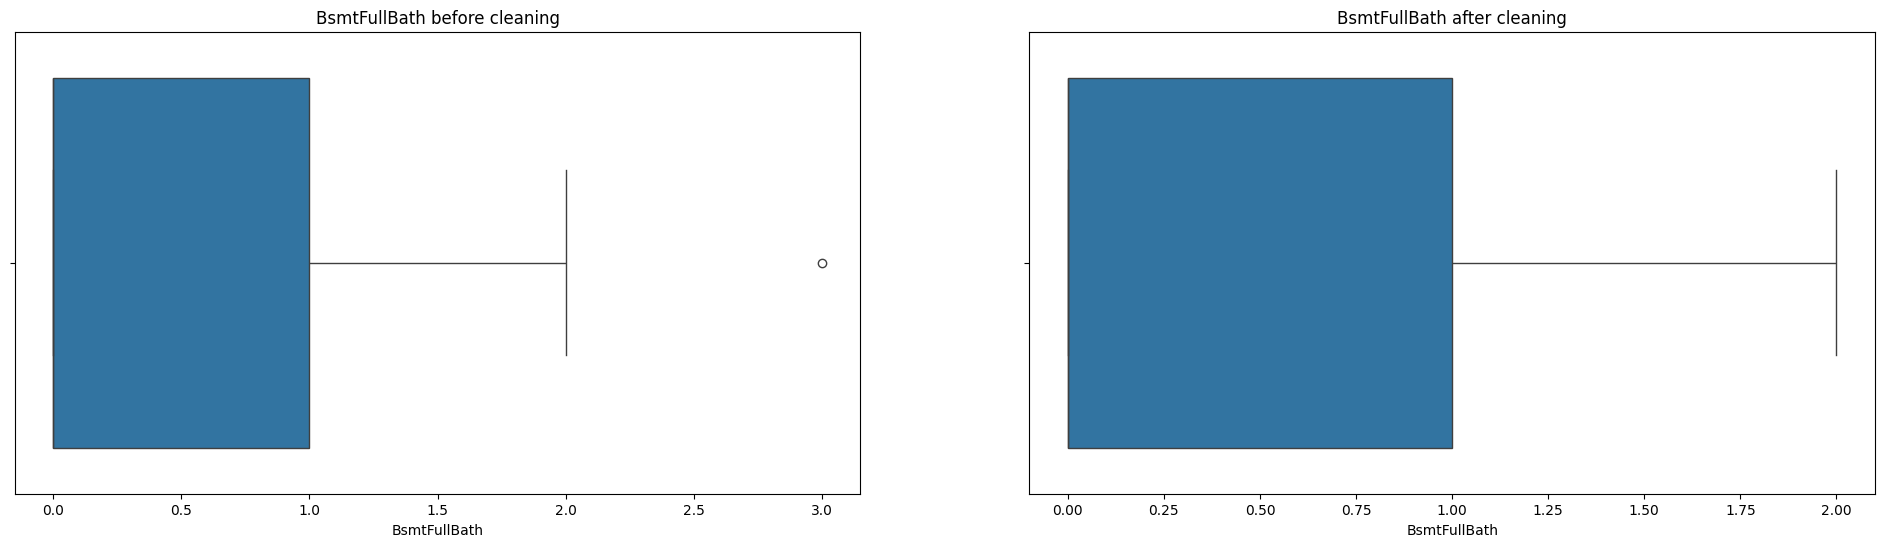

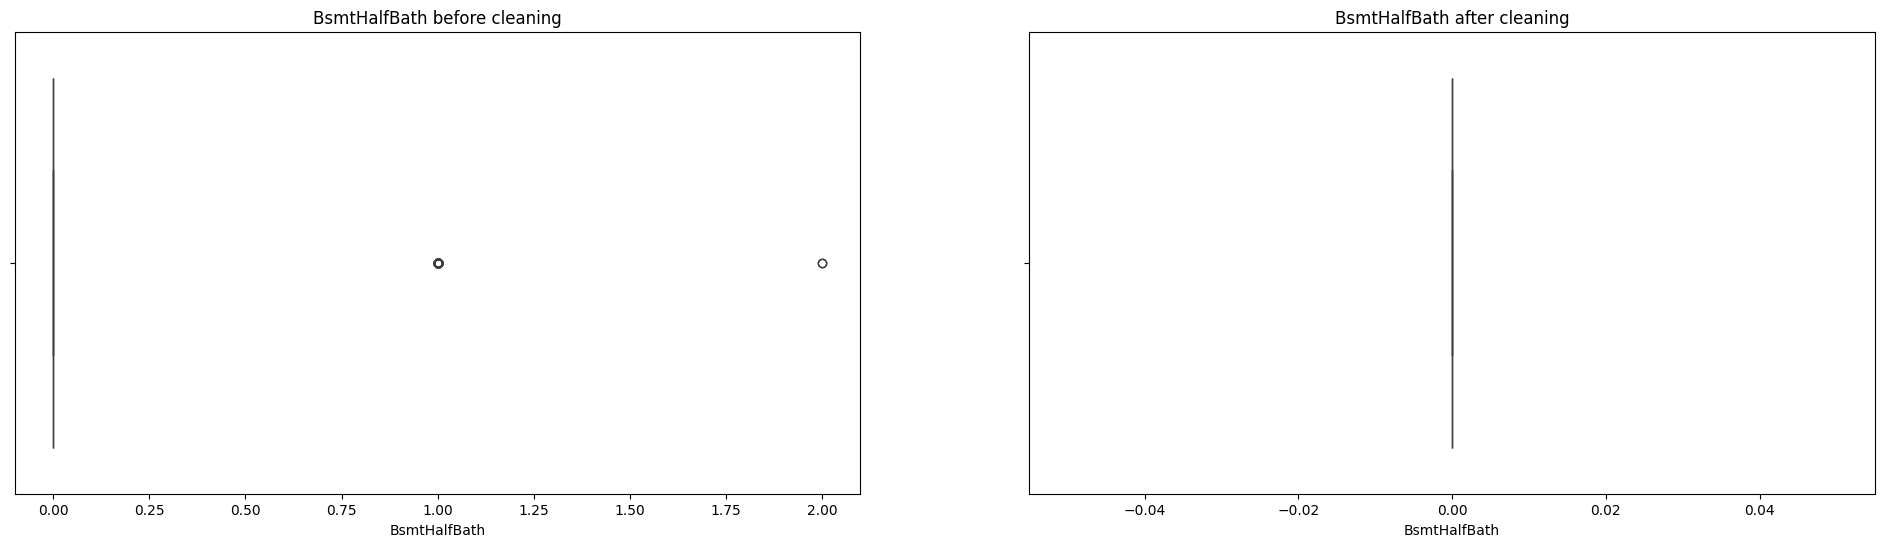

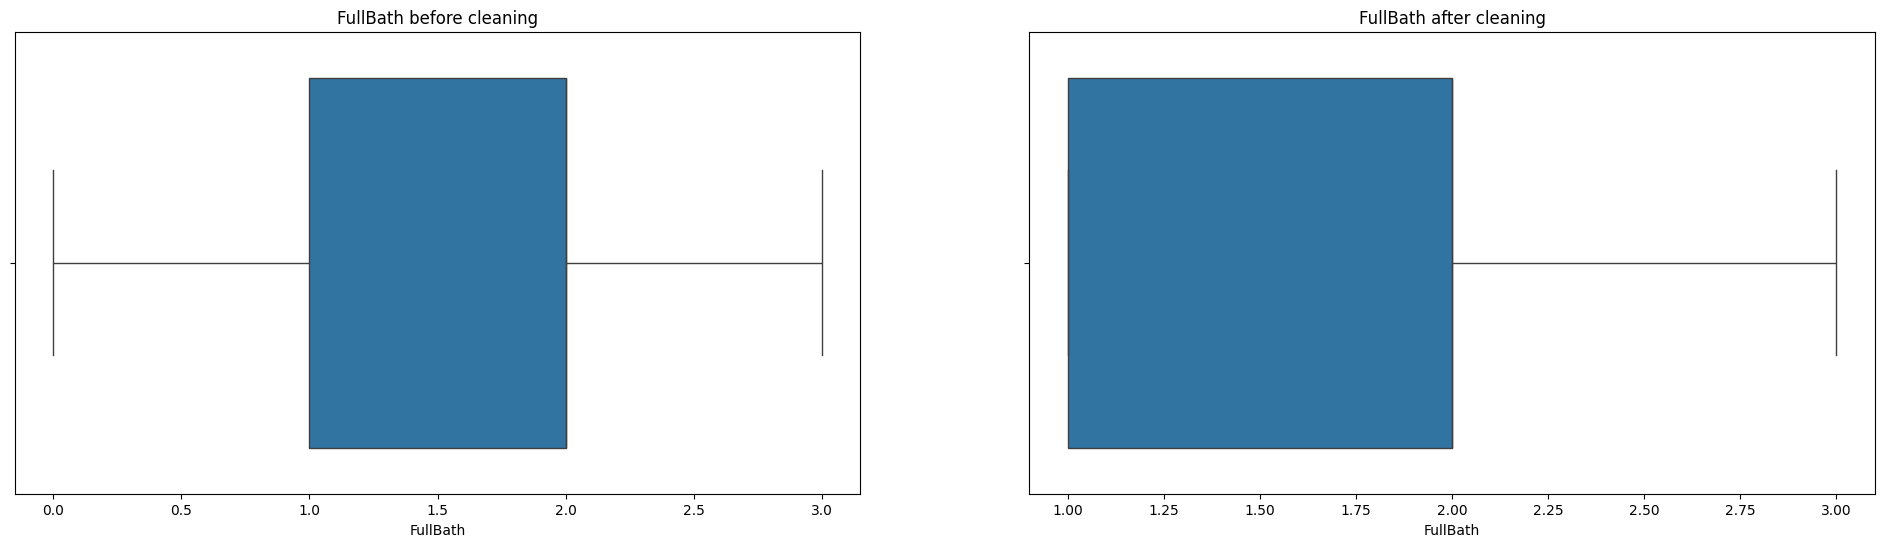

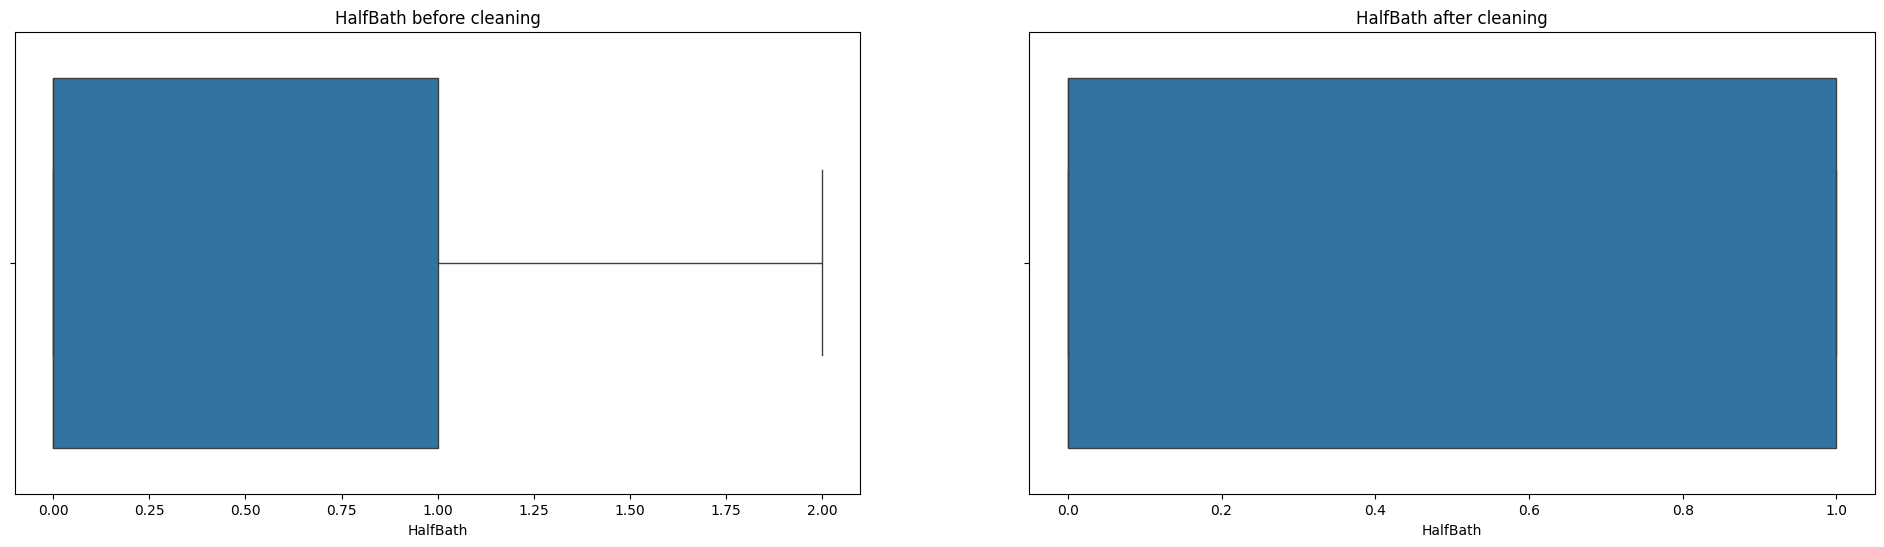

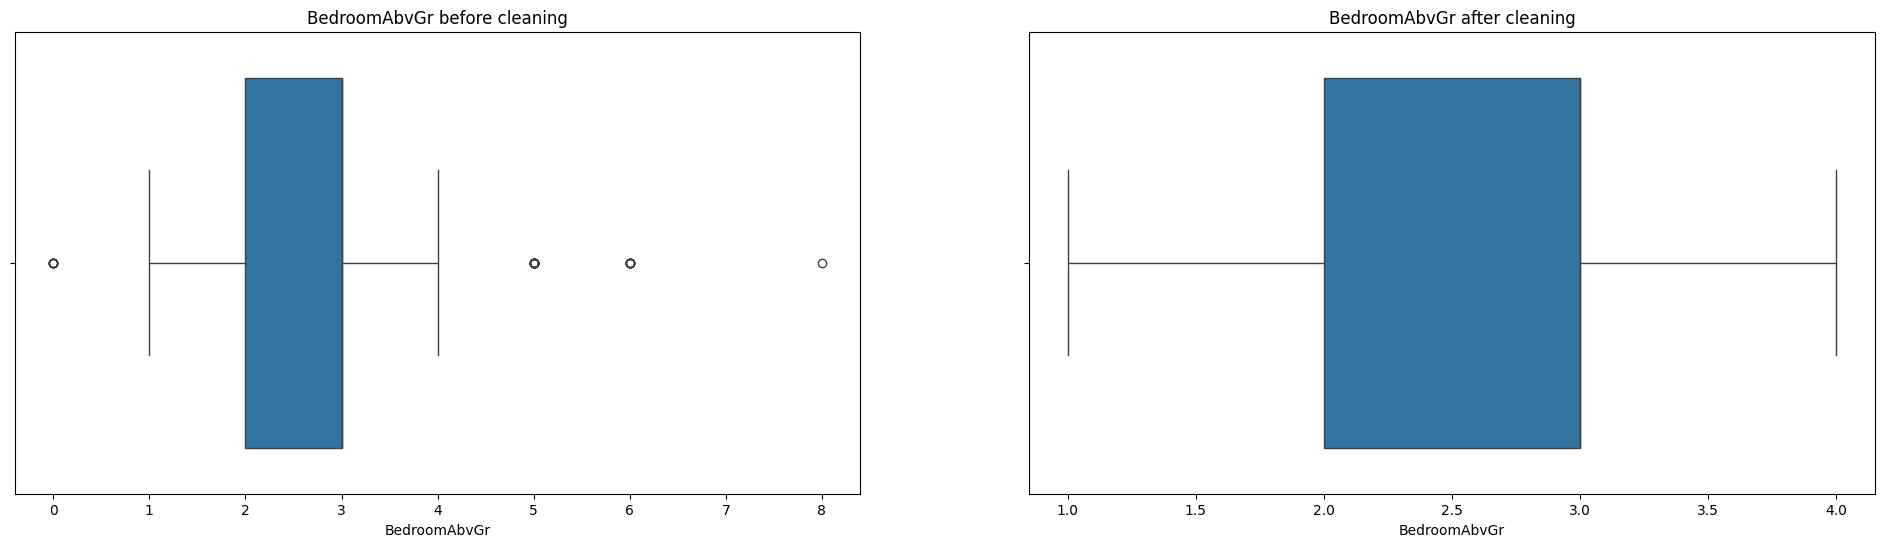

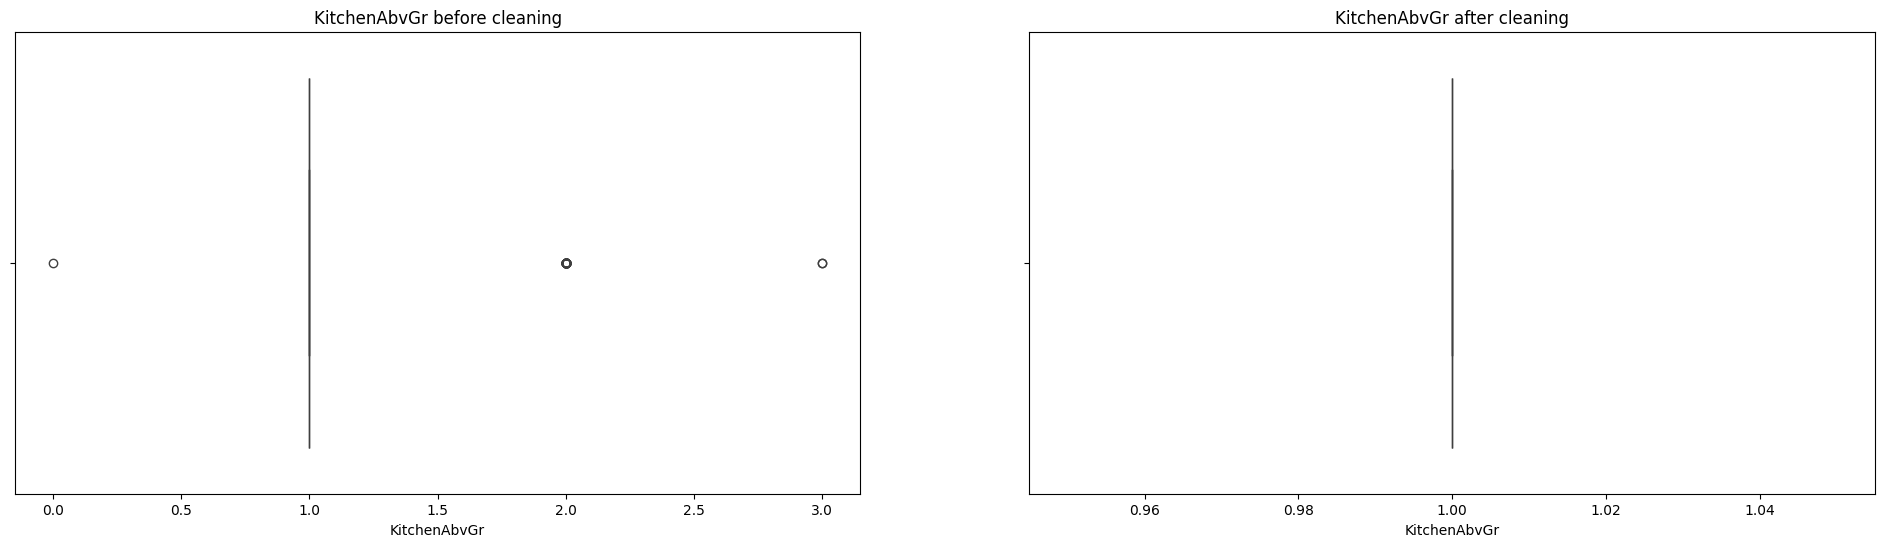

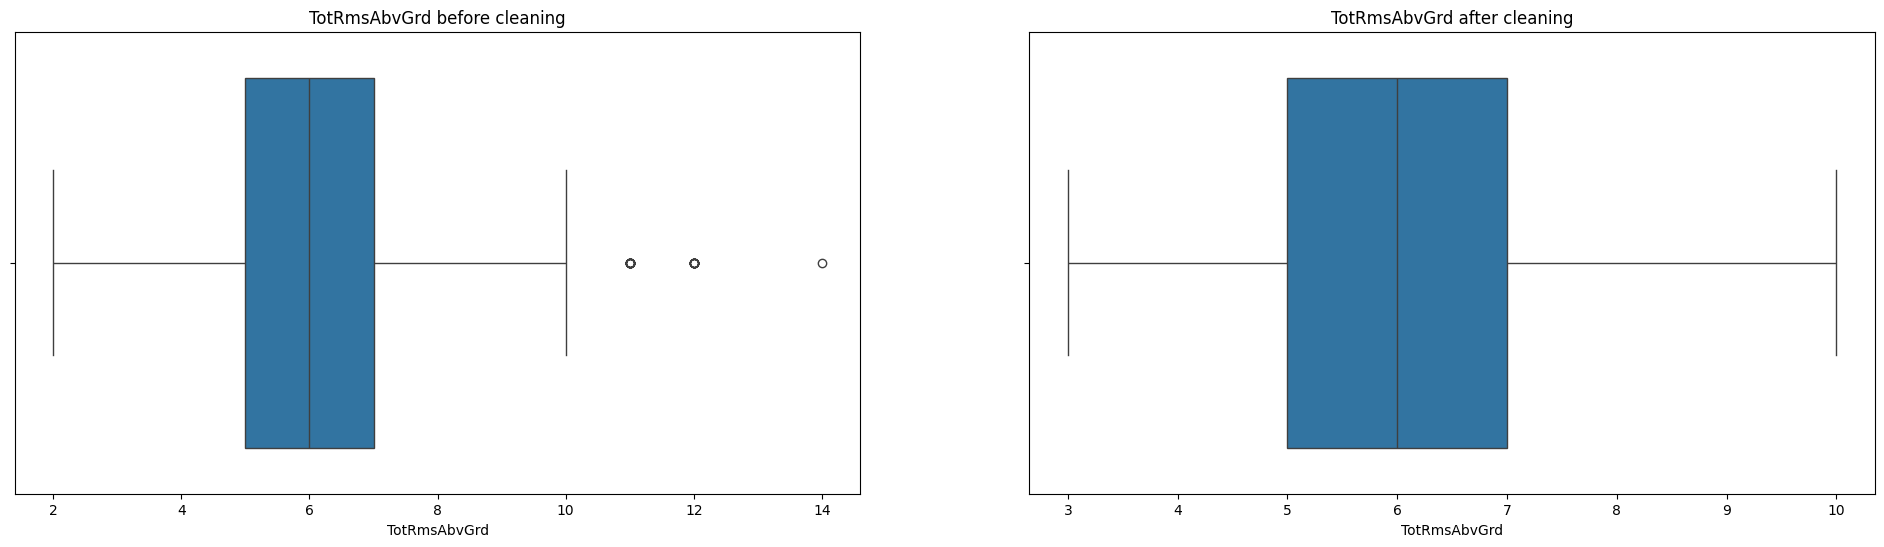

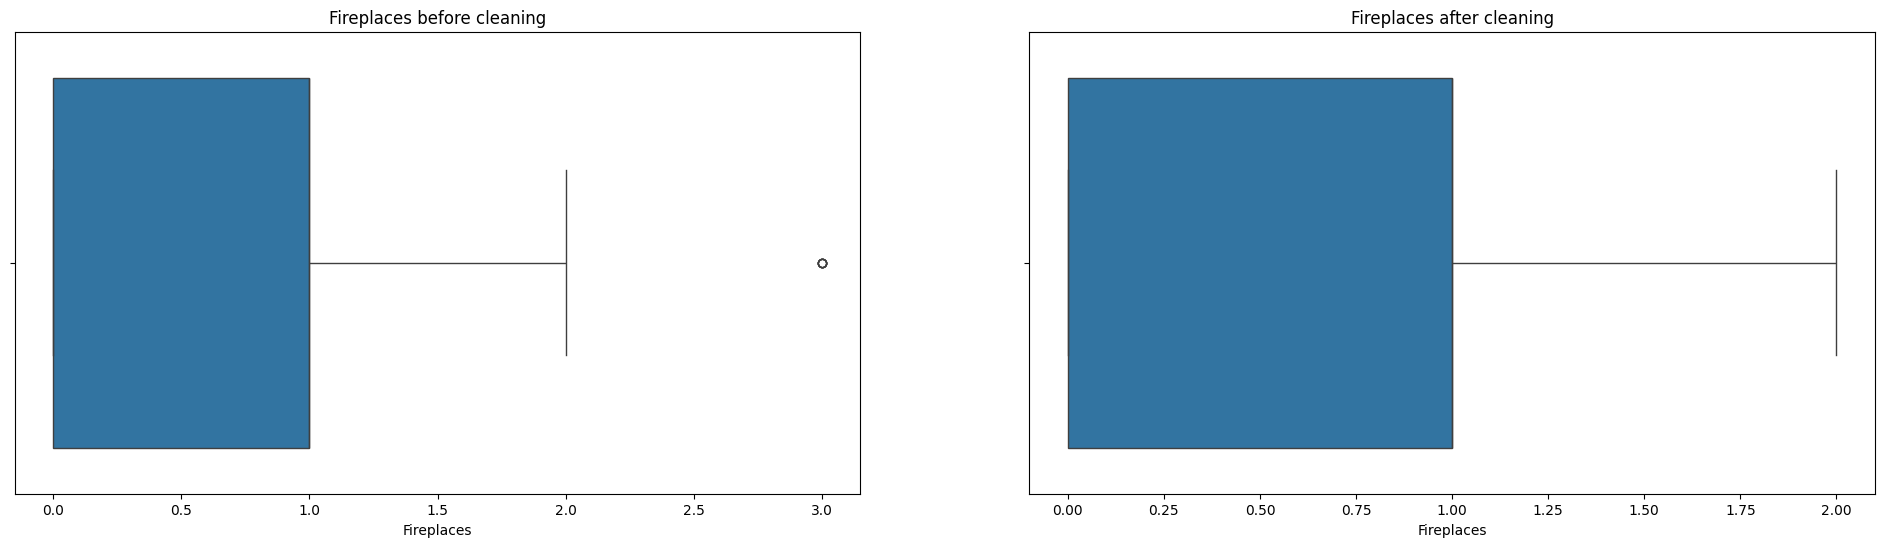

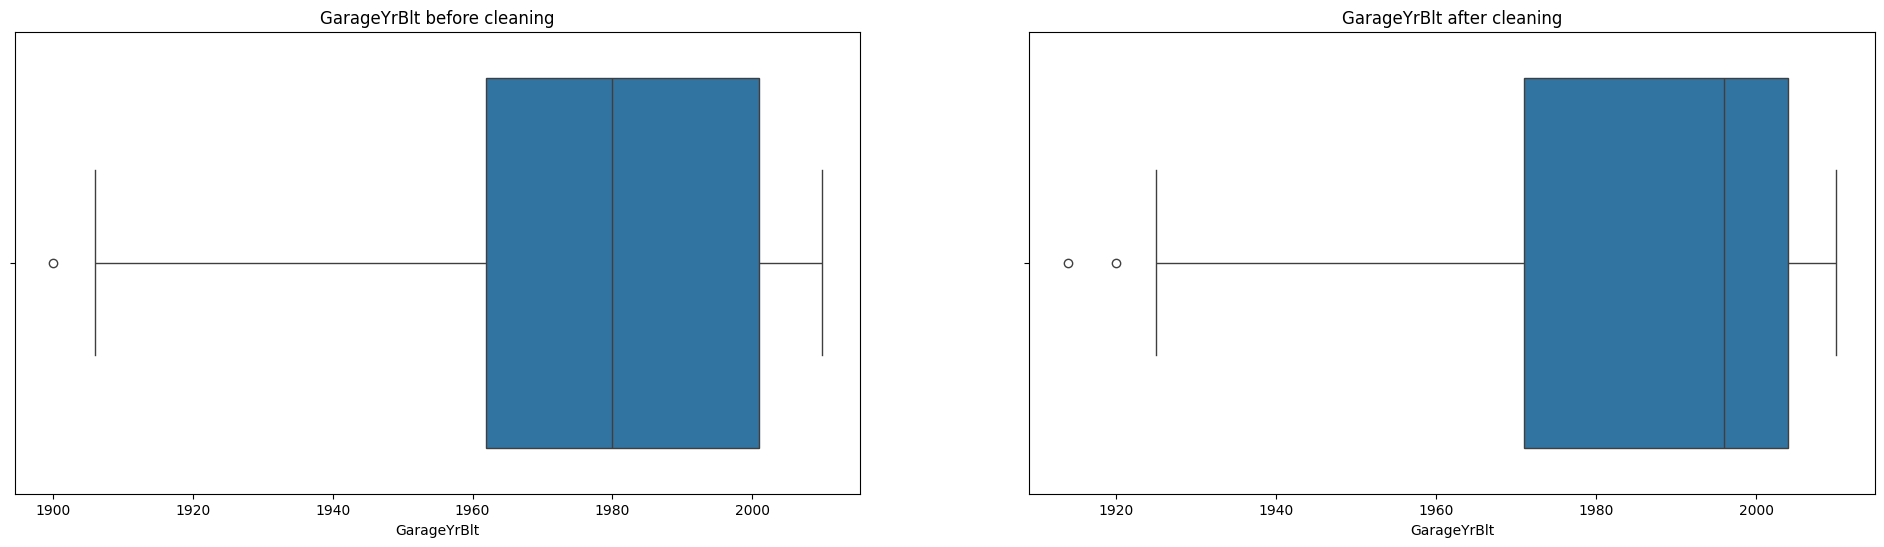

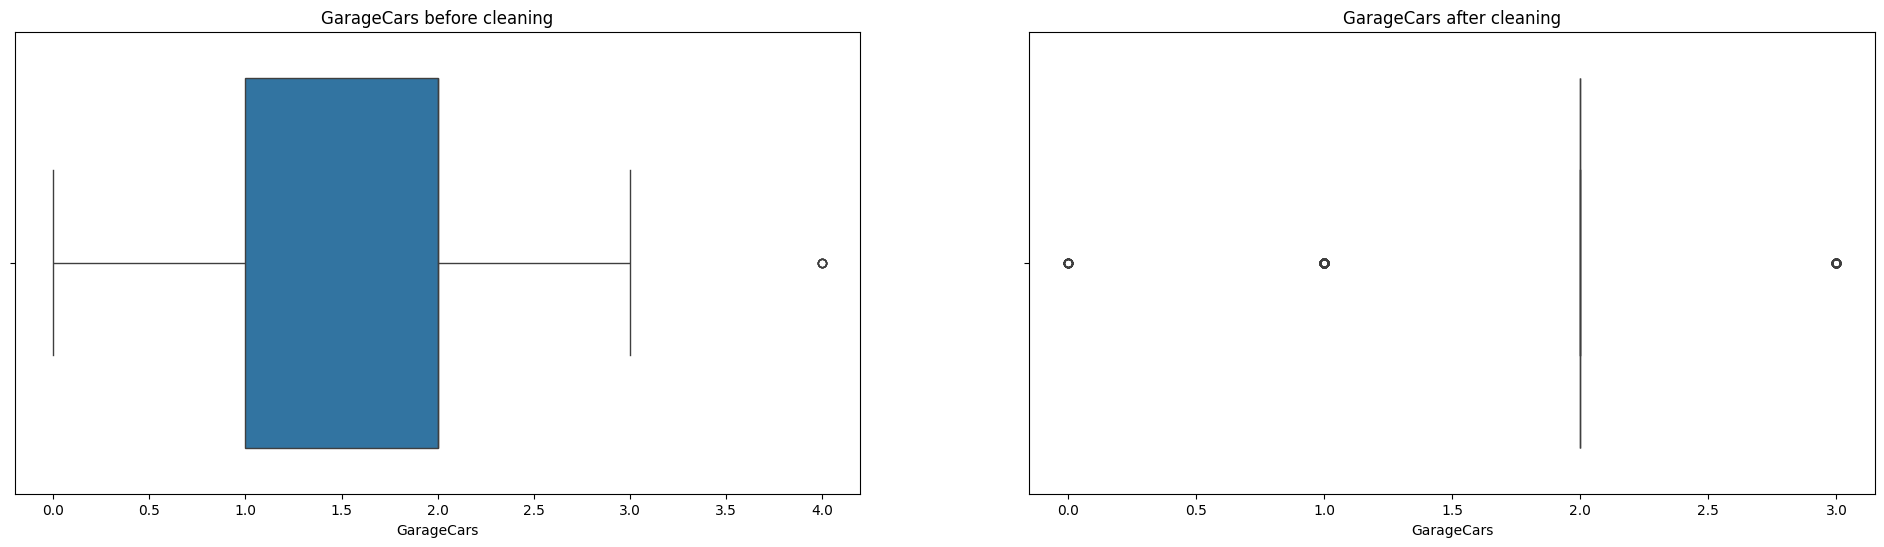

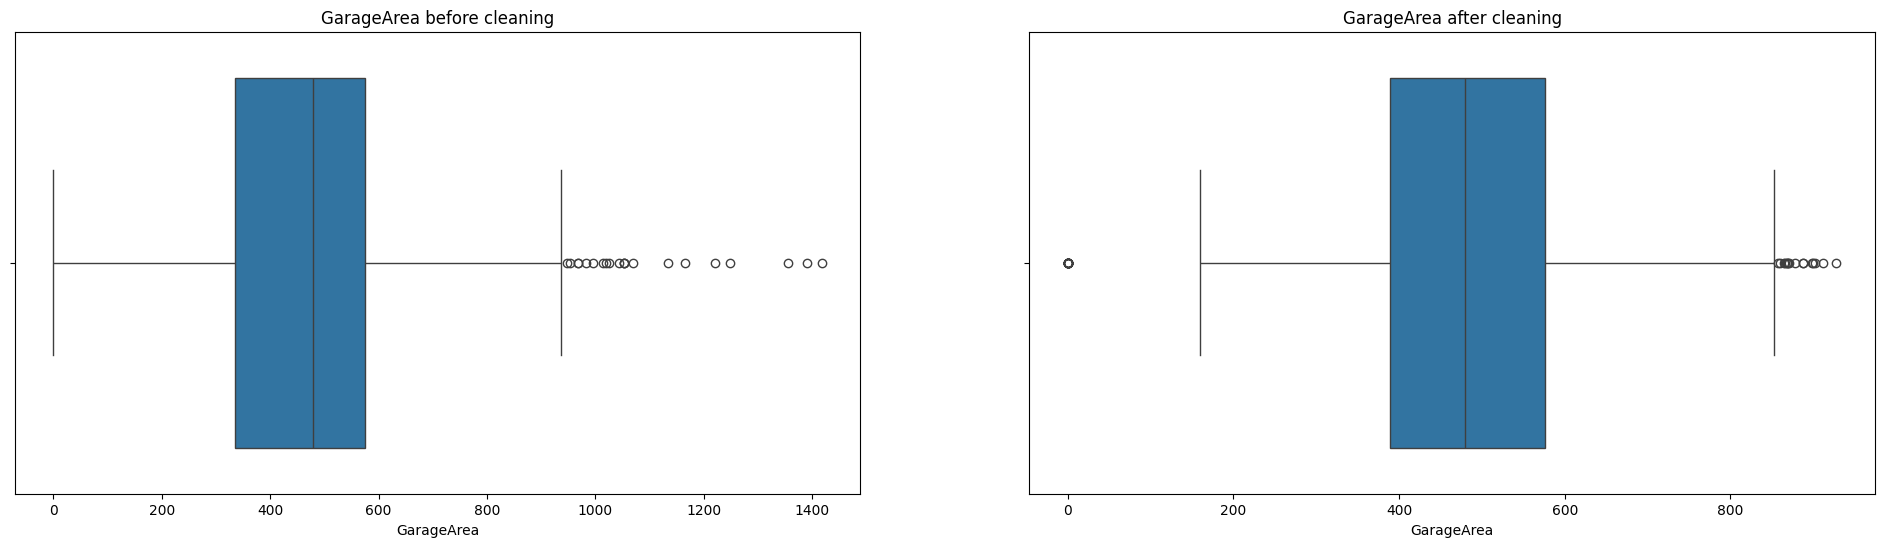

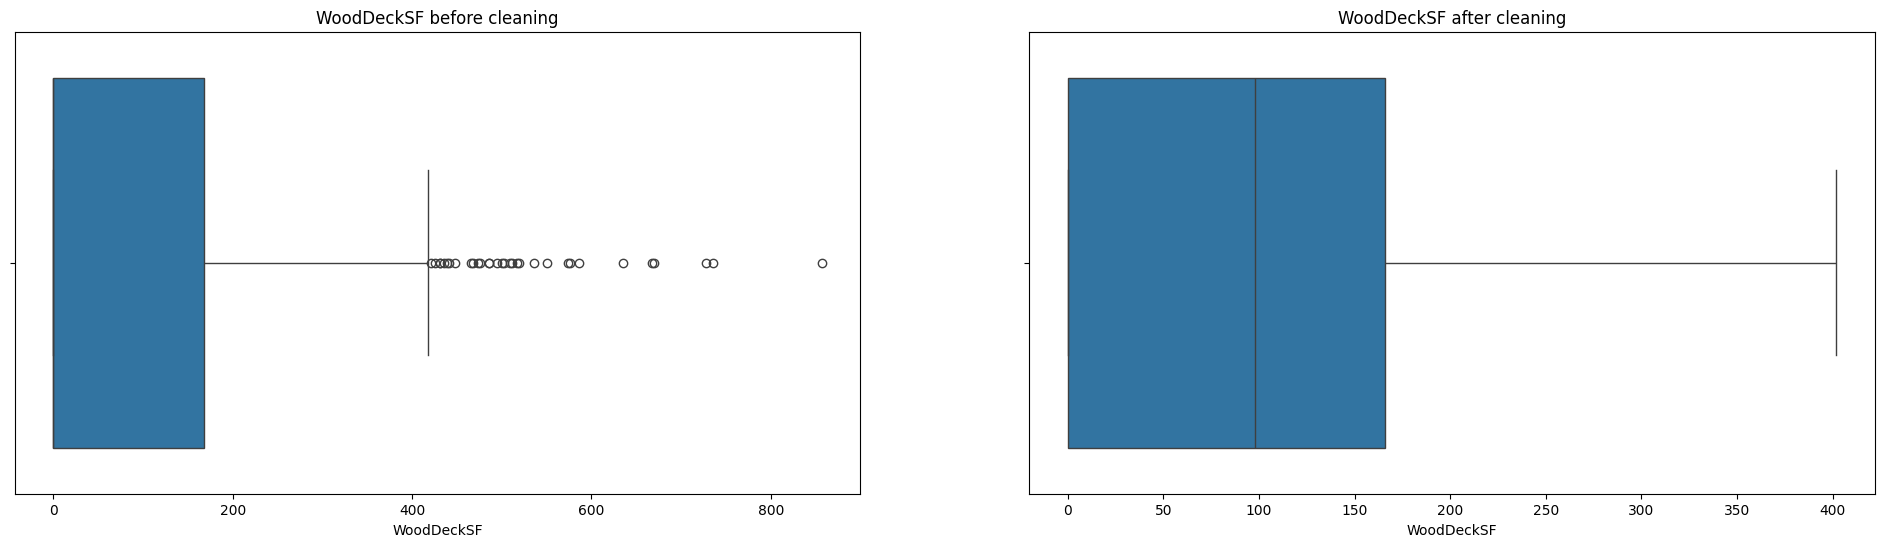

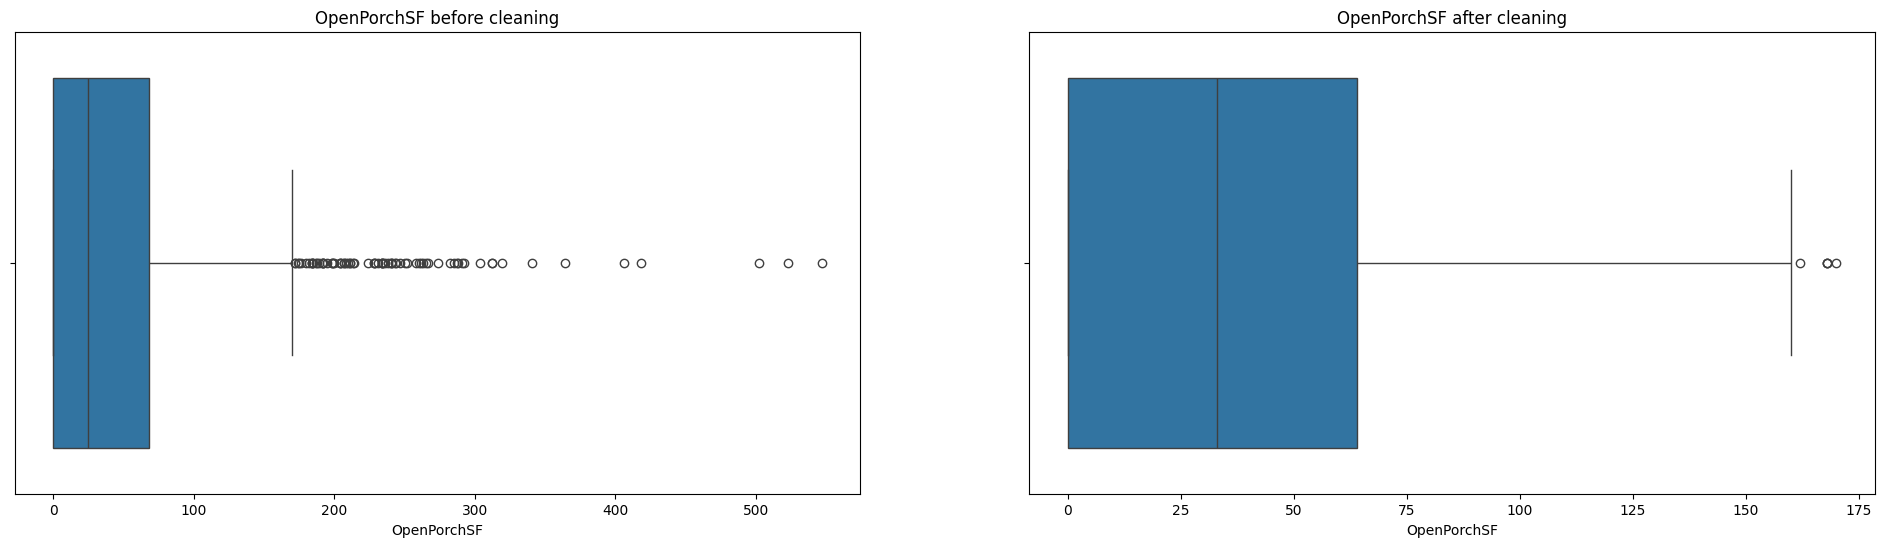

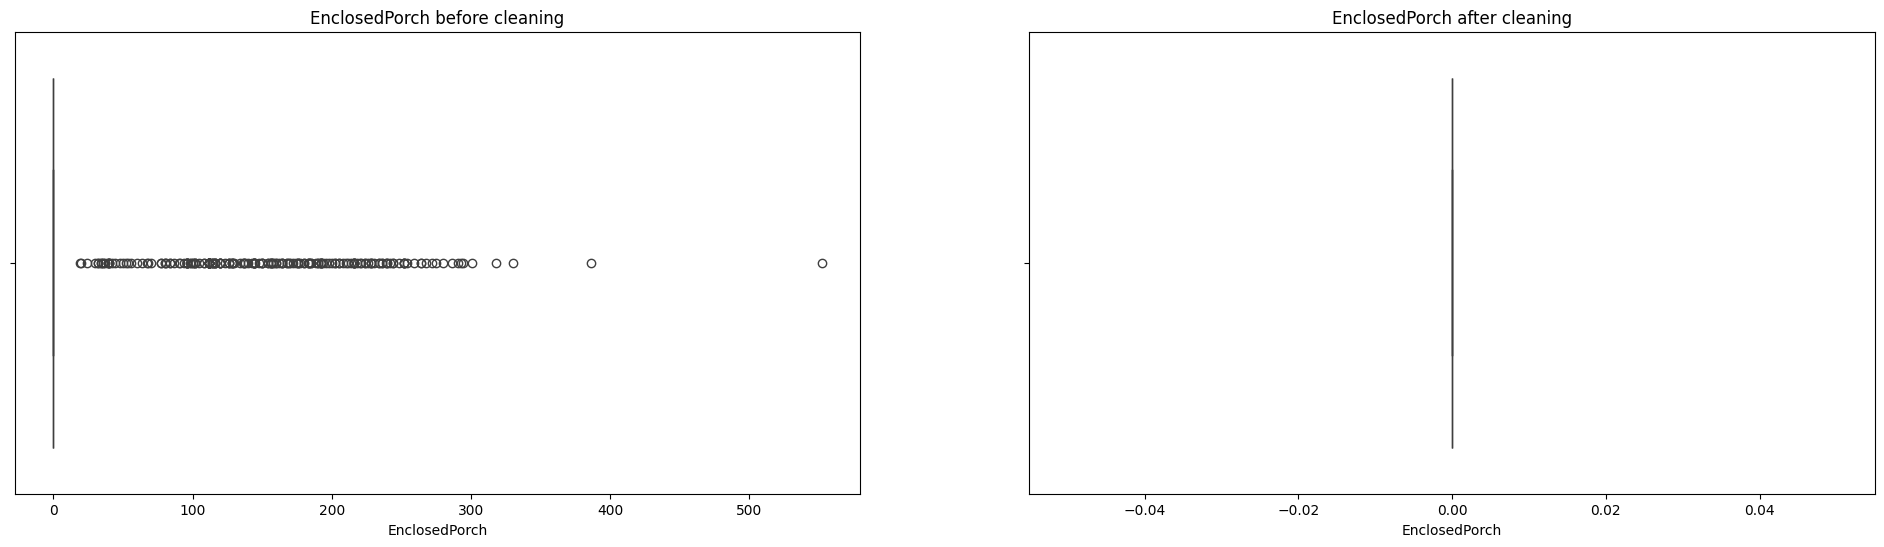

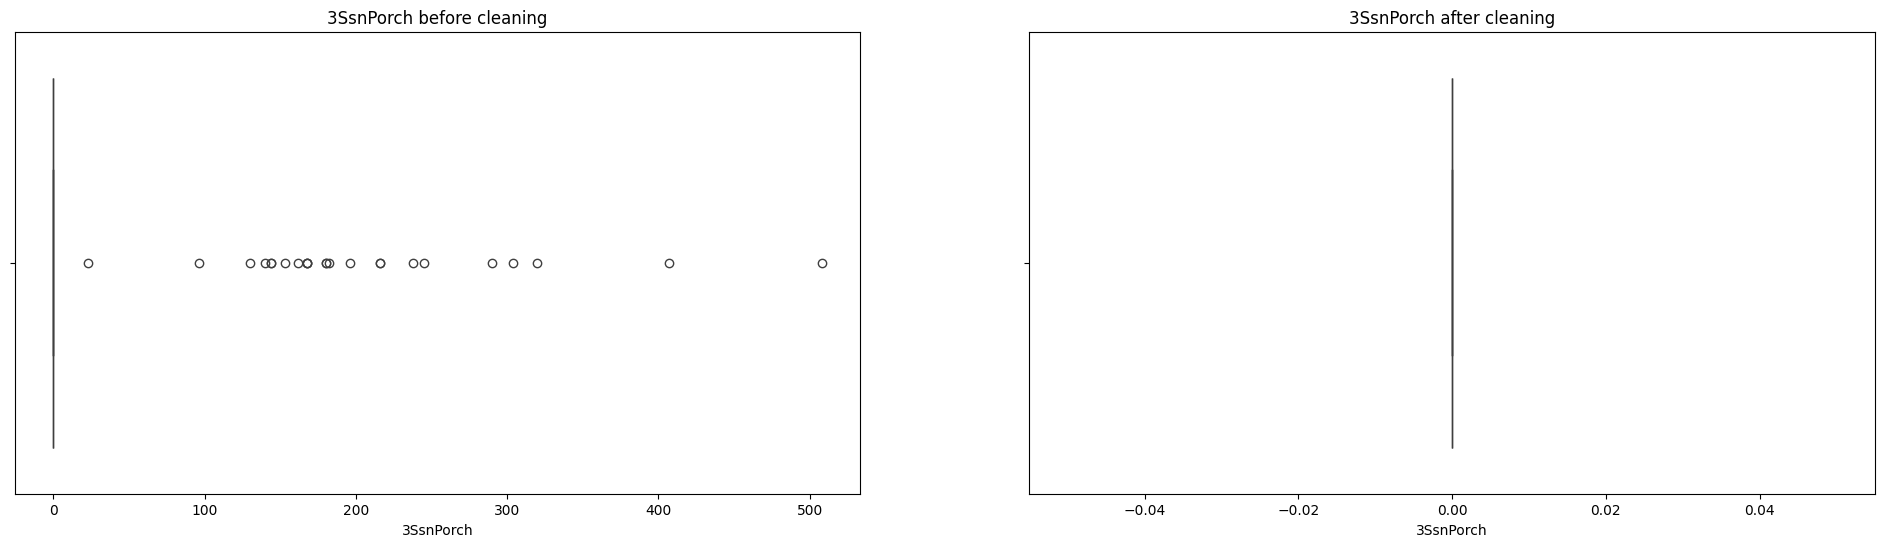

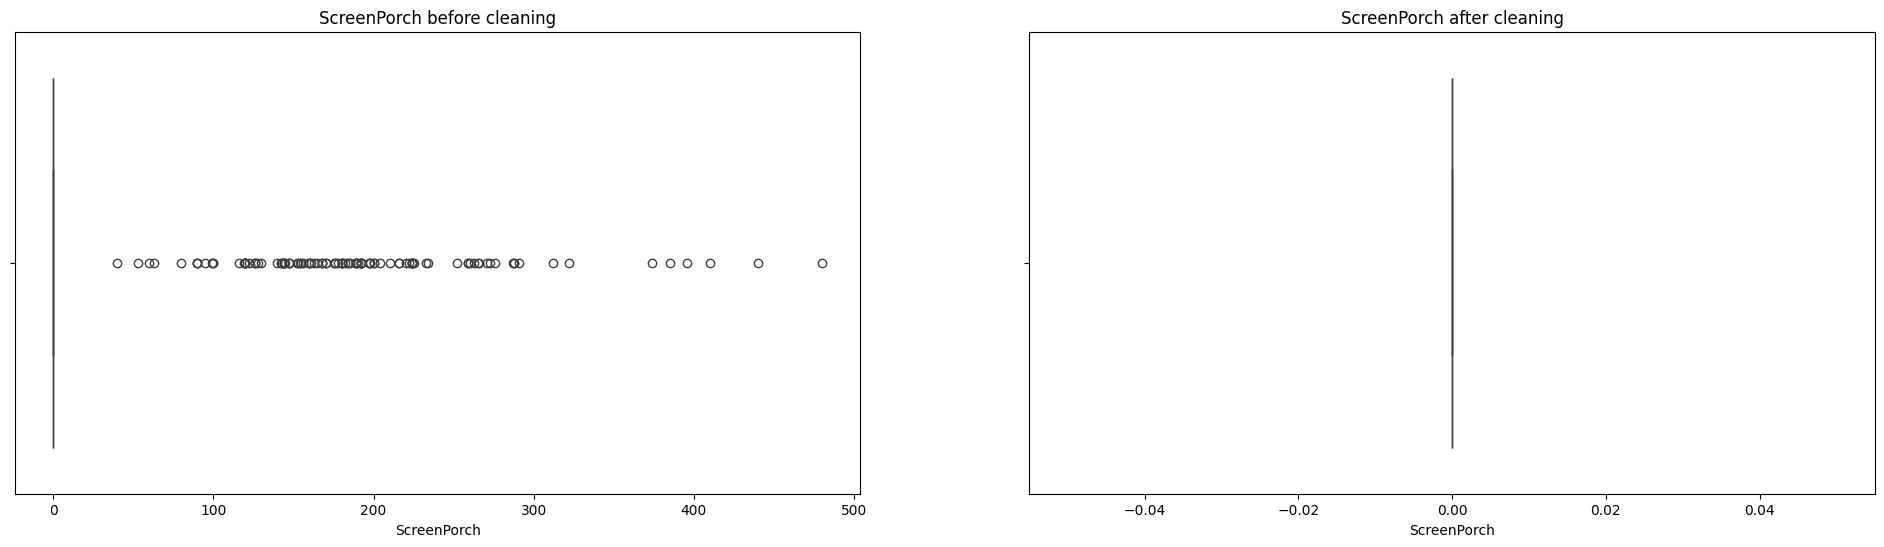

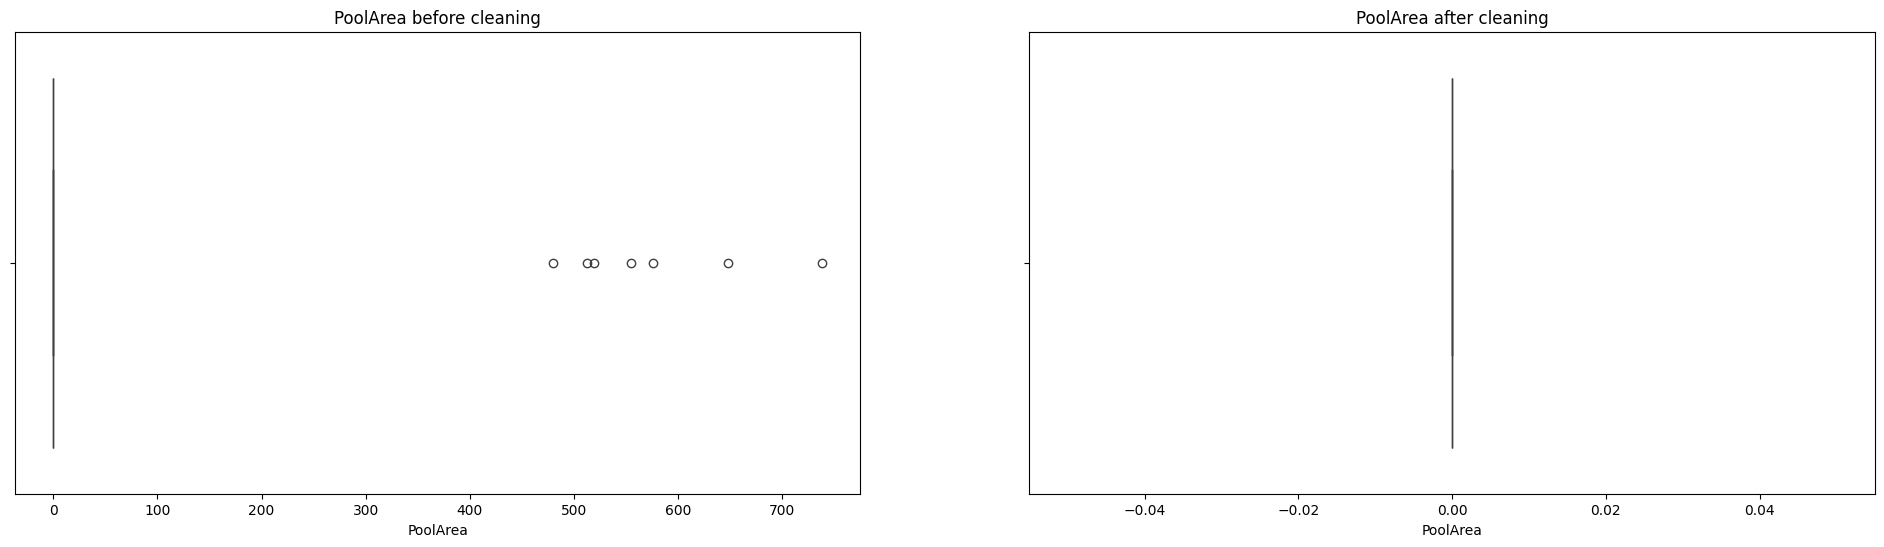

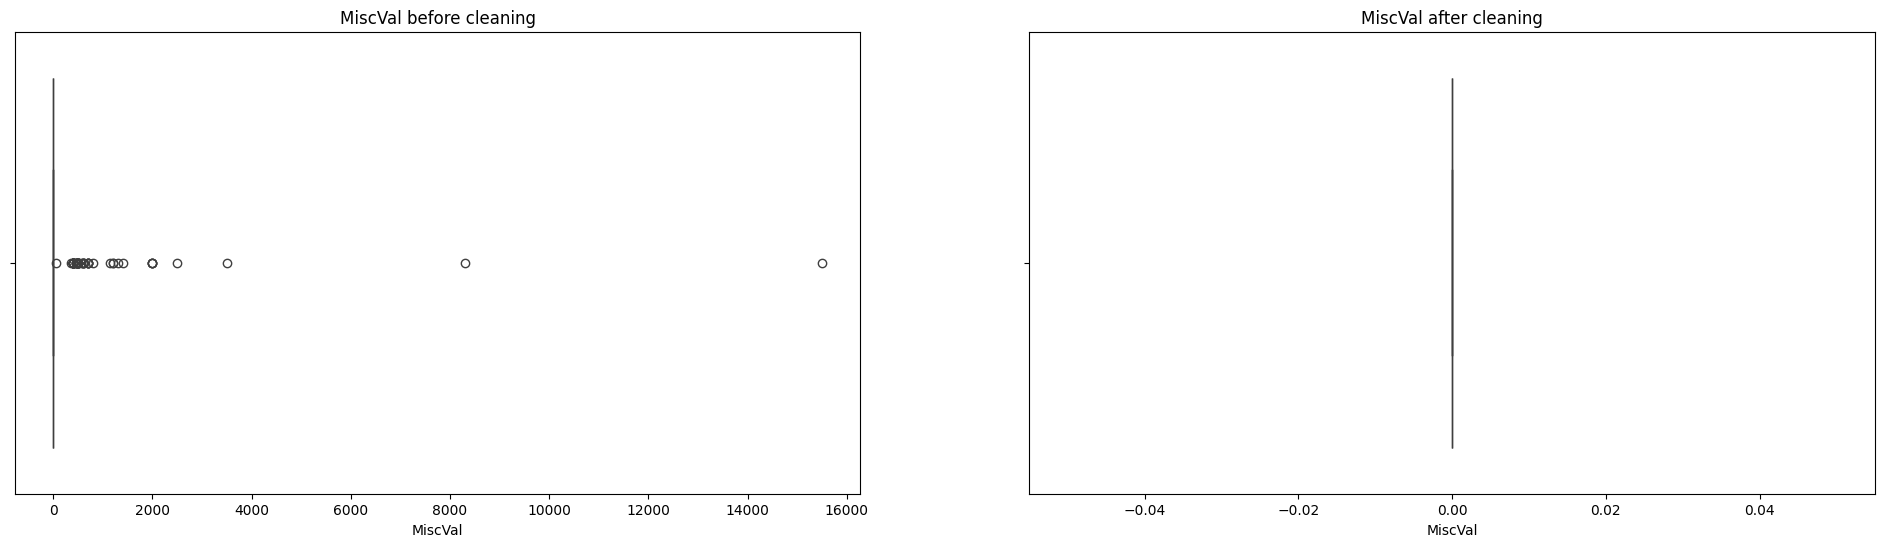

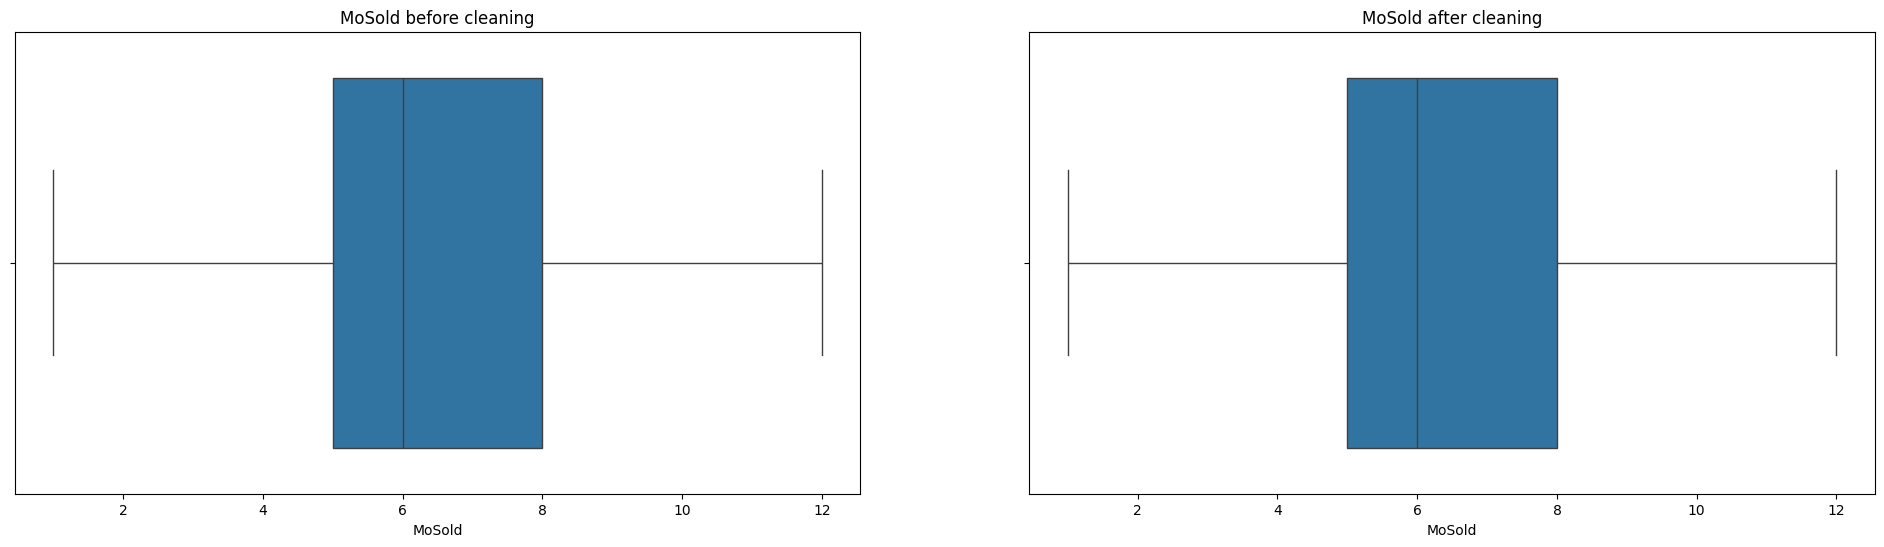

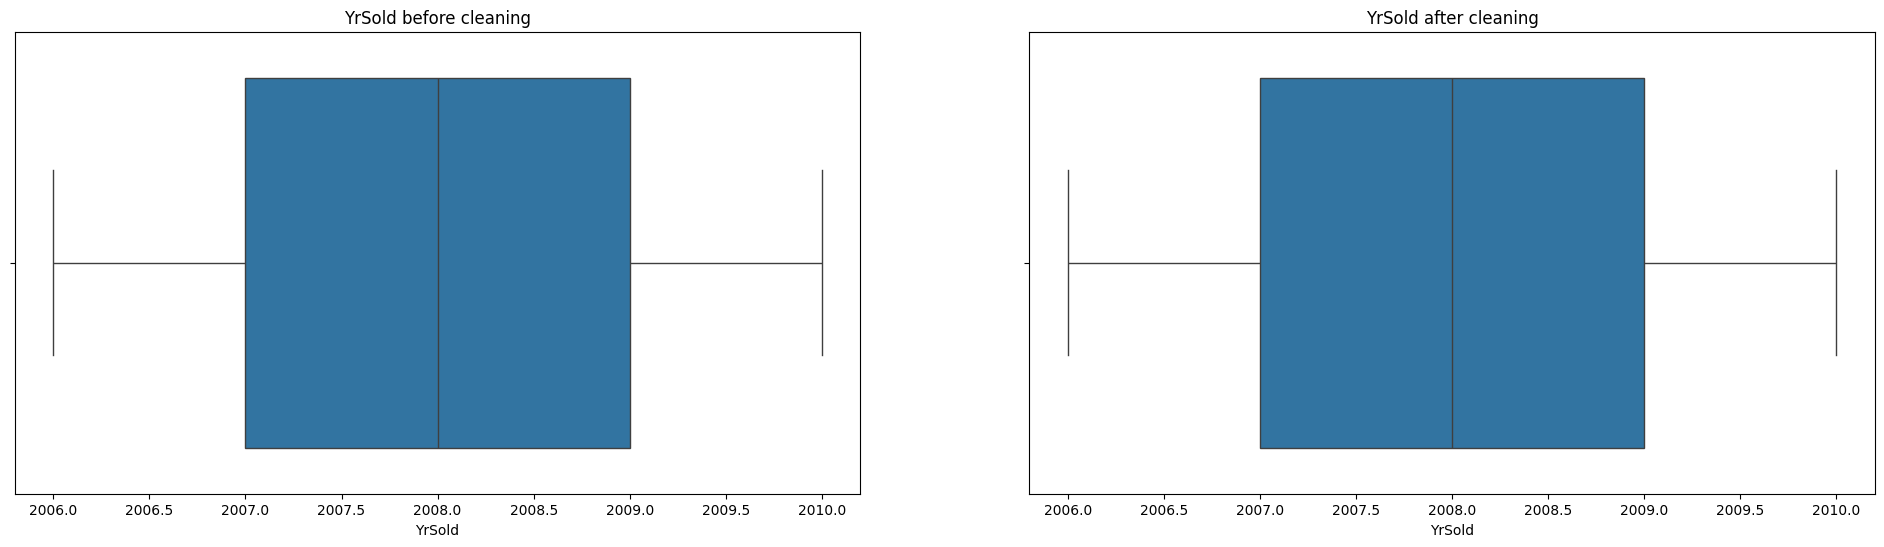

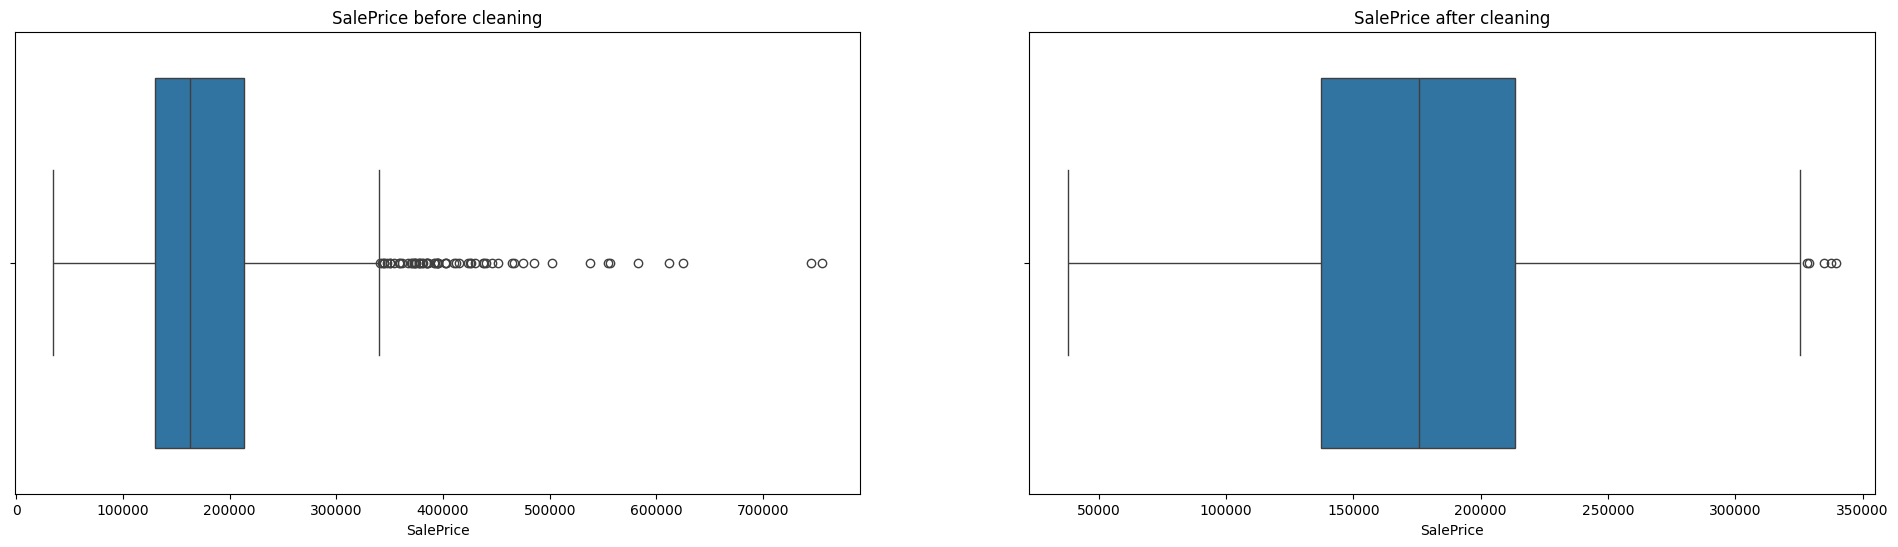

In [33]:
for feature in numeric_features:
    fig, ax = plt.subplots(1,2,figsize=(24,6))

    sns.boxplot(x=train[feature], ax=ax[0])
    ax[0].set_title(f"{feature} before cleaning")

    sns.boxplot(x=df_filtered_numeric[feature])
    ax[1].set_title(f"{feature} after cleaning")

    plt.show()




Standarisasi

Standarisasi fitur numerik

In [34]:
scaler = StandardScaler()
# df.isna().sum()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

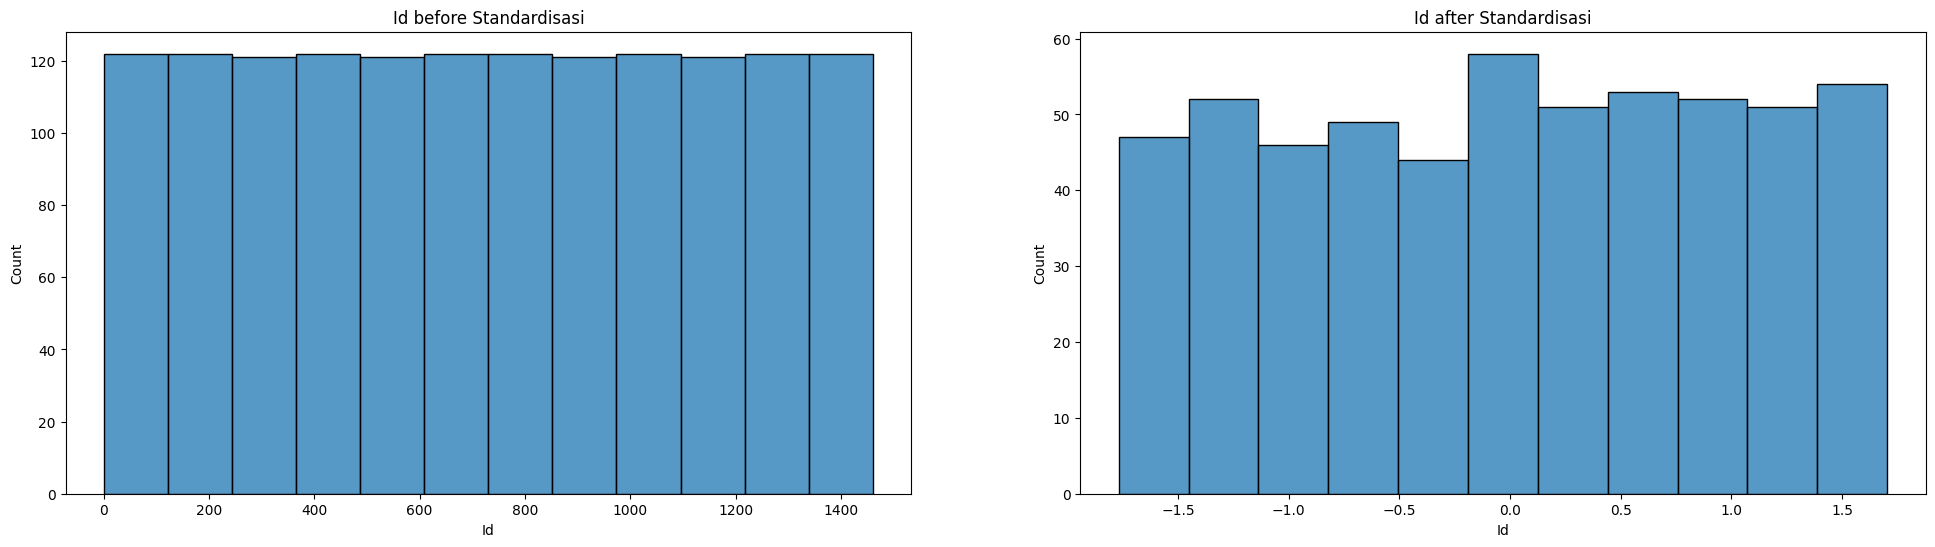

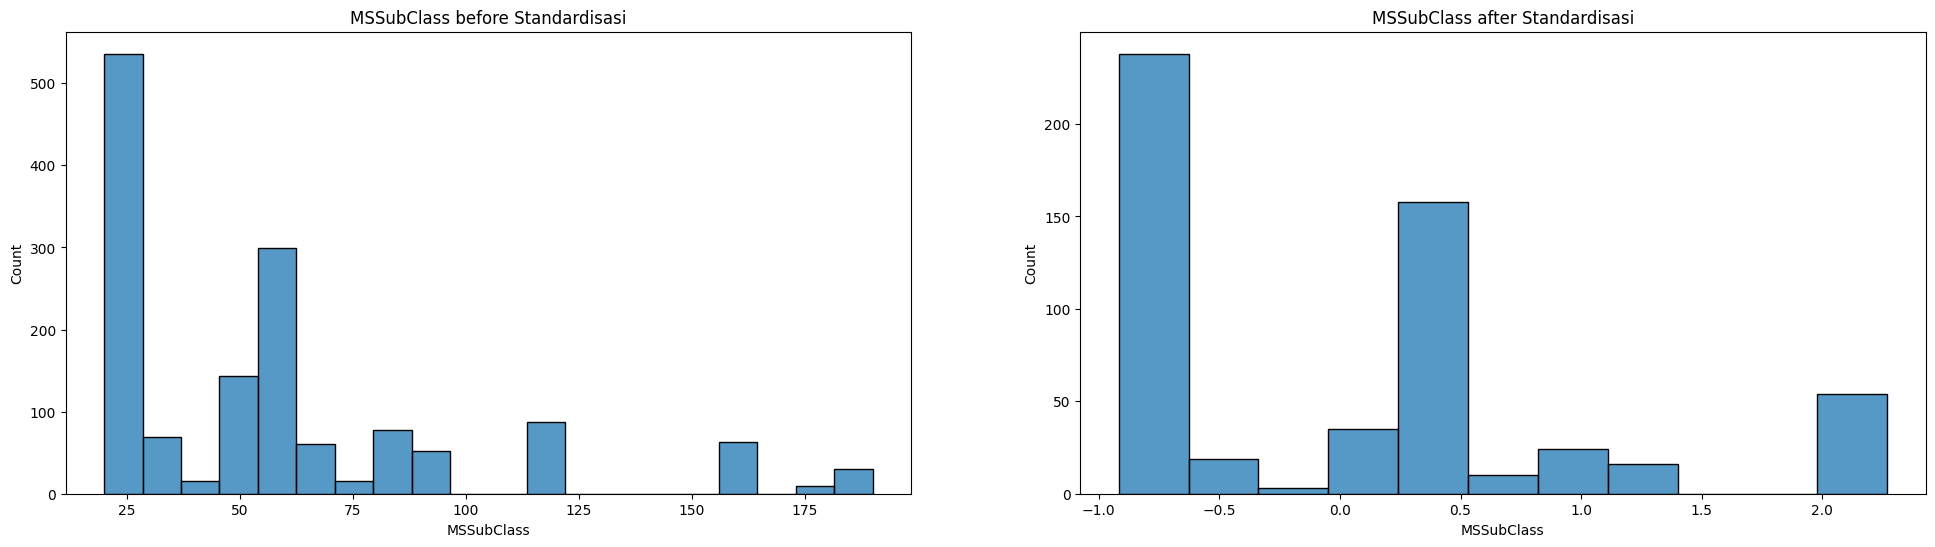

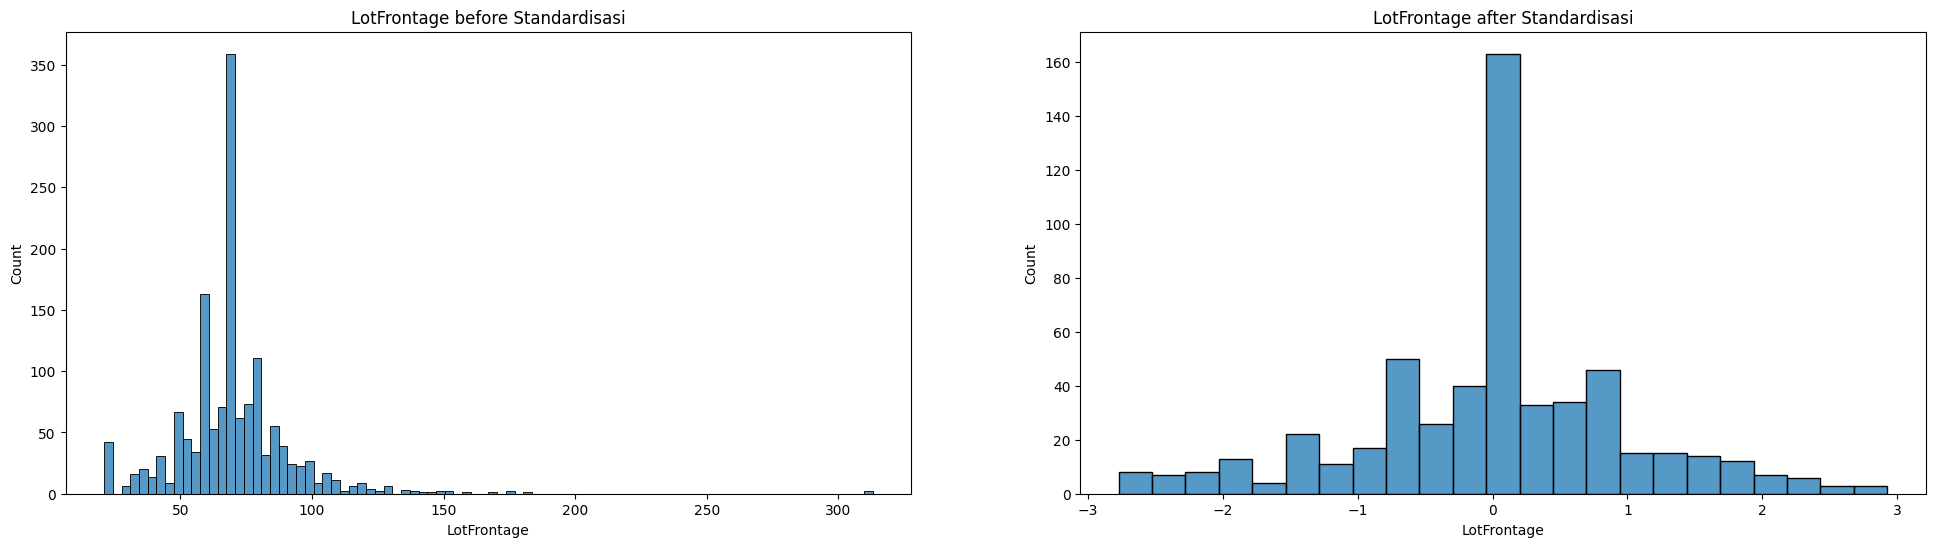

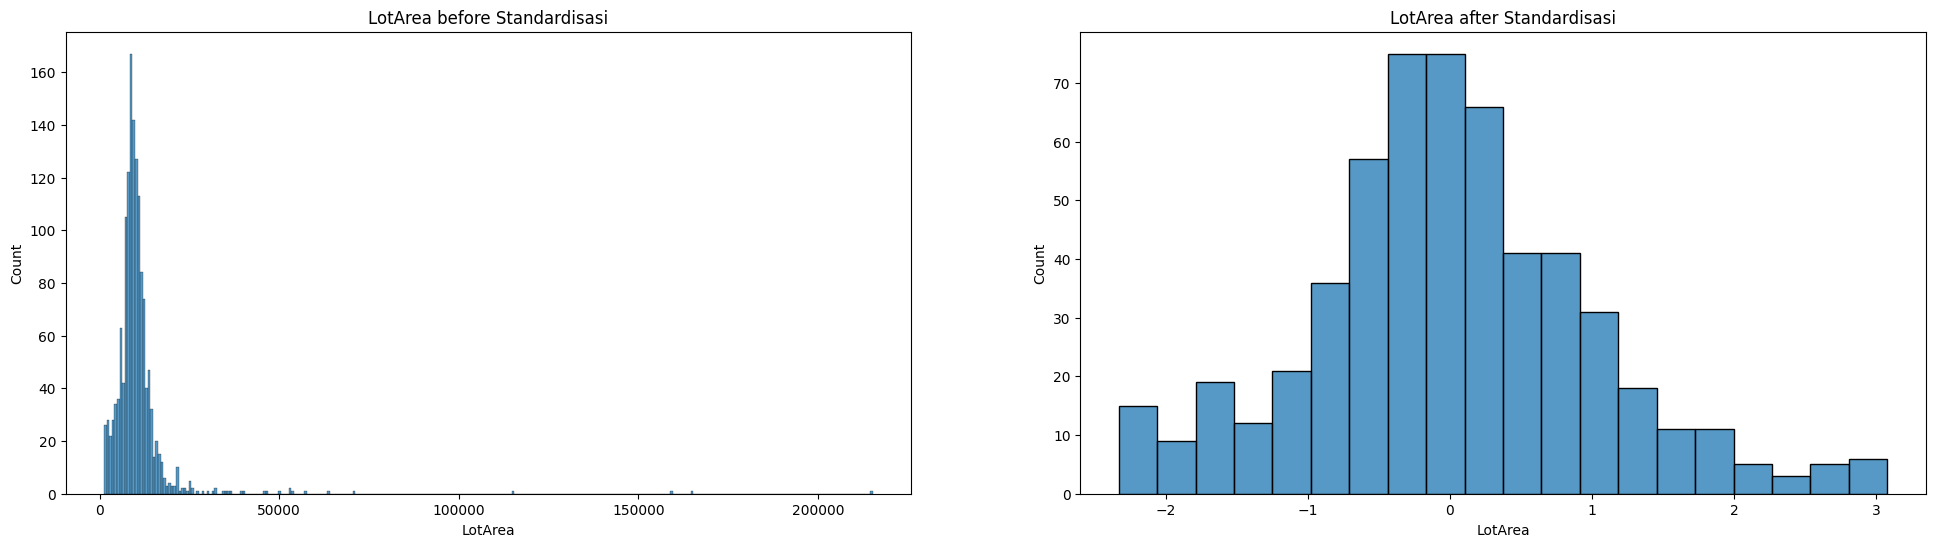

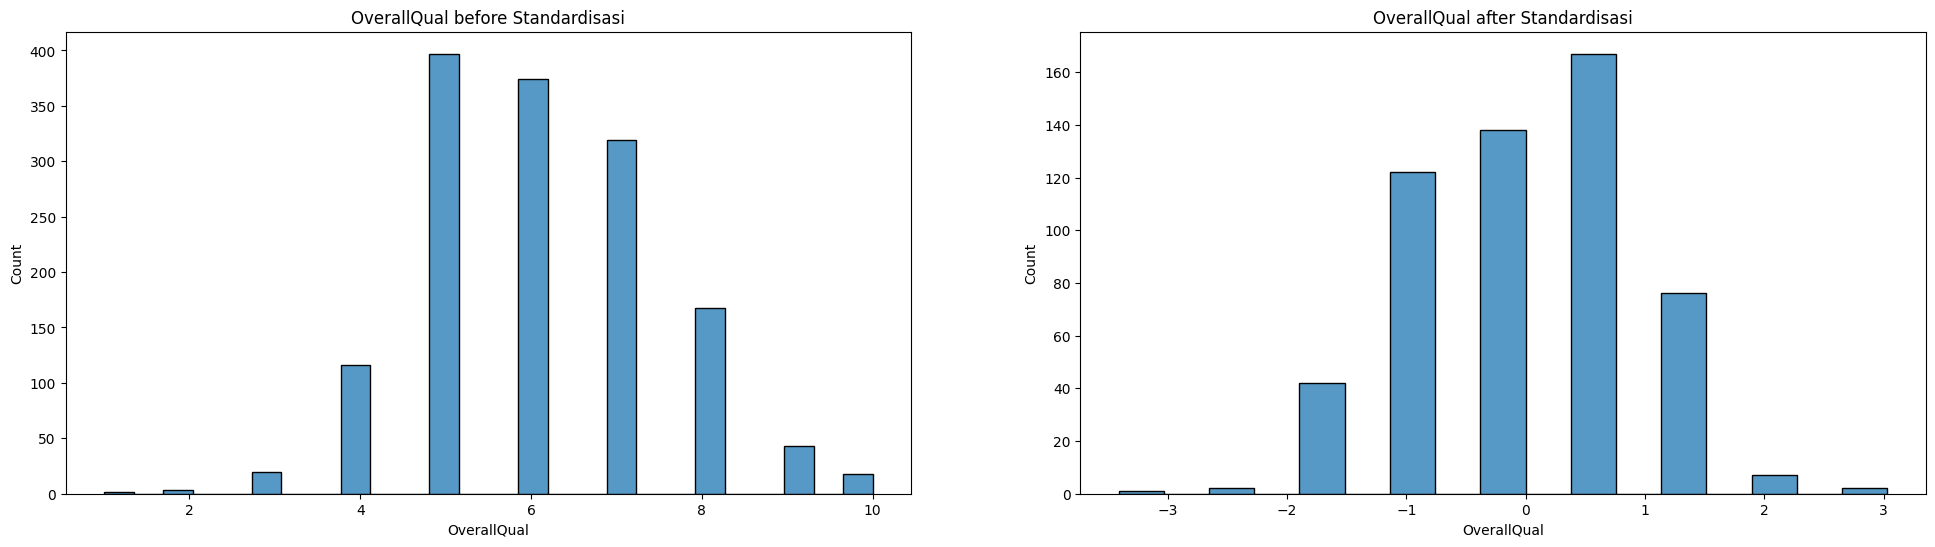

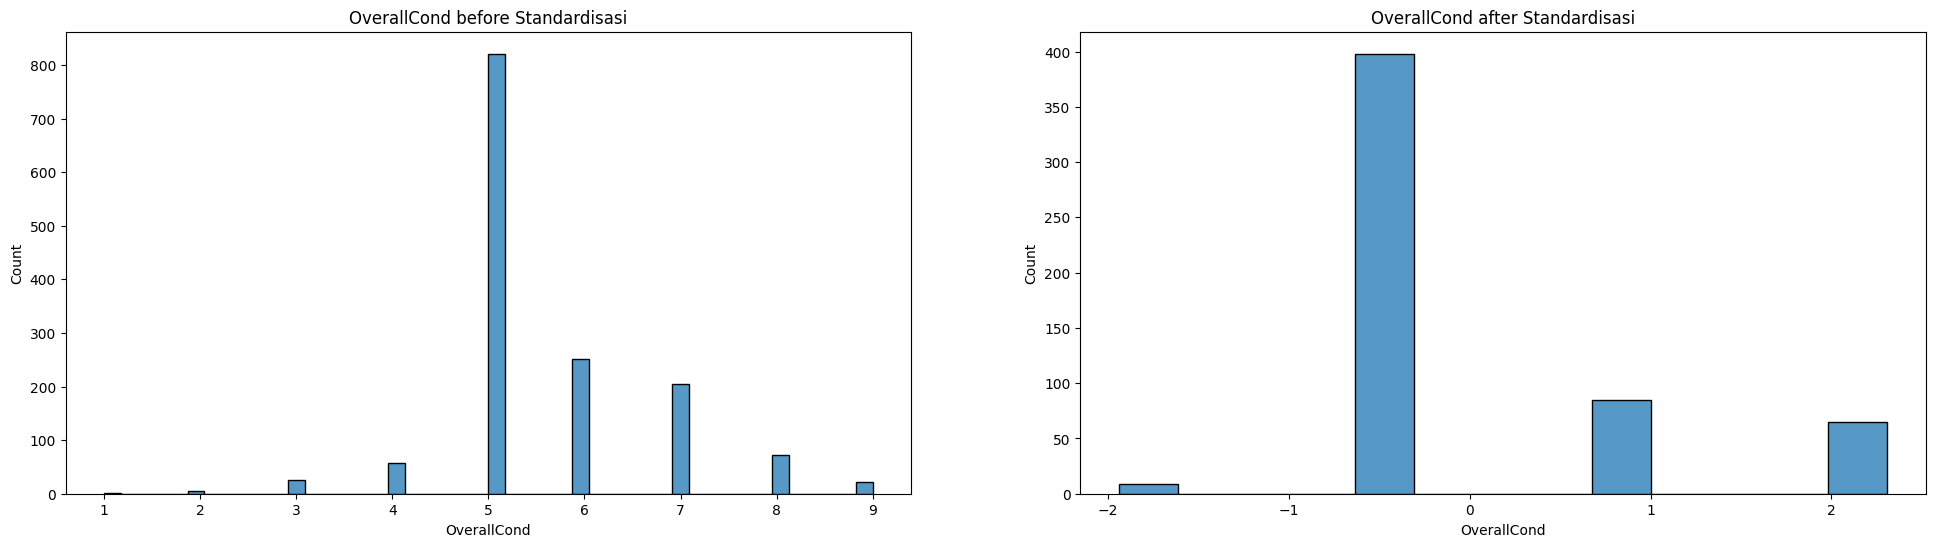

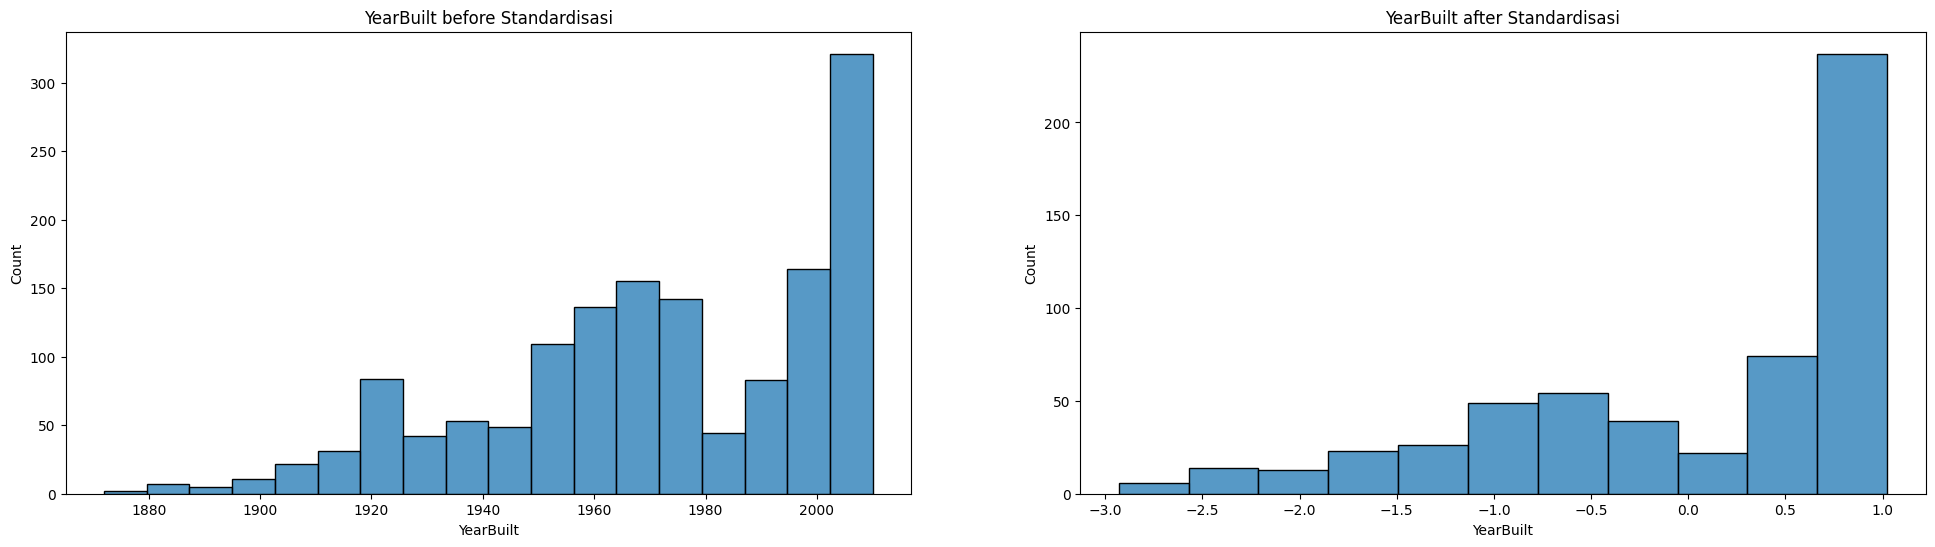

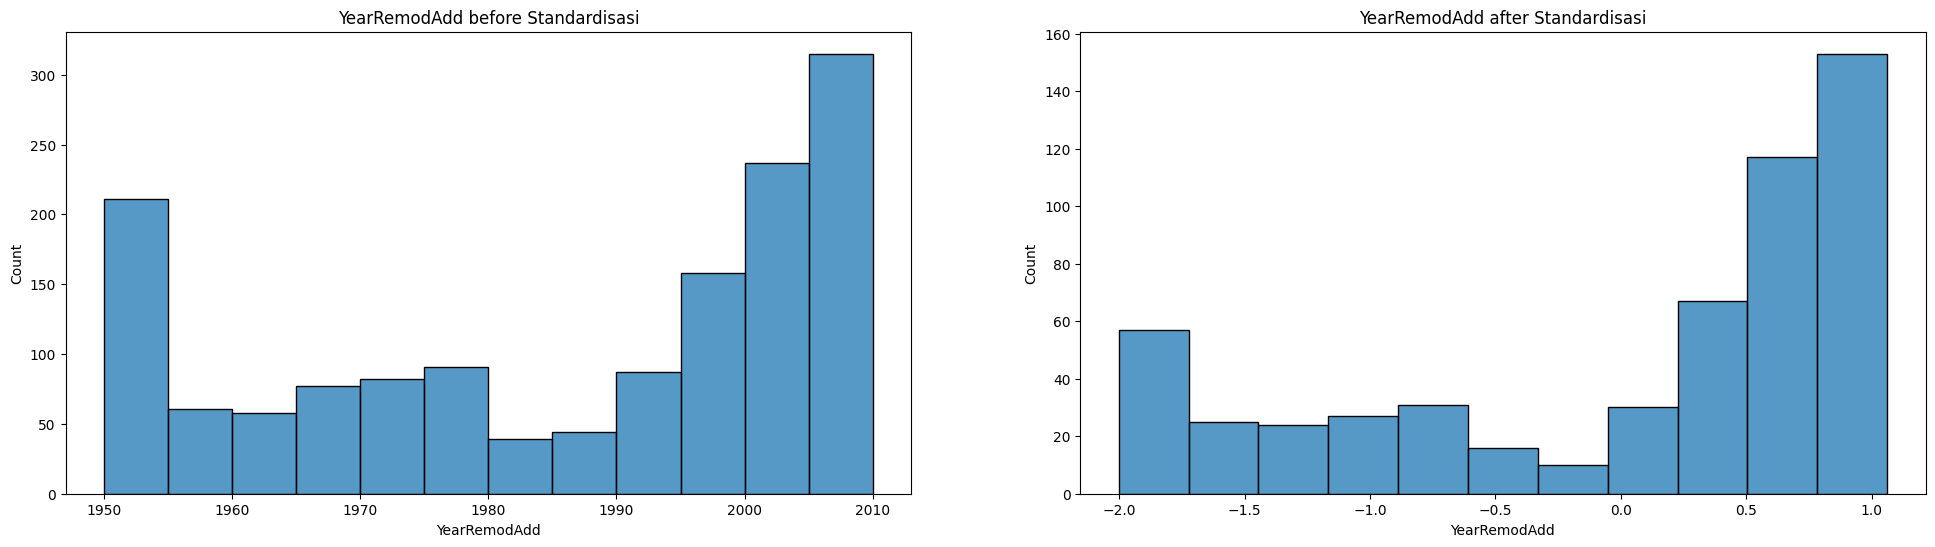

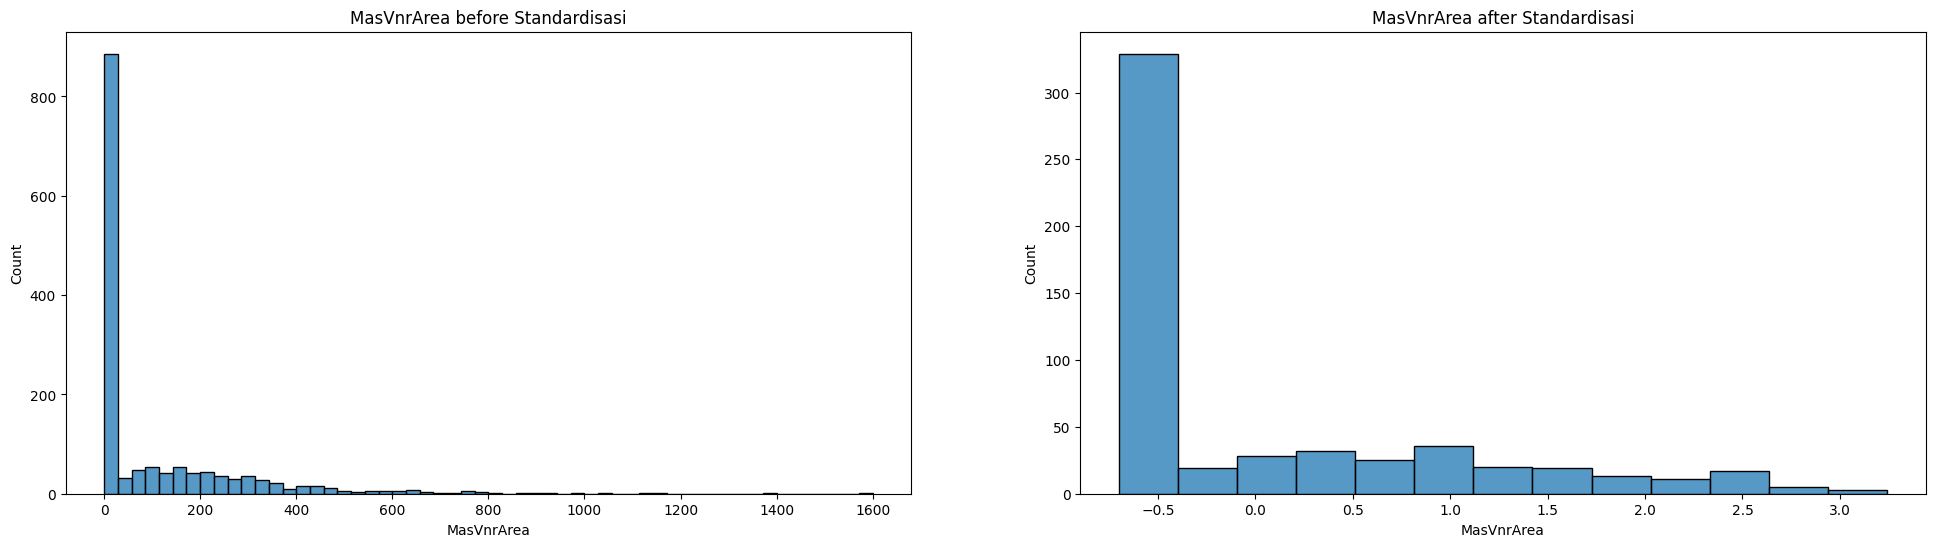

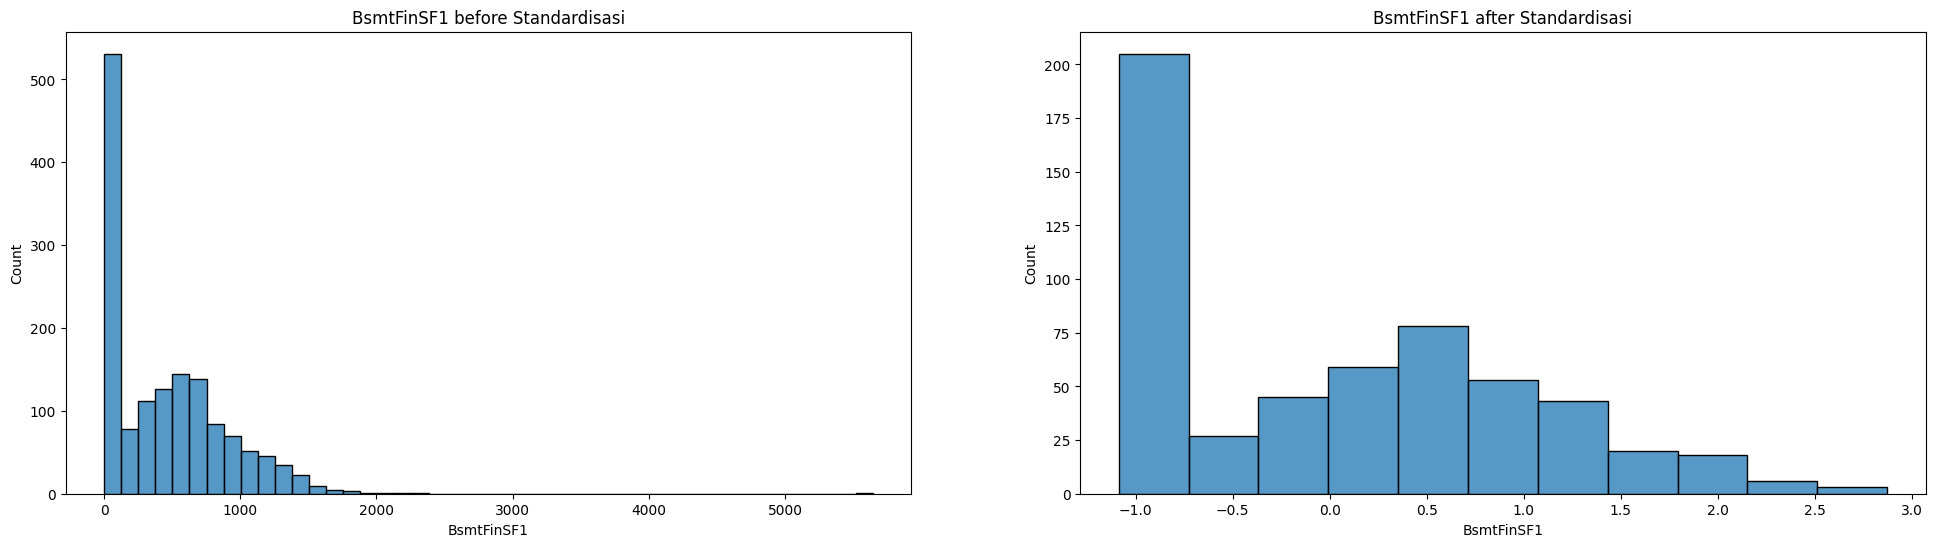

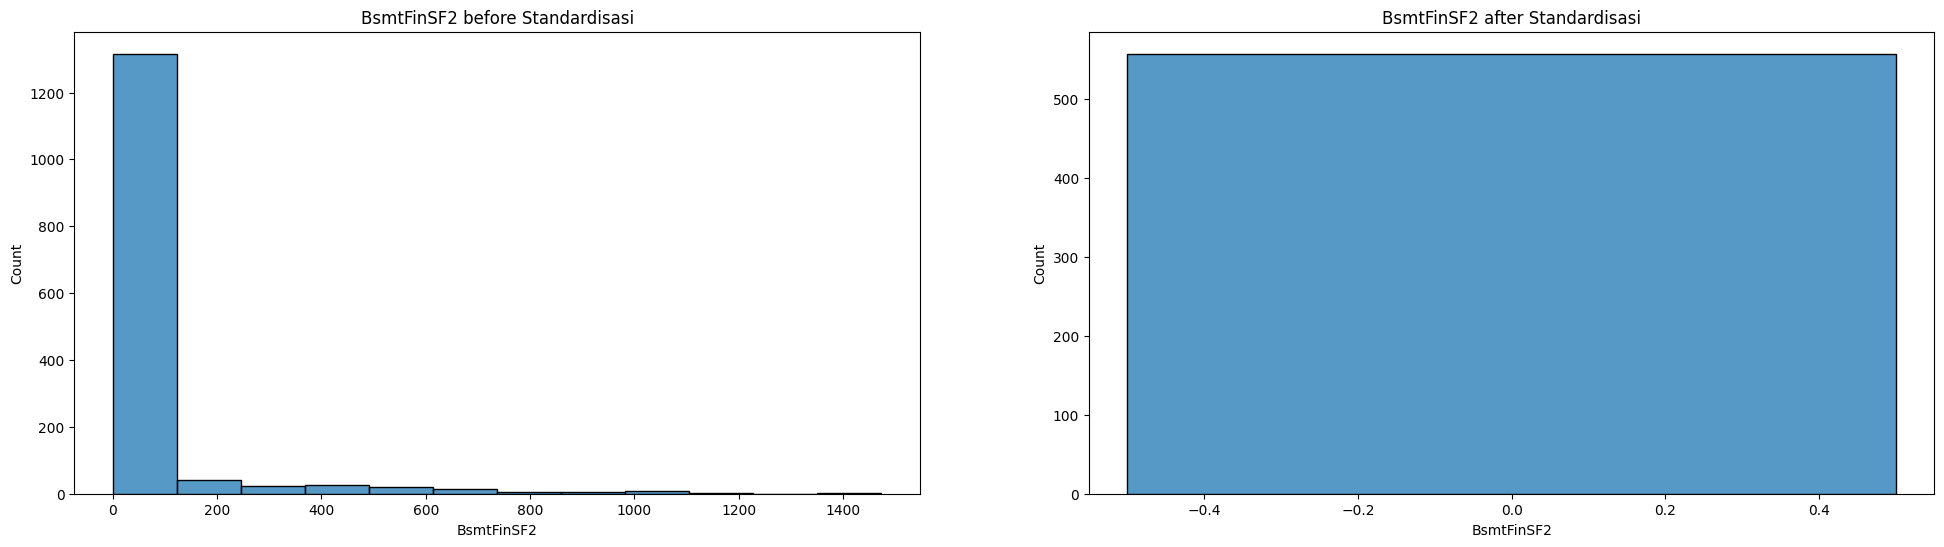

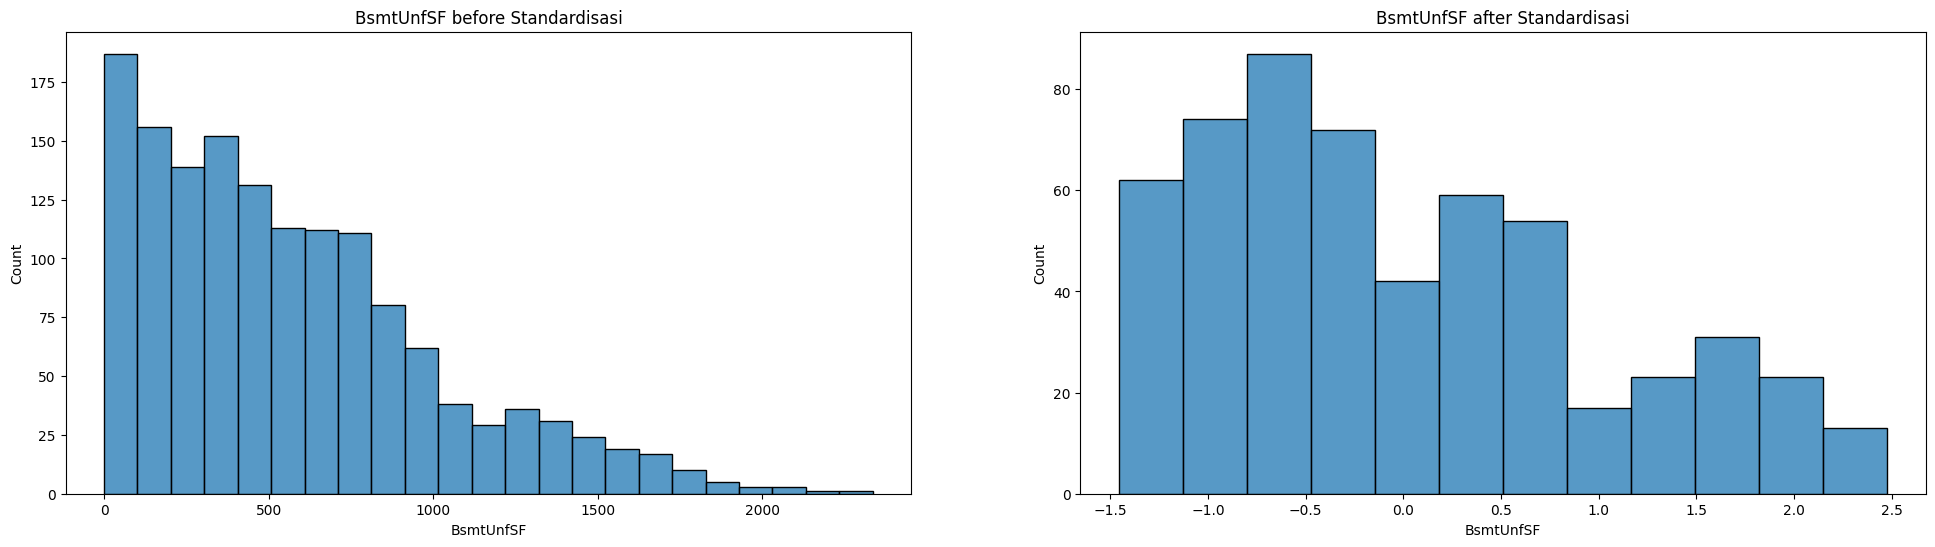

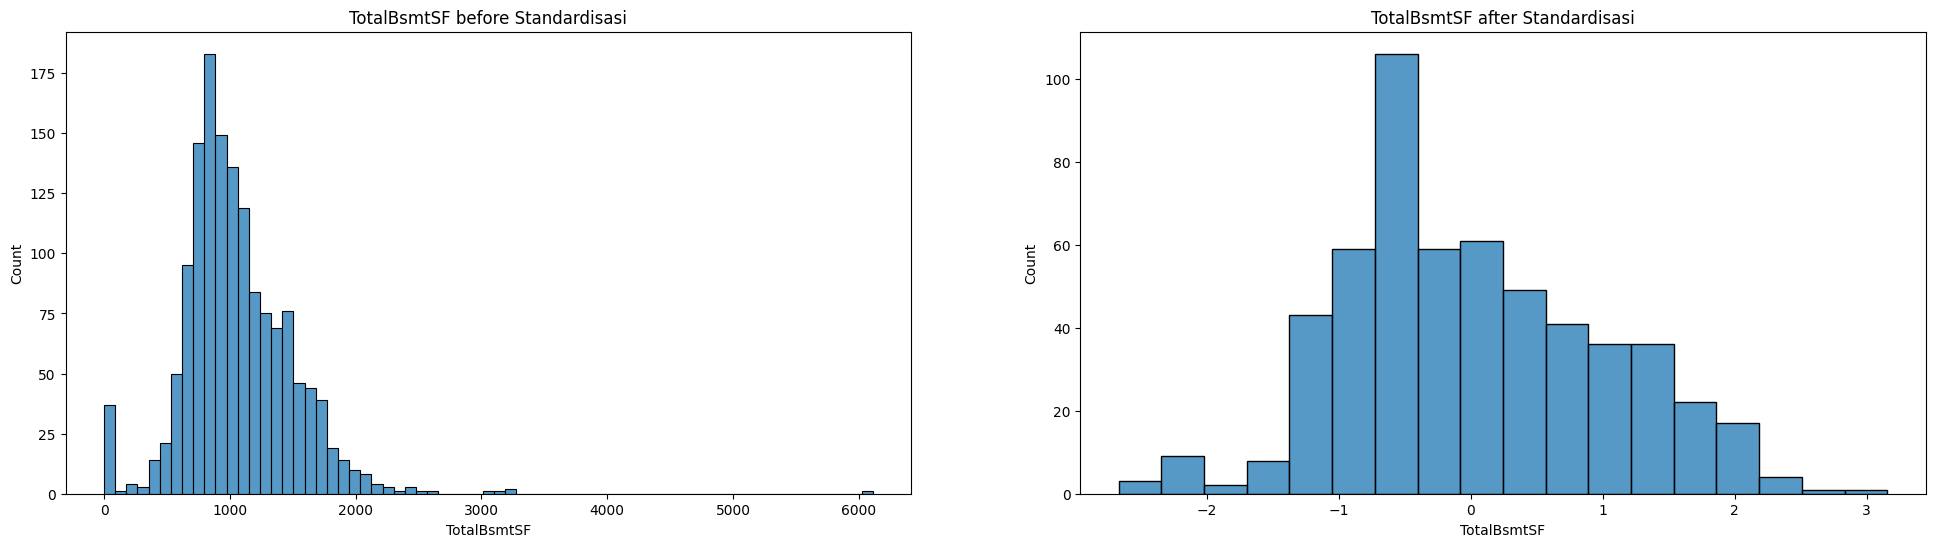

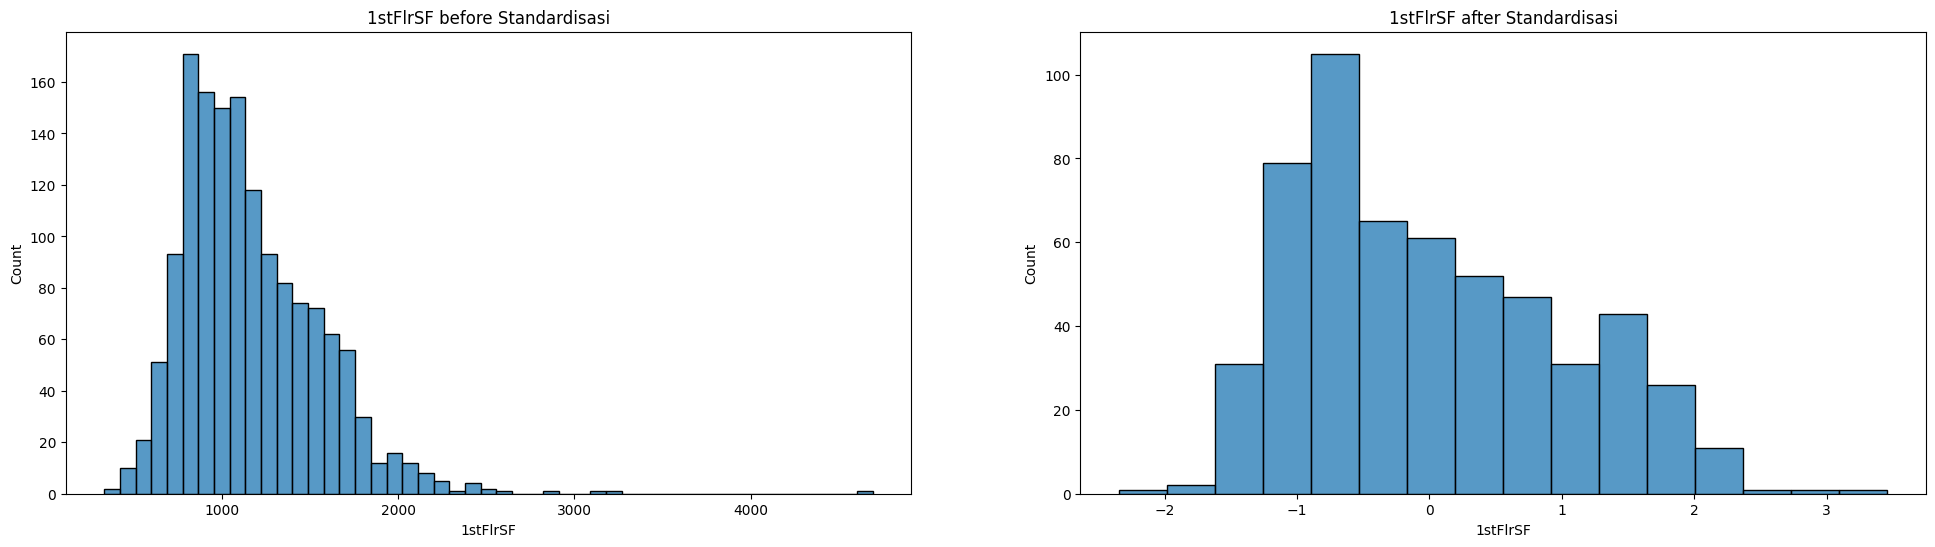

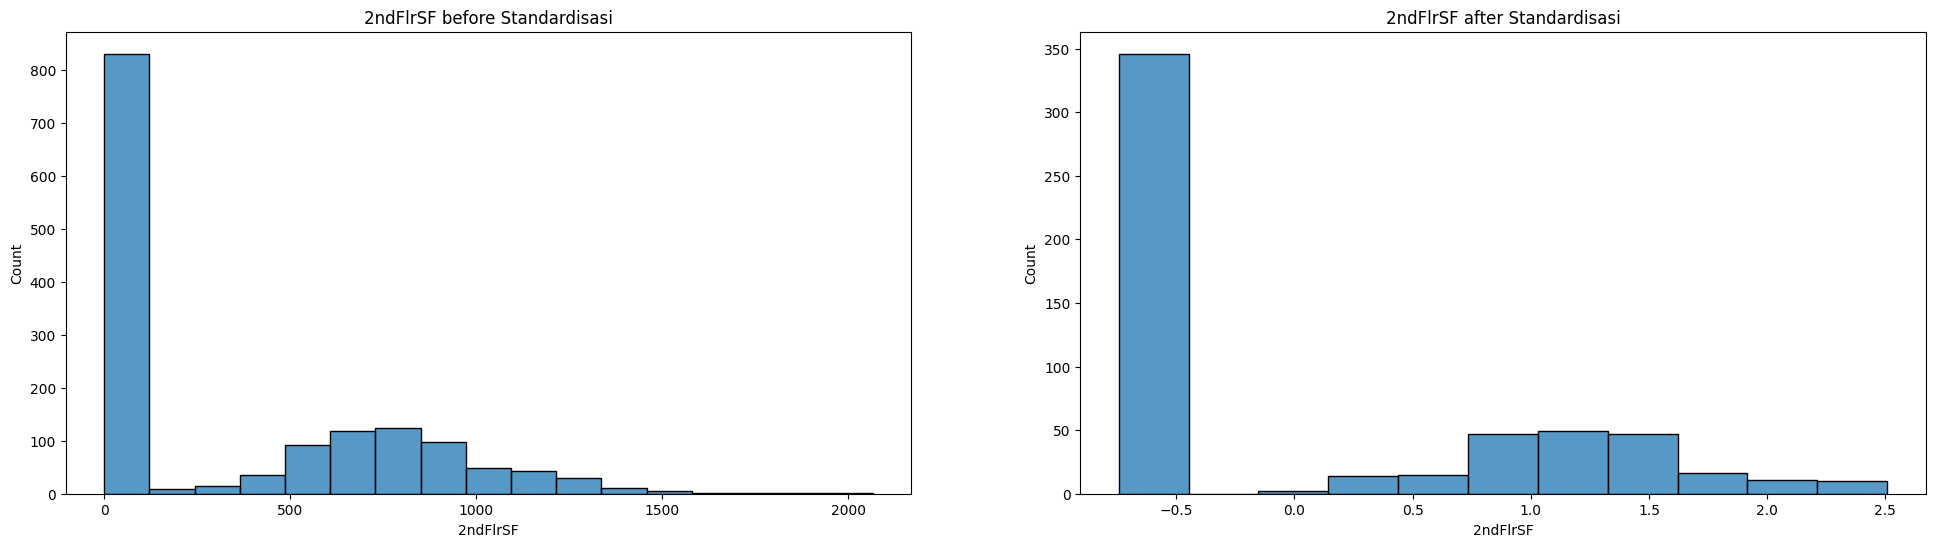

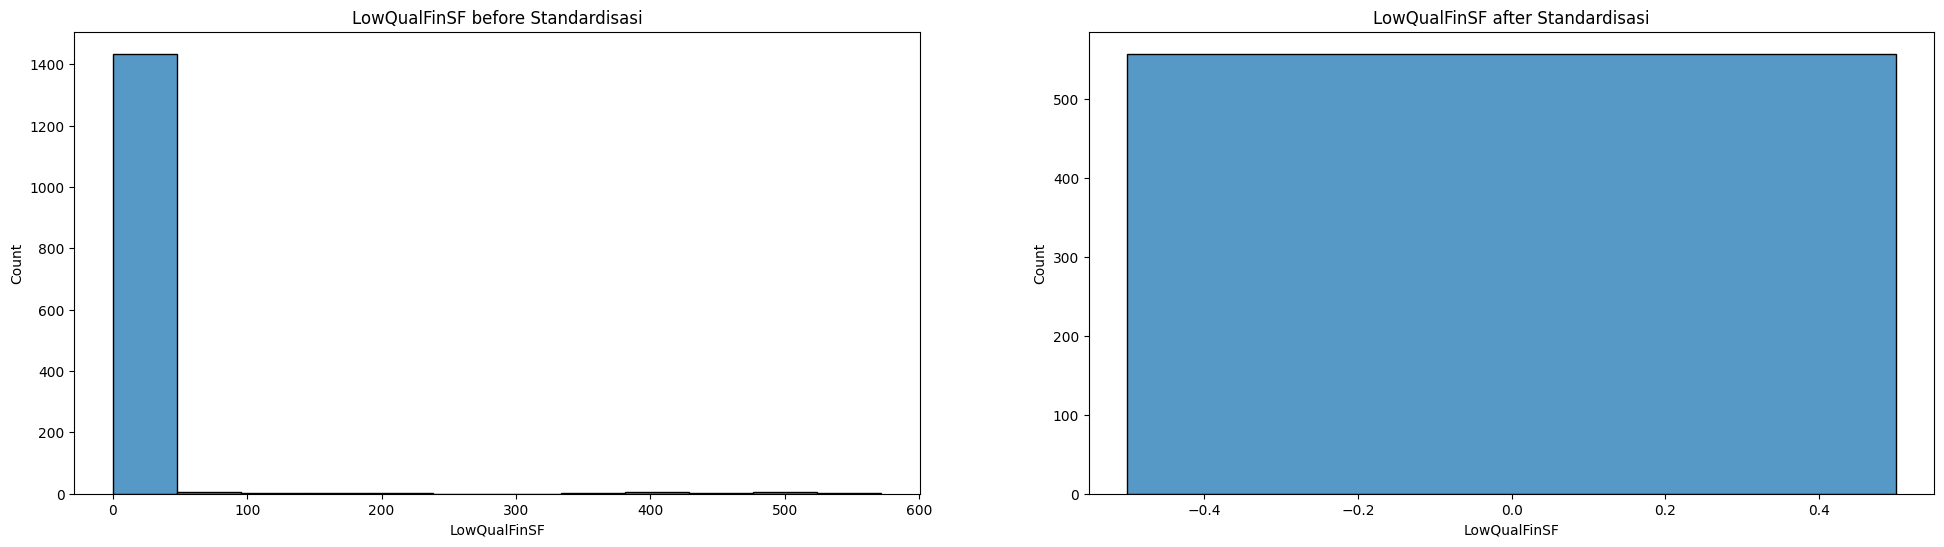

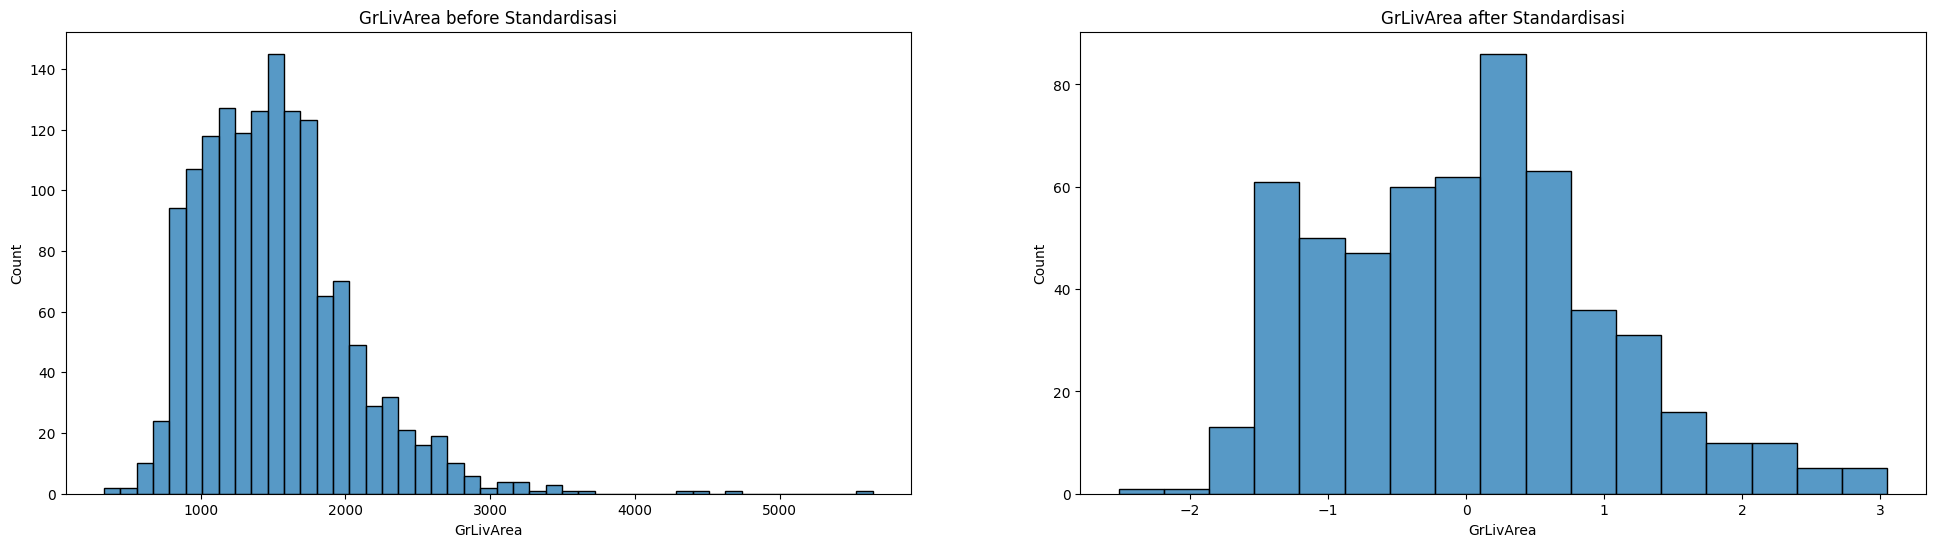

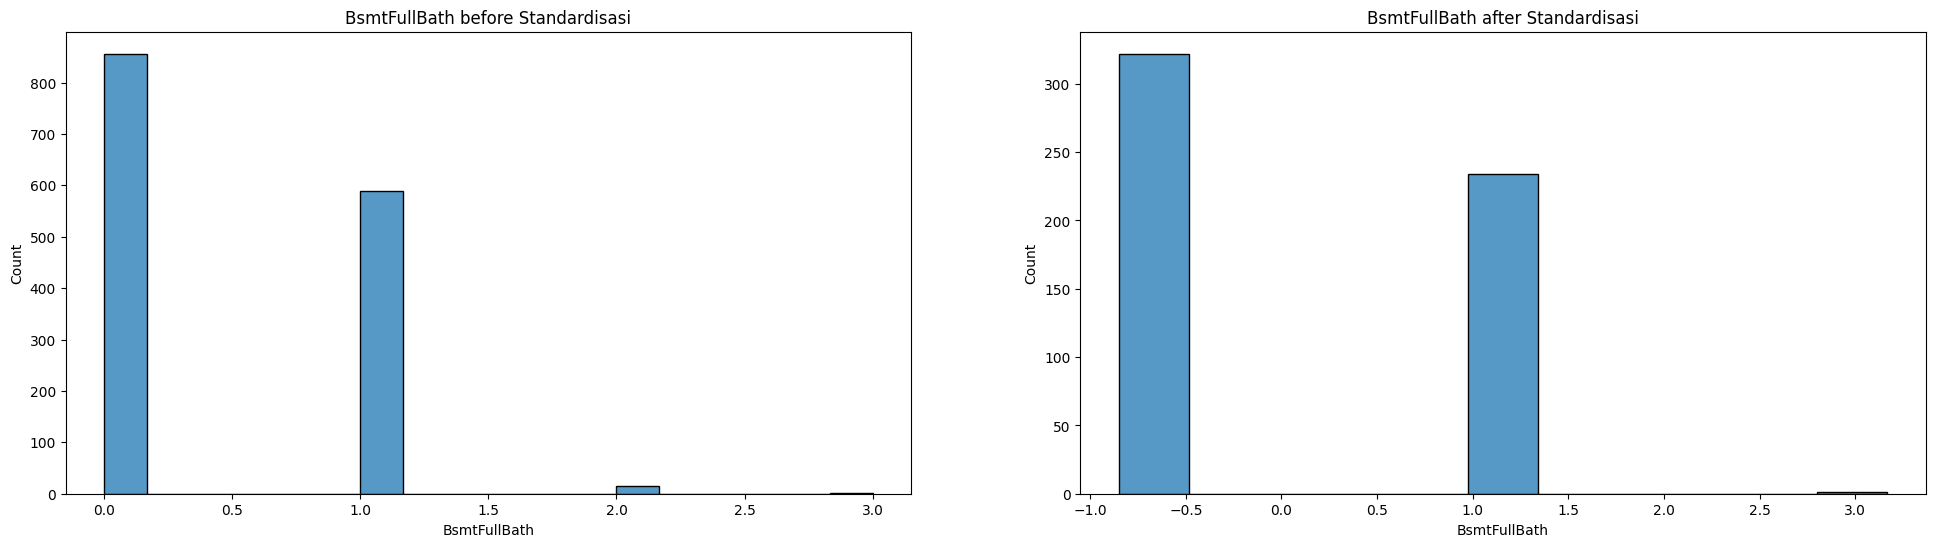

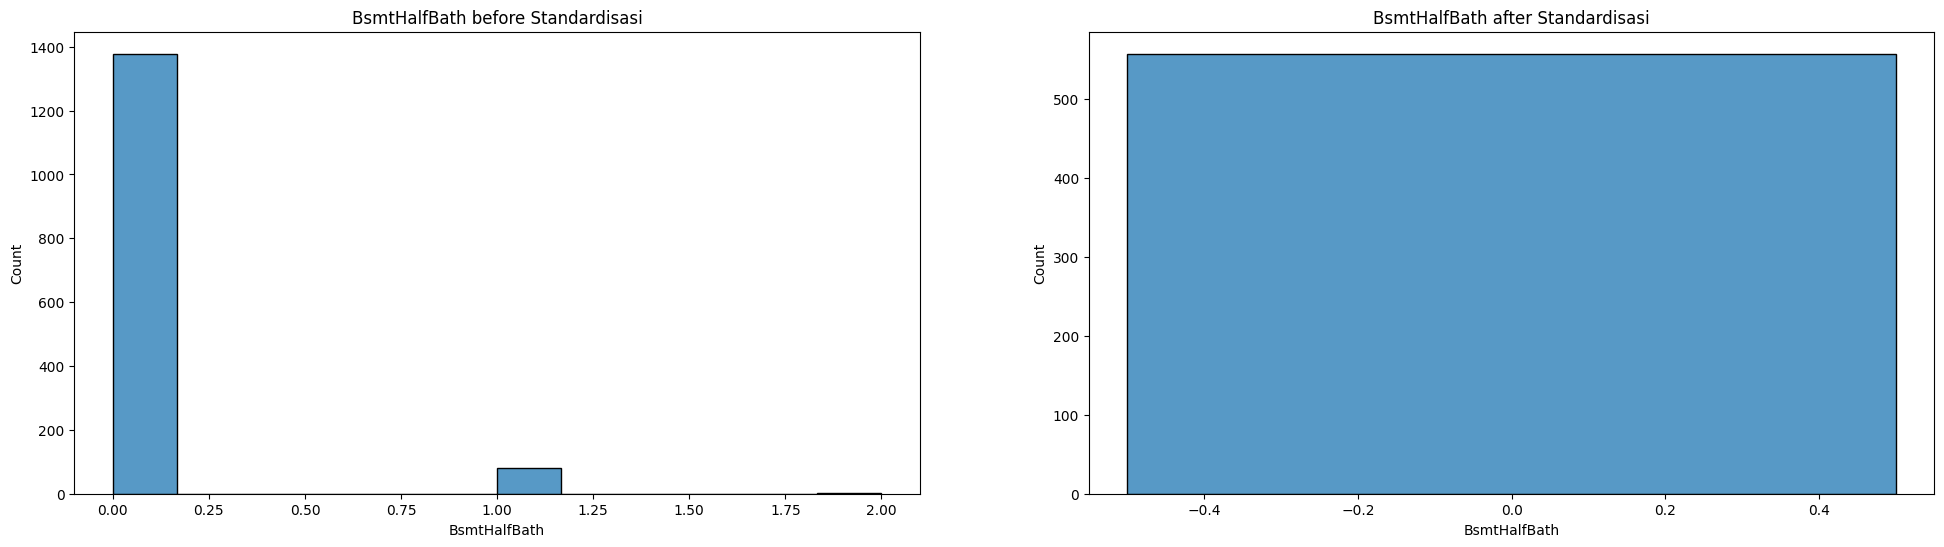

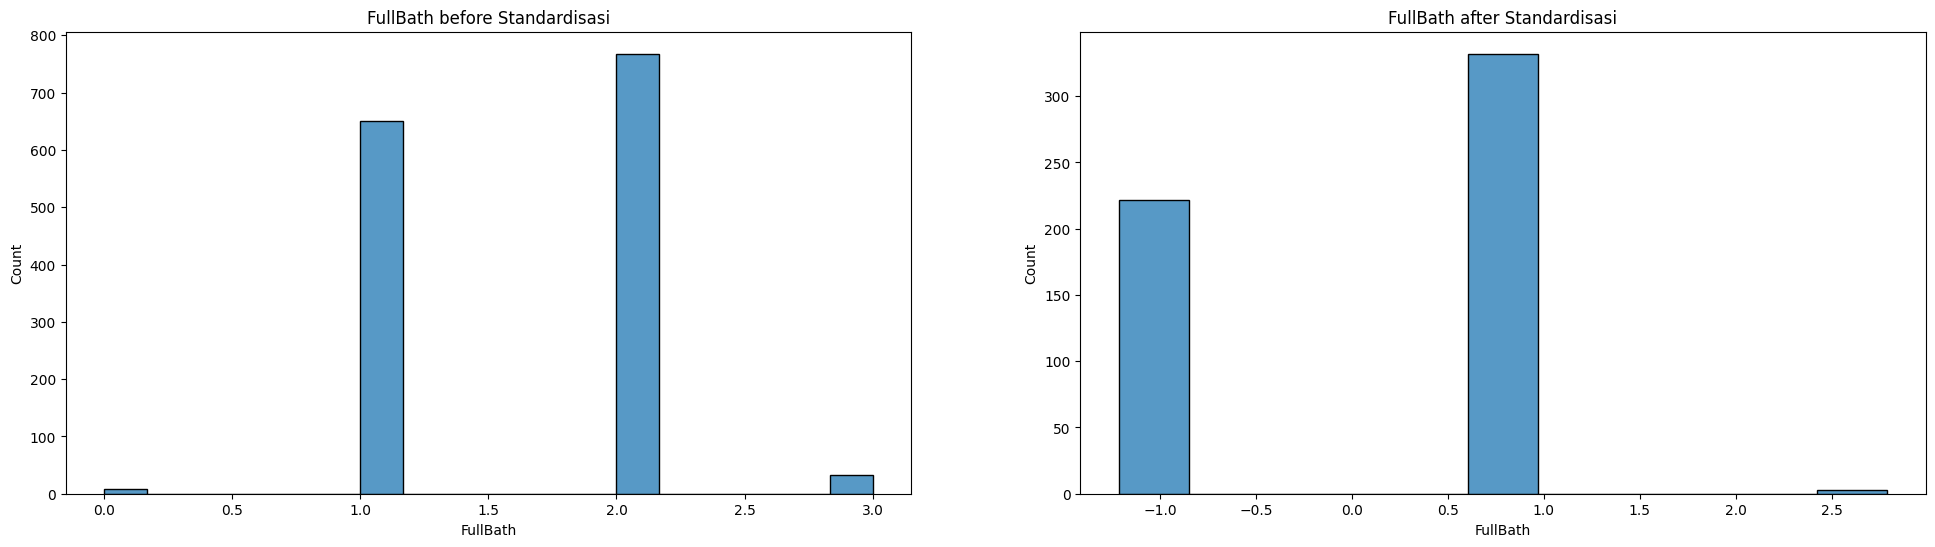

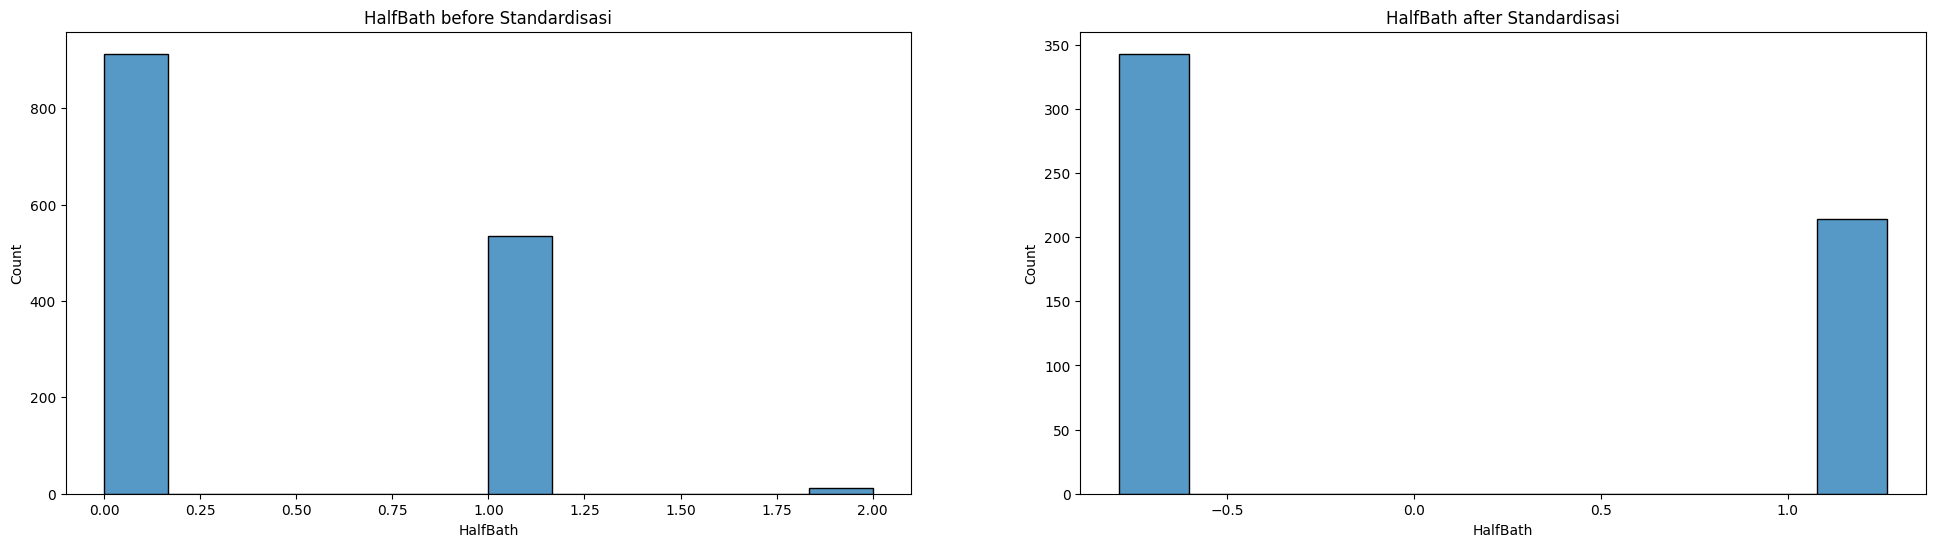

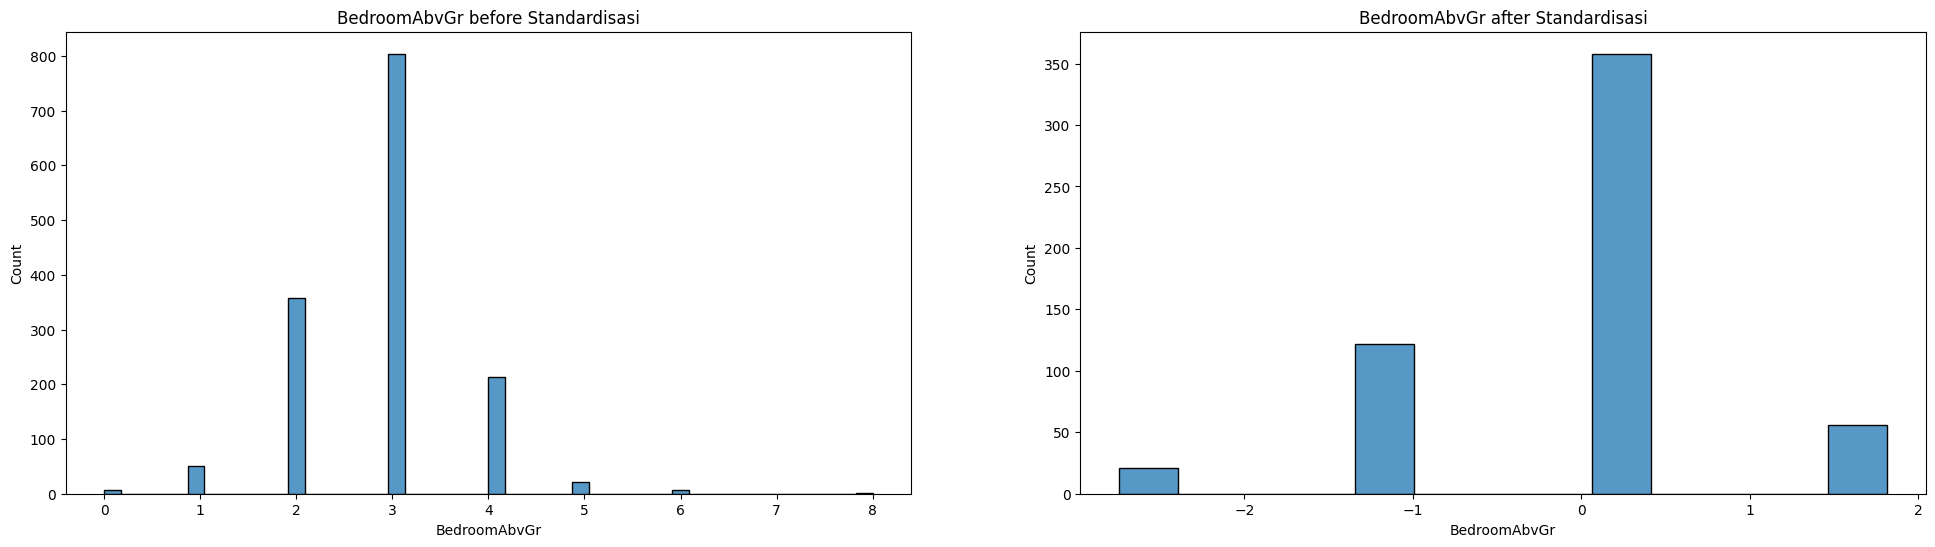

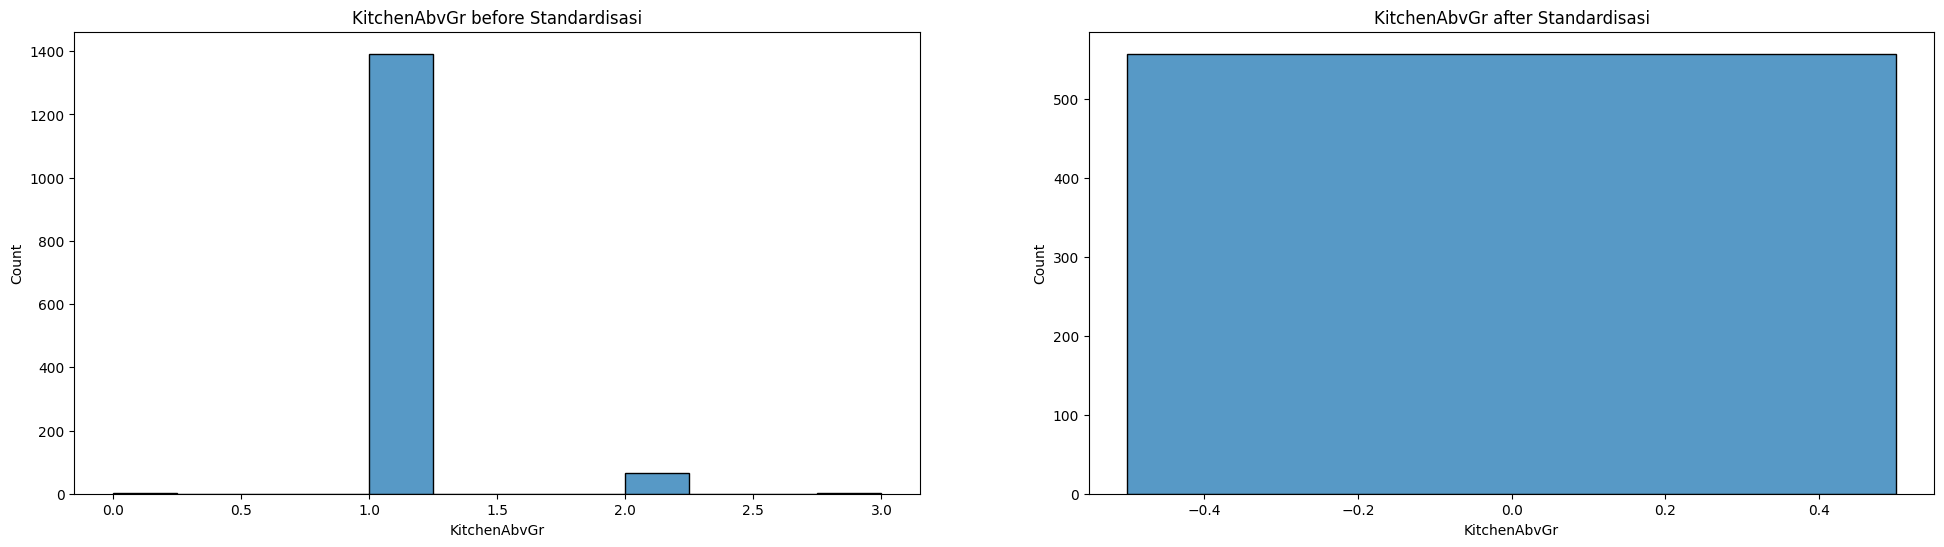

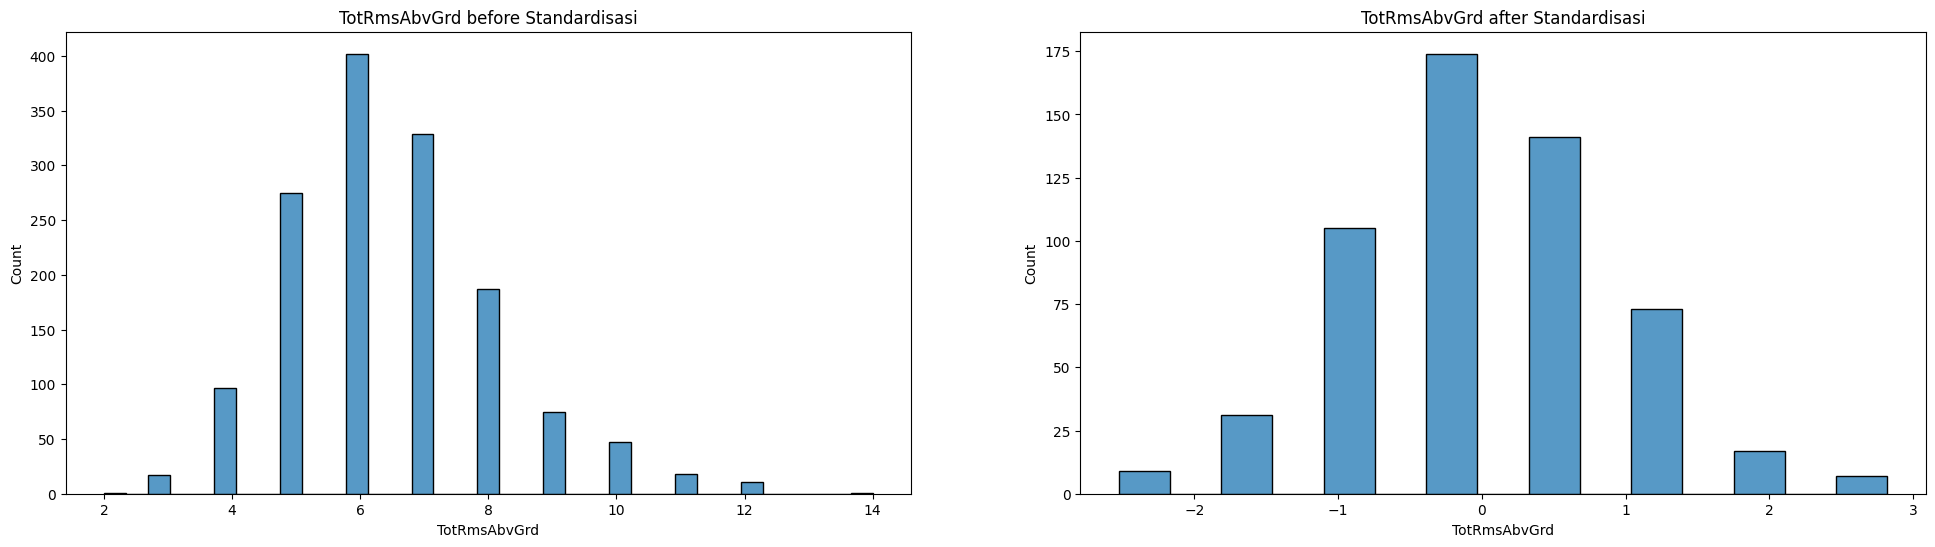

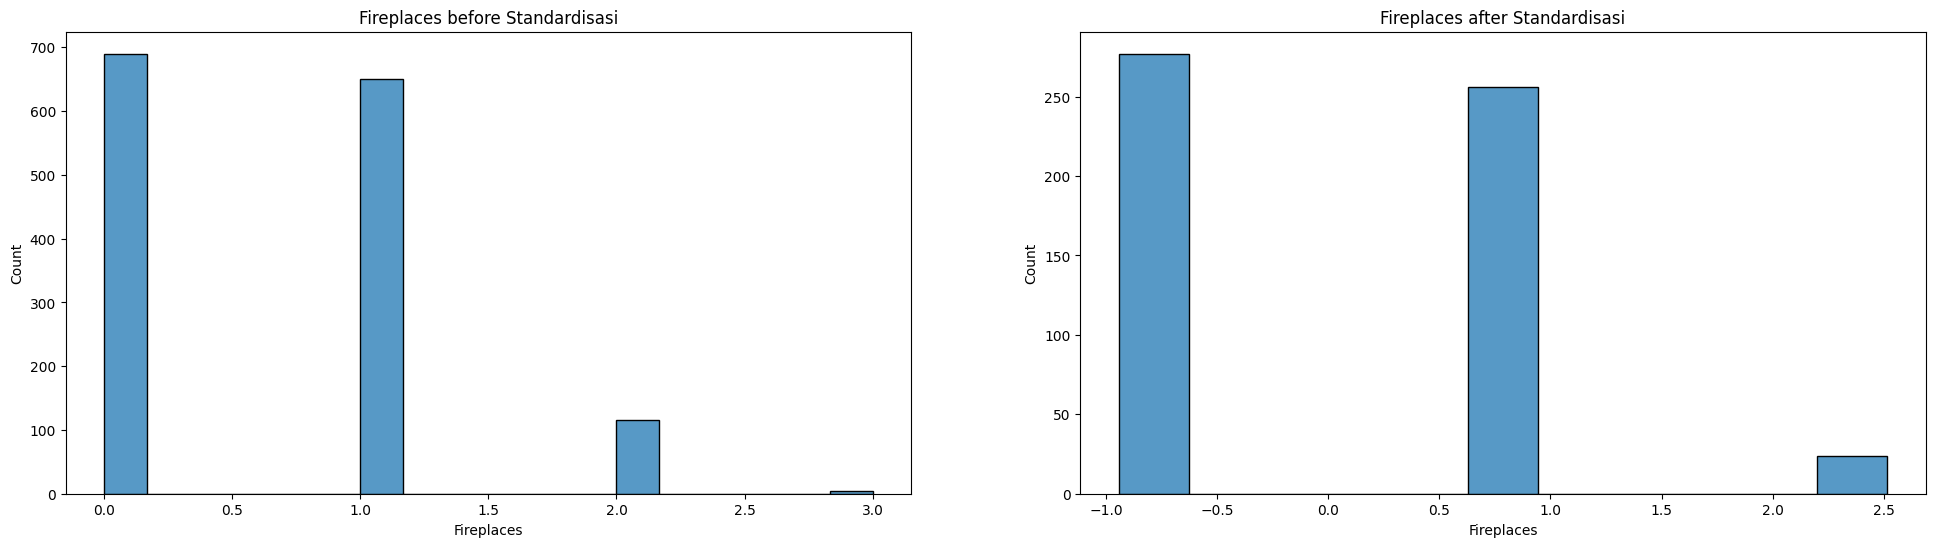

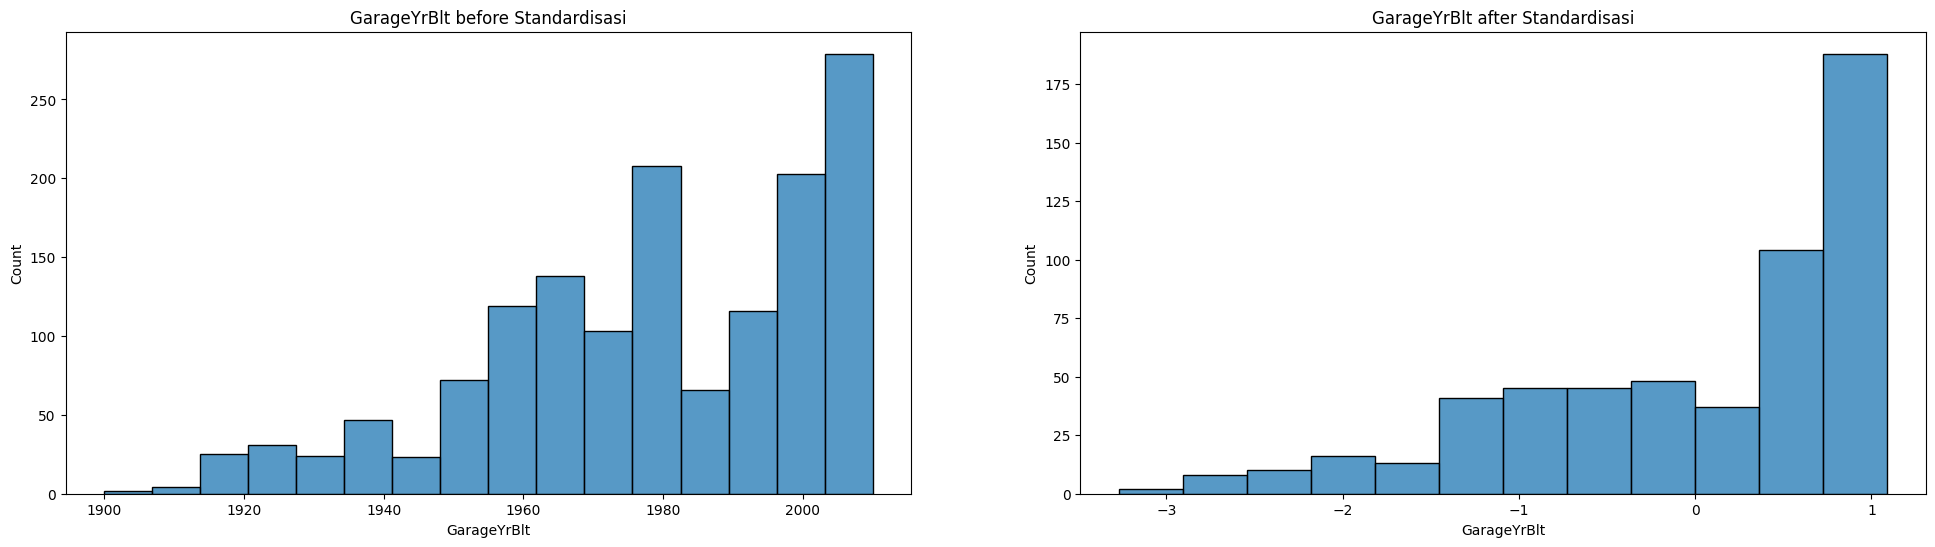

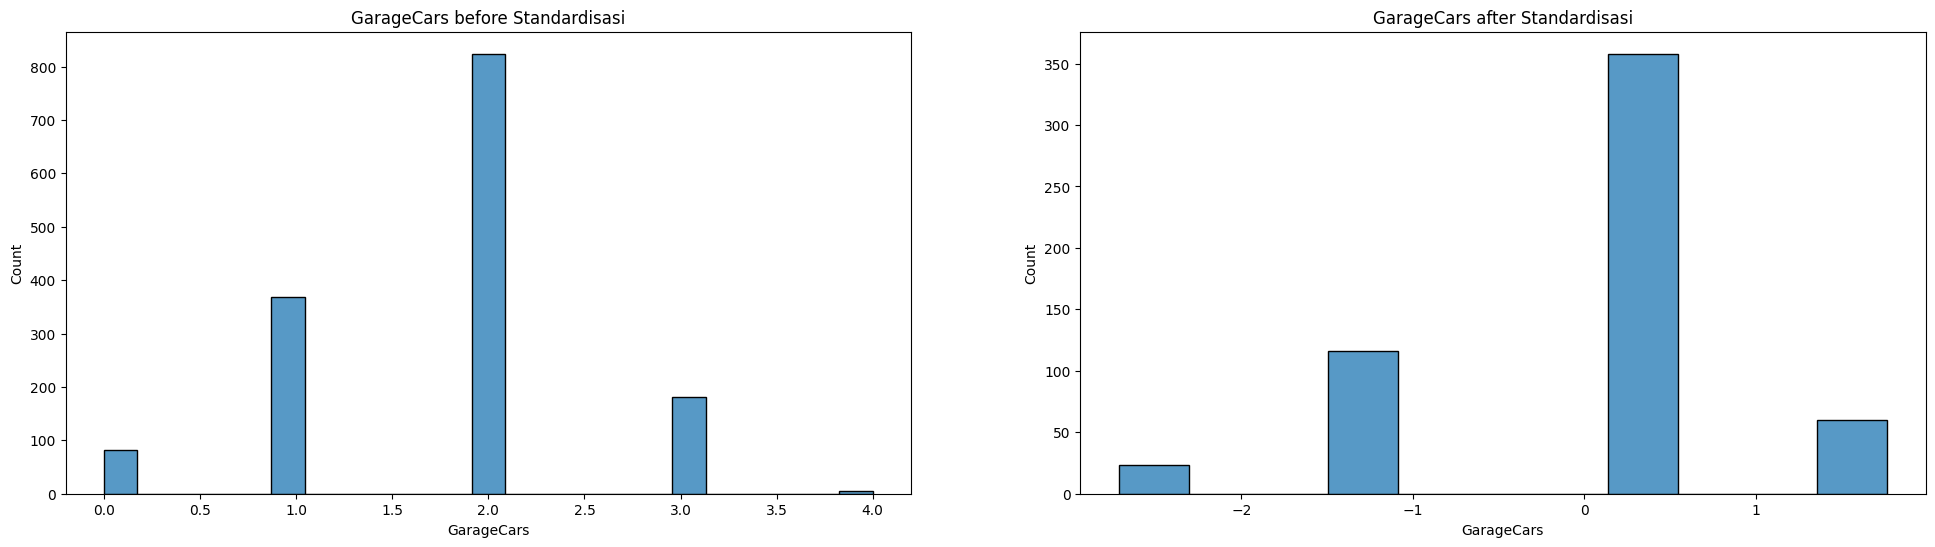

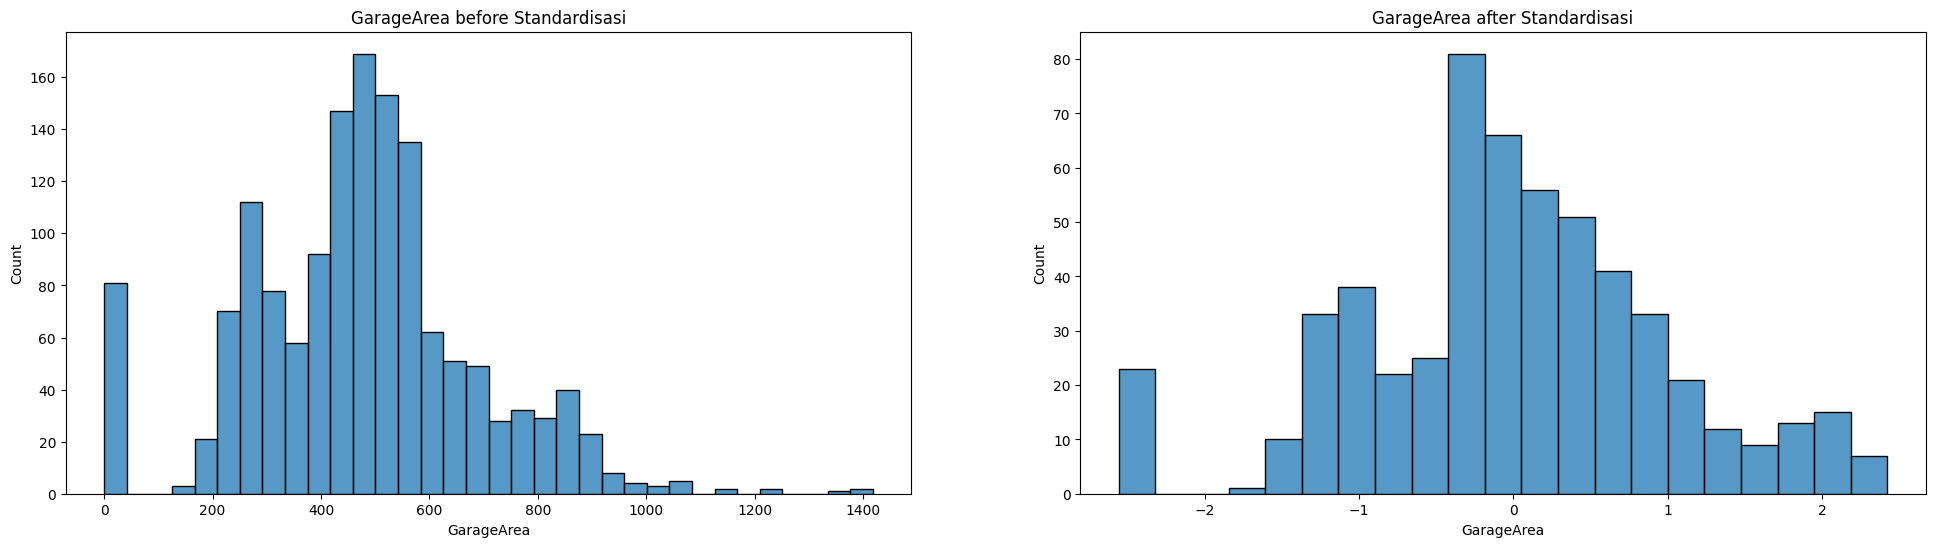

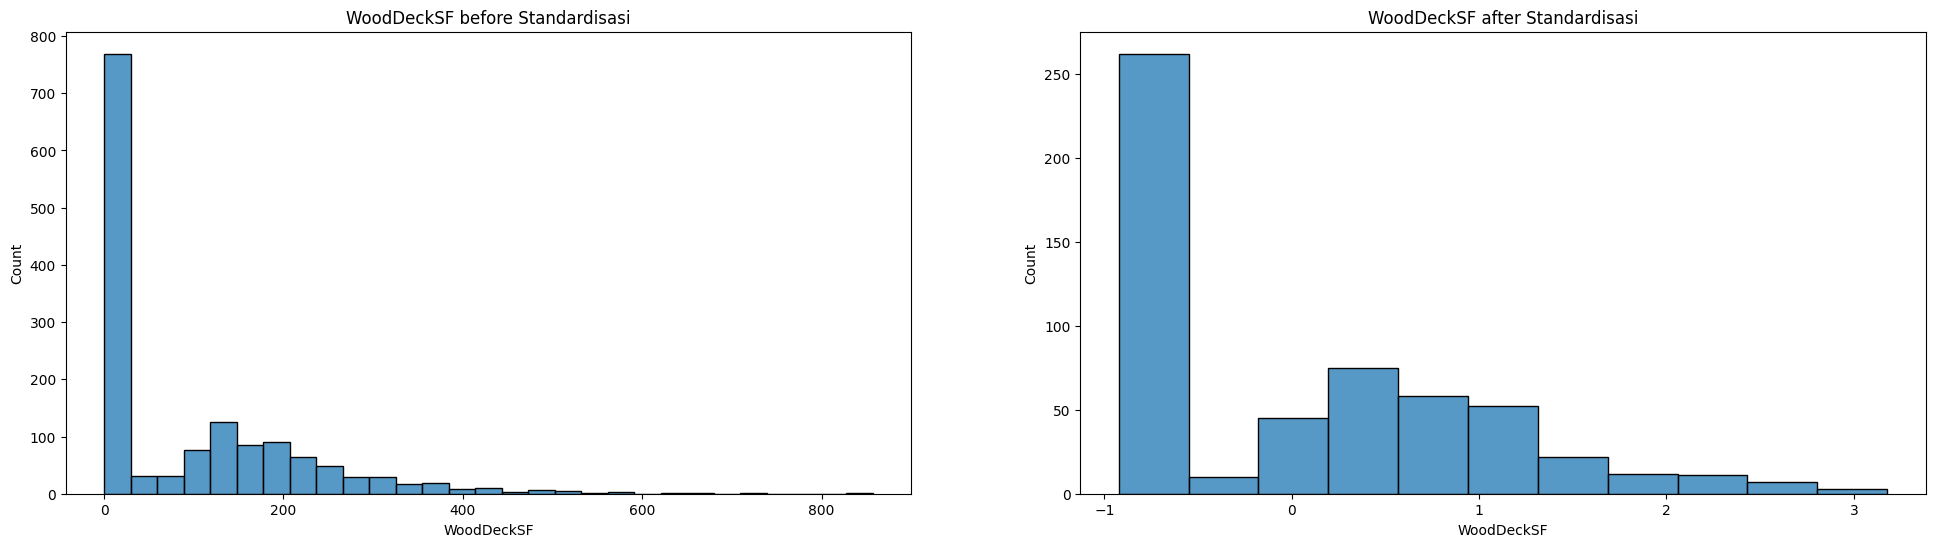

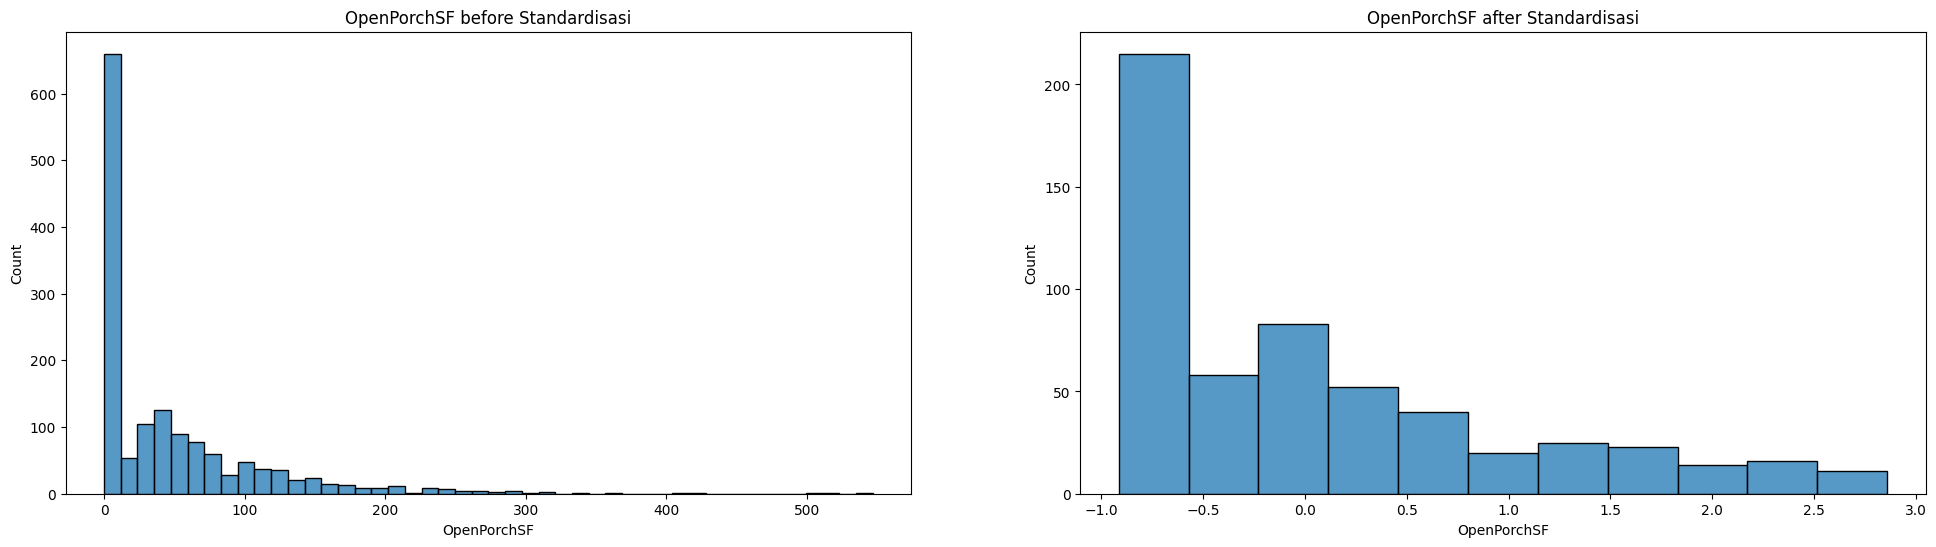

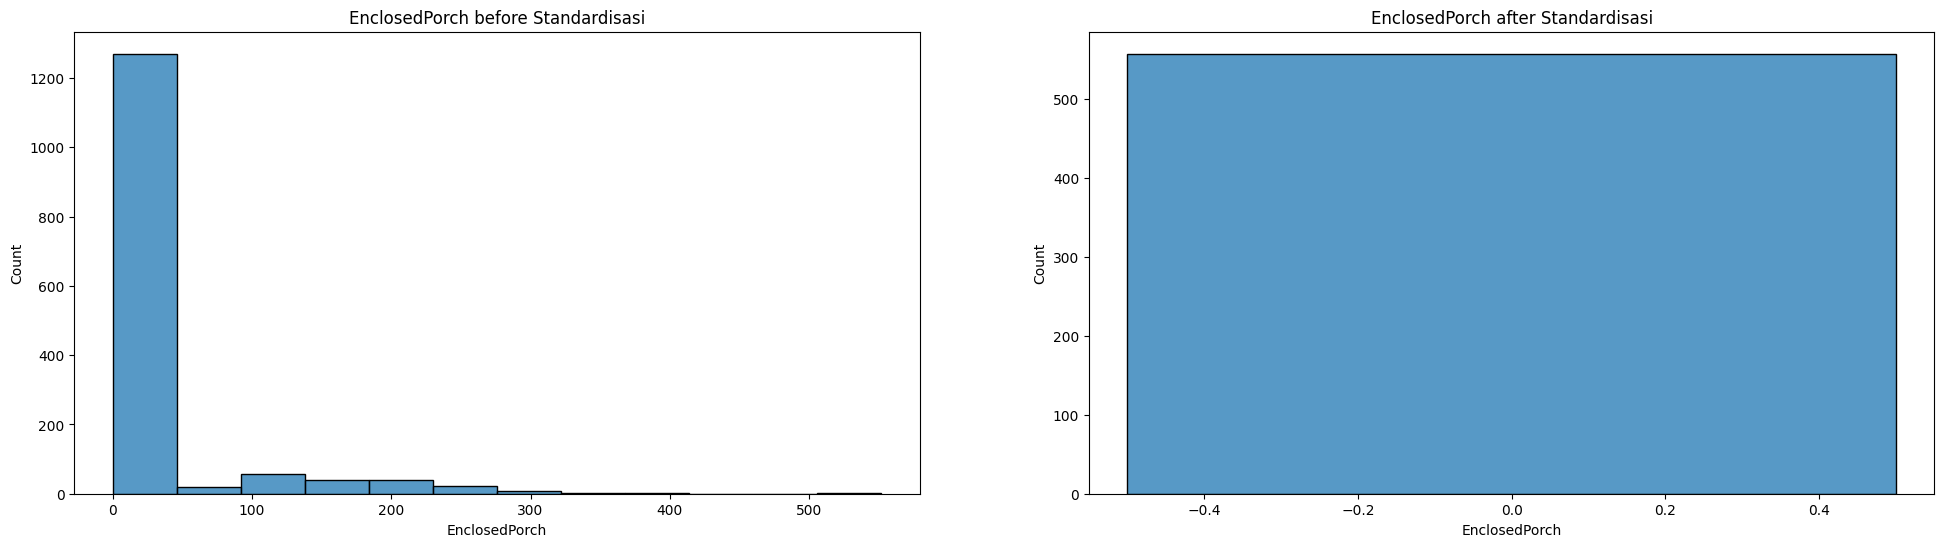

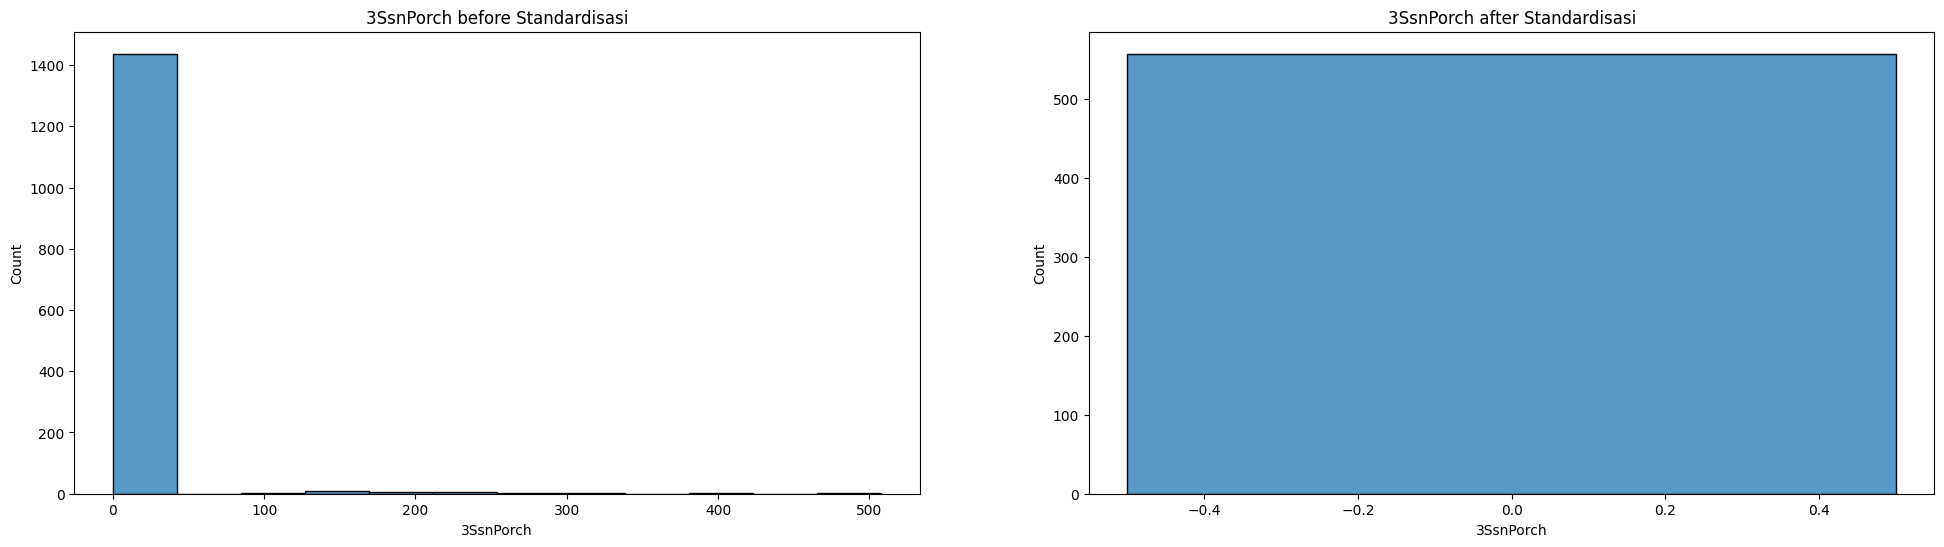

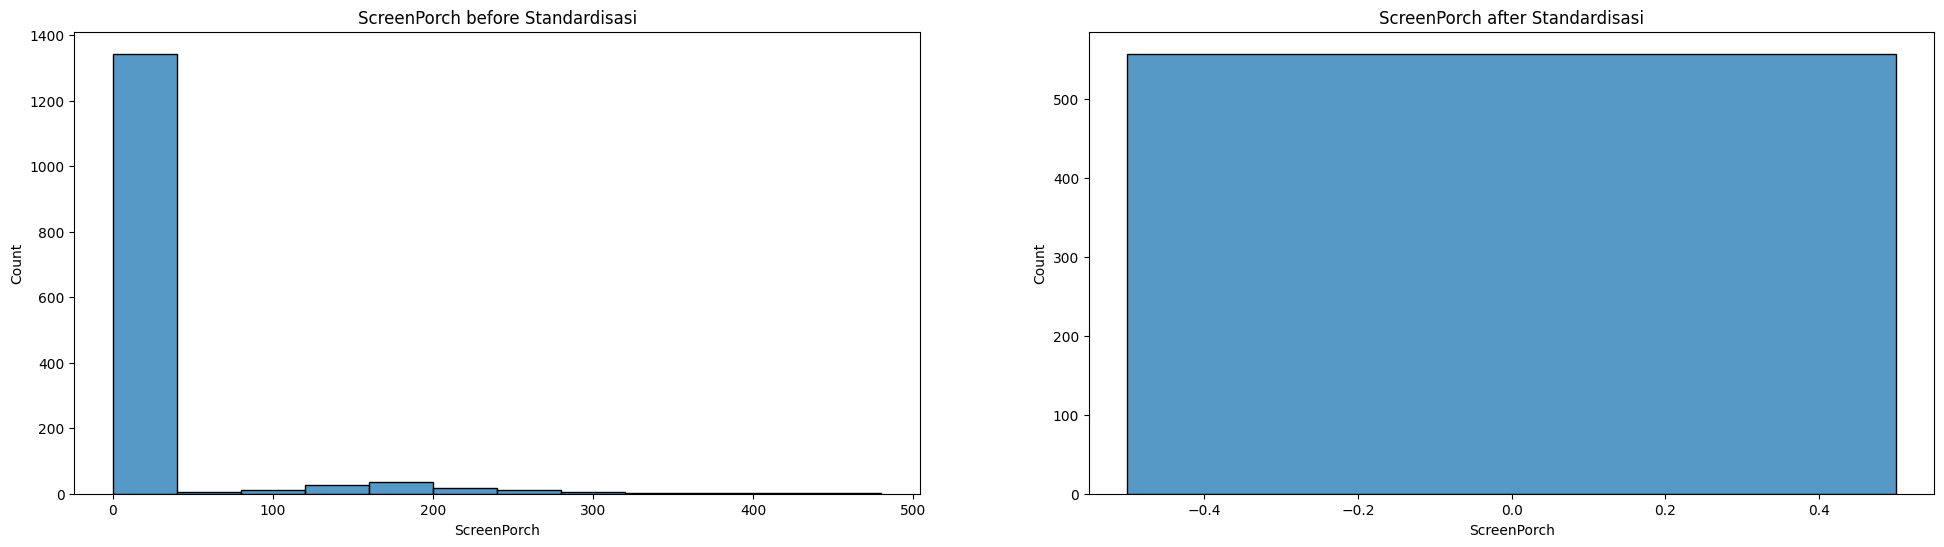

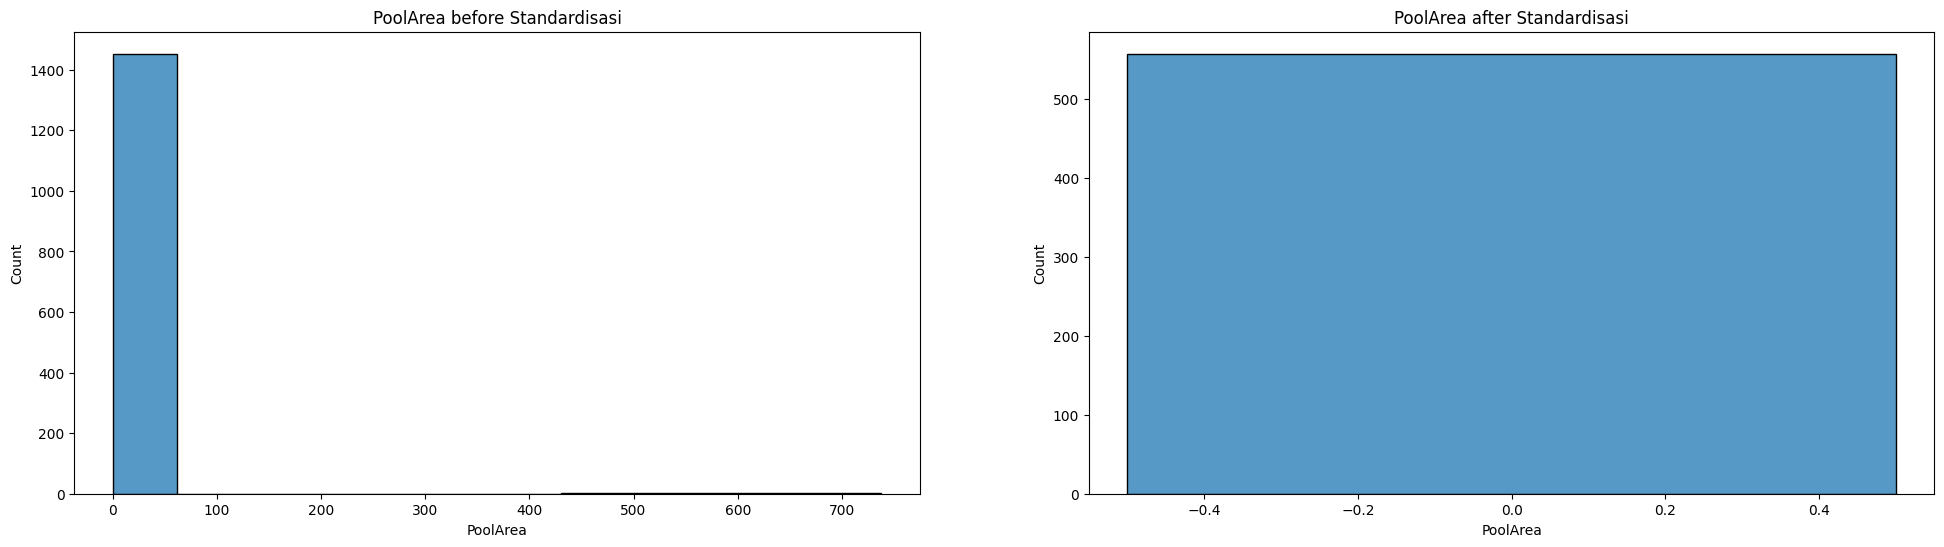

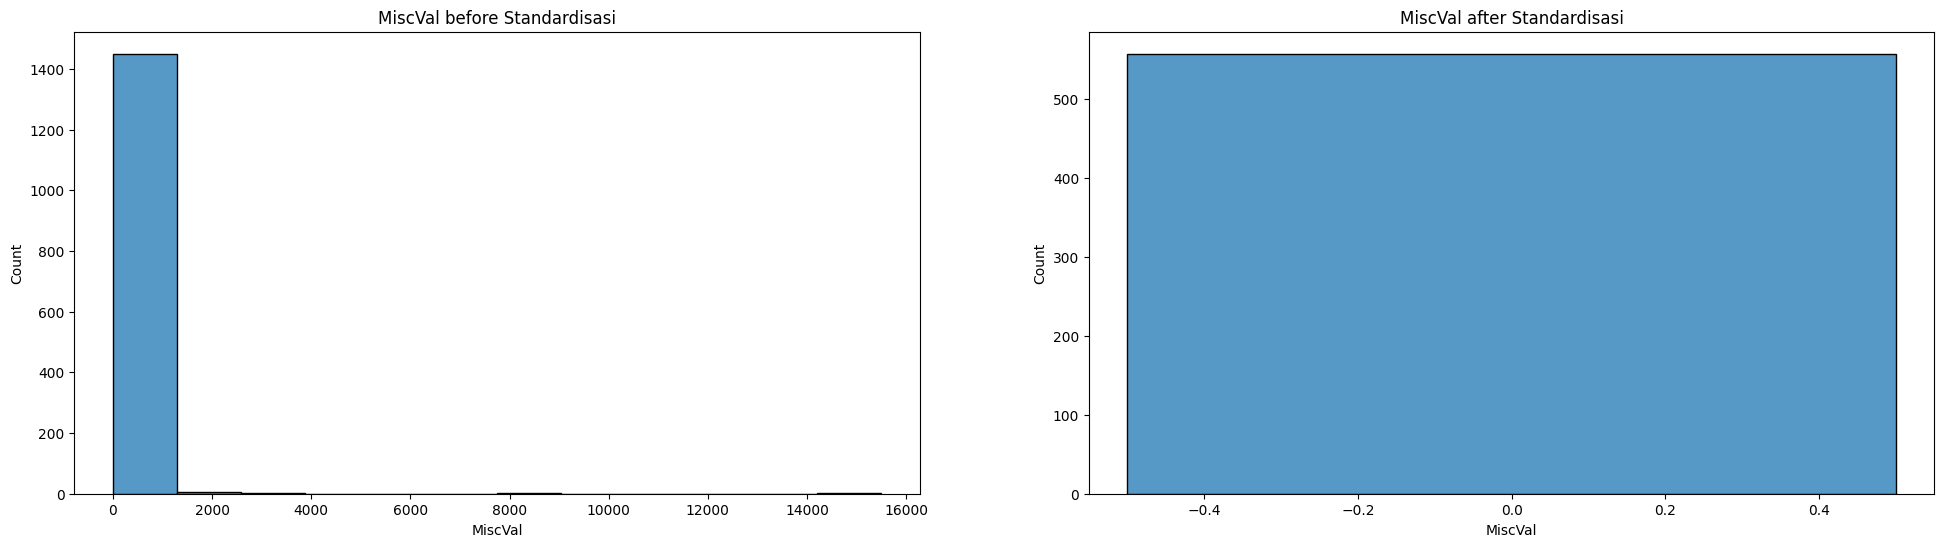

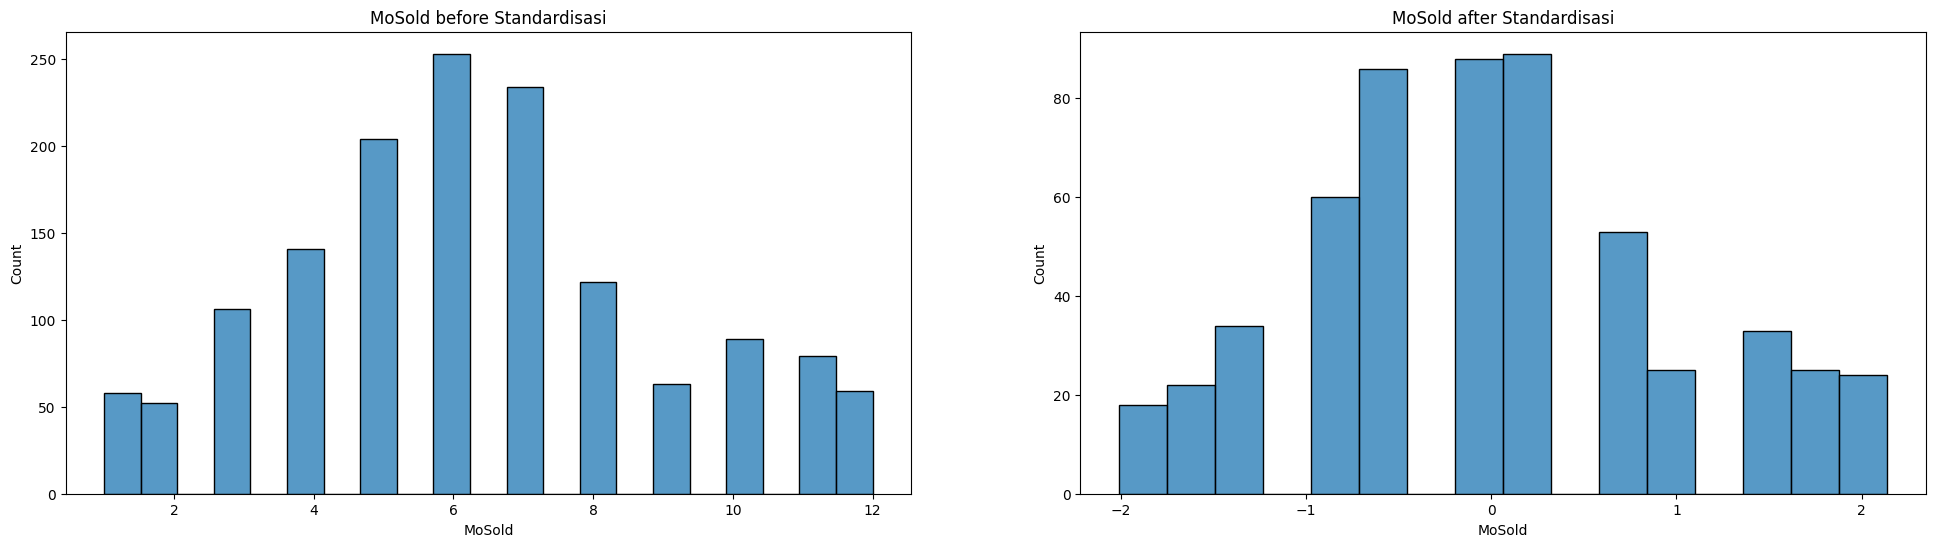

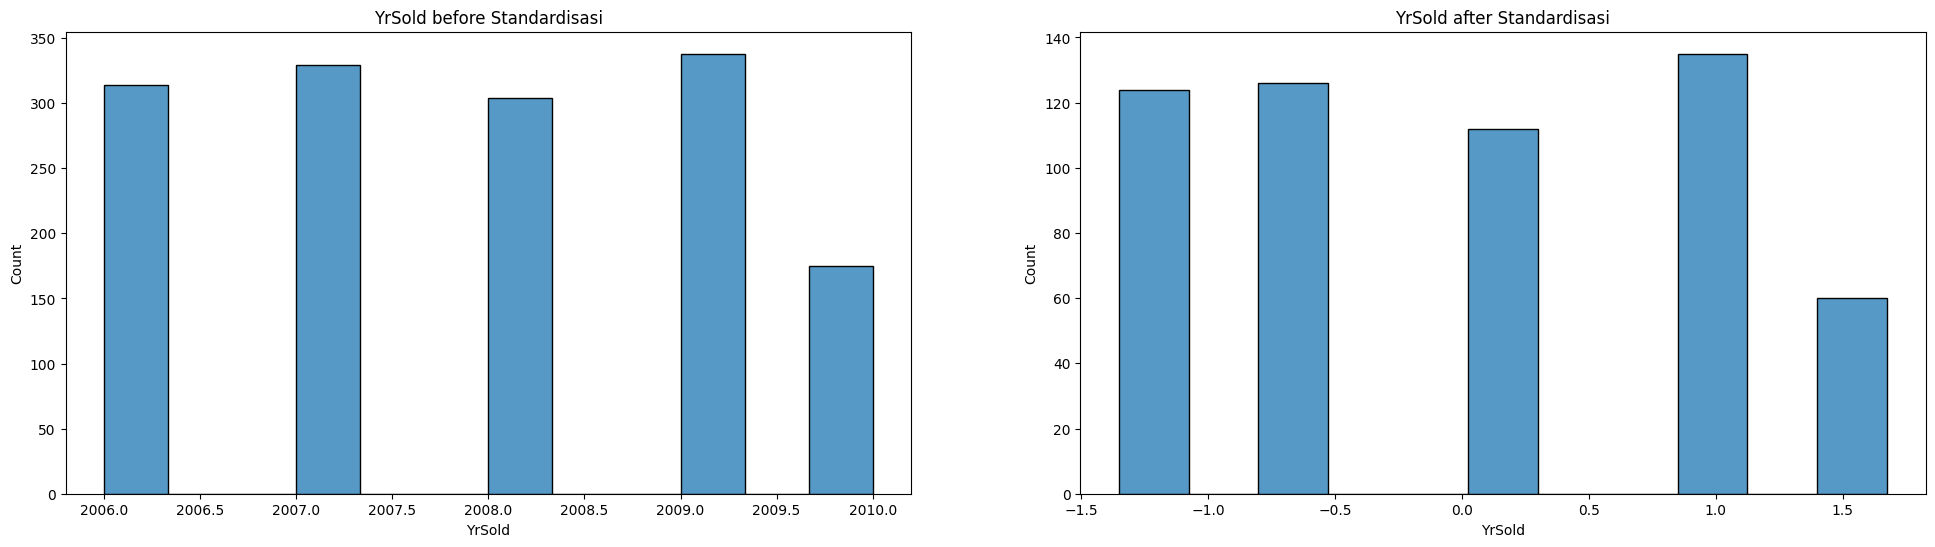

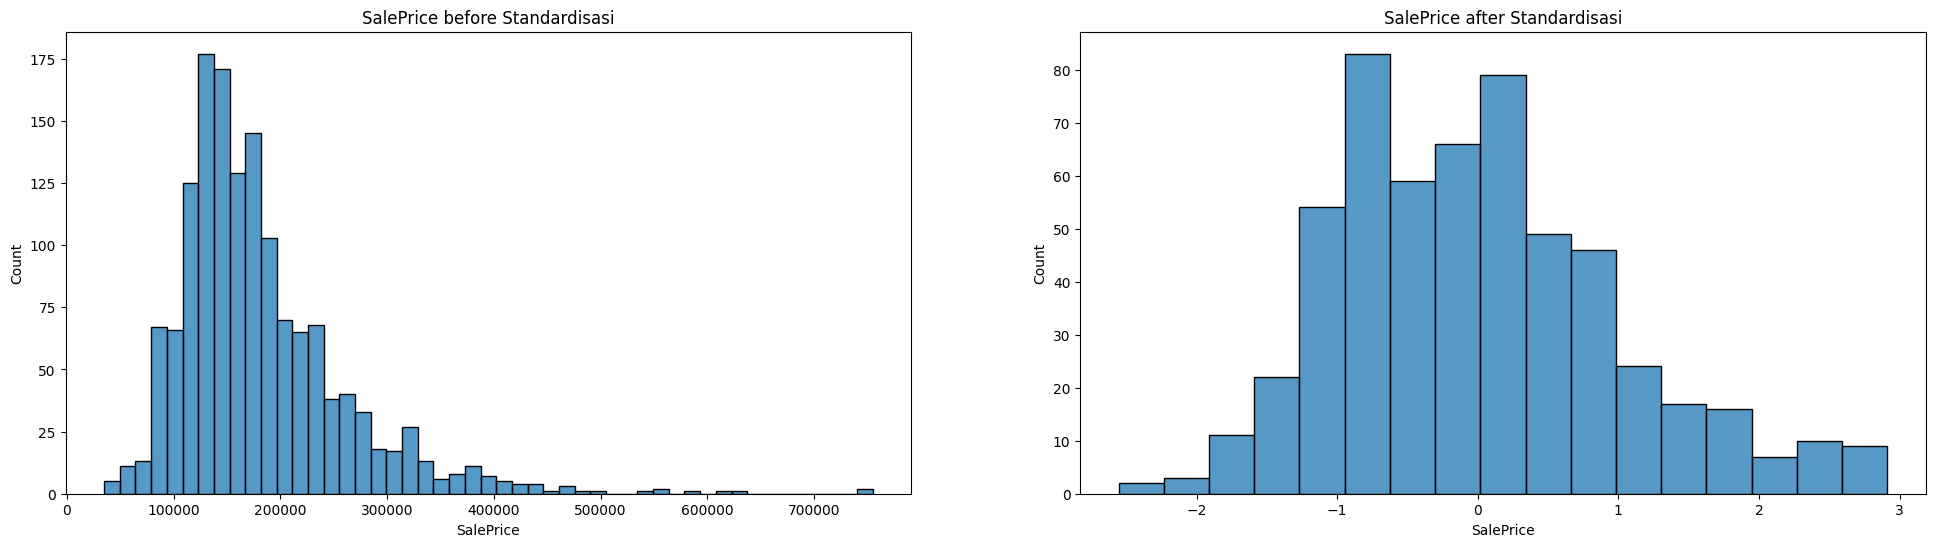

In [35]:
for feature in numeric_features:
    fig, ax = plt.subplots(1,2,figsize=(24,6))

    sns.histplot(x=train[feature], ax=ax[0])
    ax[0].set_title(f"{feature} before Standardisasi")

    sns.histplot(x=df[feature])
    ax[1].set_title(f"{feature} after Standardisasi")

    plt.show()


Menangani duplikat

In [36]:
duplicates = df.duplicated()

print("Baris duplikat : ")
# print(df[duplicates])
df[duplicates]

Baris duplikat : 


Empty DataFrame
Columns: [Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition]
Index: []

In [37]:
# # Menghapus baris duplikat
# df = df.drop_duplicates()
    
# print("DataFrame setelah menghapus duplikat:")
# print(df)

In [38]:
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

MSZoning Street LotShape  ... PavedDrive SaleType SaleCondition
0          RL   Pave      Reg  ...          Y       WD        Normal
2          RL   Pave      IR1  ...          Y       WD        Normal
4          RL   Pave      IR1  ...          Y       WD        Normal
6          RL   Pave      Reg  ...          Y       WD        Normal
10         RL   Pave      Reg  ...          Y       WD        Normal
...       ...    ...      ...  ...        ...      ...           ...
1448       RL   Pave      Reg  ...          Y       WD        Normal
1451       RL   Pave      Reg  ...          Y      New       Partial
1453       RL   Pave      Reg  ...          Y       WD       Abnorml
1454       FV   Pave      Reg  ...          Y       WD        Normal
1455       RL   Pave      Reg  ...          Y       WD        Normal

[557 rows x 39 columns]

One Hot Encoding

In [39]:
df_one_hot = pd.get_dummies(df, columns=category_features)
df_one_hot

Id  MSSubClass  ...  SaleCondition_Normal  SaleCondition_Partial
0    -1.768952    0.356986  ...                  True                  False
2    -1.764179    0.356986  ...                  True                  False
4    -1.759405    0.356986  ...                  True                  False
6    -1.754632   -0.917637  ...                  True                  False
10   -1.745085   -0.917637  ...                  True                  False
...        ...         ...  ...                   ...                    ...
1448  1.687057    0.038330  ...                  True                  False
1451  1.694217   -0.917637  ...                 False                   True
1453  1.698991   -0.917637  ...                 False                  False
1454  1.701378   -0.917637  ...                  True                  False
1455  1.703764    0.356986  ...                  True                  False

[557 rows x 216 columns]

In [40]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 557 entries, 0 to 1455
Columns: 216 entries, Id to SaleCondition_Partial
dtypes: bool(178), float64(38)
memory usage: 266.5 KB


In [41]:
df_one_hot.sample(10)

Id  MSSubClass  ...  SaleCondition_Normal  SaleCondition_Partial
83   -1.570852   -0.917637  ...                  True                  False
1207  1.111851   -0.917637  ...                  True                  False
32   -1.692576   -0.917637  ...                  True                  False
1113  0.887497   -0.917637  ...                  True                  False
1319  1.379167   -0.917637  ...                  True                  False
715  -0.062428   -0.917637  ...                  True                  False
1356  1.467477   -0.917637  ...                  True                  False
1105  0.868403    0.356986  ...                  True                  False
340  -0.957458    0.356986  ...                  True                  False
1307  1.350526   -0.917637  ...                  True                  False

[10 rows x 216 columns]

In [42]:
df.head()

Id  MSSubClass  LotFrontage  ...  PavedDrive  SaleType  SaleCondition
0  -1.768952    0.356986    -0.265012  ...           Y        WD         Normal
2  -1.764179    0.356986    -0.037099  ...           Y        WD         Normal
4  -1.759405    0.356986     1.178437  ...           Y        WD         Normal
6  -1.754632   -0.917637     0.494698  ...           Y        WD         Normal
10 -1.745085   -0.917637     0.114843  ...           Y        WD         Normal

[5 rows x 77 columns]

Label Encoding

In [43]:
label_encoder = LabelEncoder()

df_lencoder = pd.DataFrame(df)

for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])

df_lencoder


Id  MSSubClass  LotFrontage  ...  PavedDrive  SaleType  SaleCondition
0    -1.768952    0.356986    -0.265012  ...           2         8              3
2    -1.764179    0.356986    -0.037099  ...           2         8              3
4    -1.759405    0.356986     1.178437  ...           2         8              3
6    -1.754632   -0.917637     0.494698  ...           2         8              3
10   -1.745085   -0.917637     0.114843  ...           2         8              3
...        ...         ...          ...  ...         ...       ...            ...
1448  1.687057    0.038330     0.114843  ...           2         8              3
1451  1.694217   -0.917637     0.722611  ...           2         6              4
1453  1.698991   -0.917637     1.634263  ...           2         8              0
1454  1.701378   -0.917637    -0.492925  ...           2         8              3
1455  1.703764    0.356986    -0.492925  ...           2         8              3

[557 rows x 77 columns]

## Exploratory dan Explanatory Data Analysis

In [44]:
df_lencoder.head()

Id  MSSubClass  LotFrontage  ...  PavedDrive  SaleType  SaleCondition
0  -1.768952    0.356986    -0.265012  ...           2         8              3
2  -1.764179    0.356986    -0.037099  ...           2         8              3
4  -1.759405    0.356986     1.178437  ...           2         8              3
6  -1.754632   -0.917637     0.494698  ...           2         8              3
10 -1.745085   -0.917637     0.114843  ...           2         8              3

[5 rows x 77 columns]

In [45]:
missing_values = df_lencoder.isnull().sum()
missing_percentage = (missing_values/ len(df_lencoder))*100

missing_data = pd.DataFrame({
    'Missing Values':missing_values,
    'Percentage' : missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

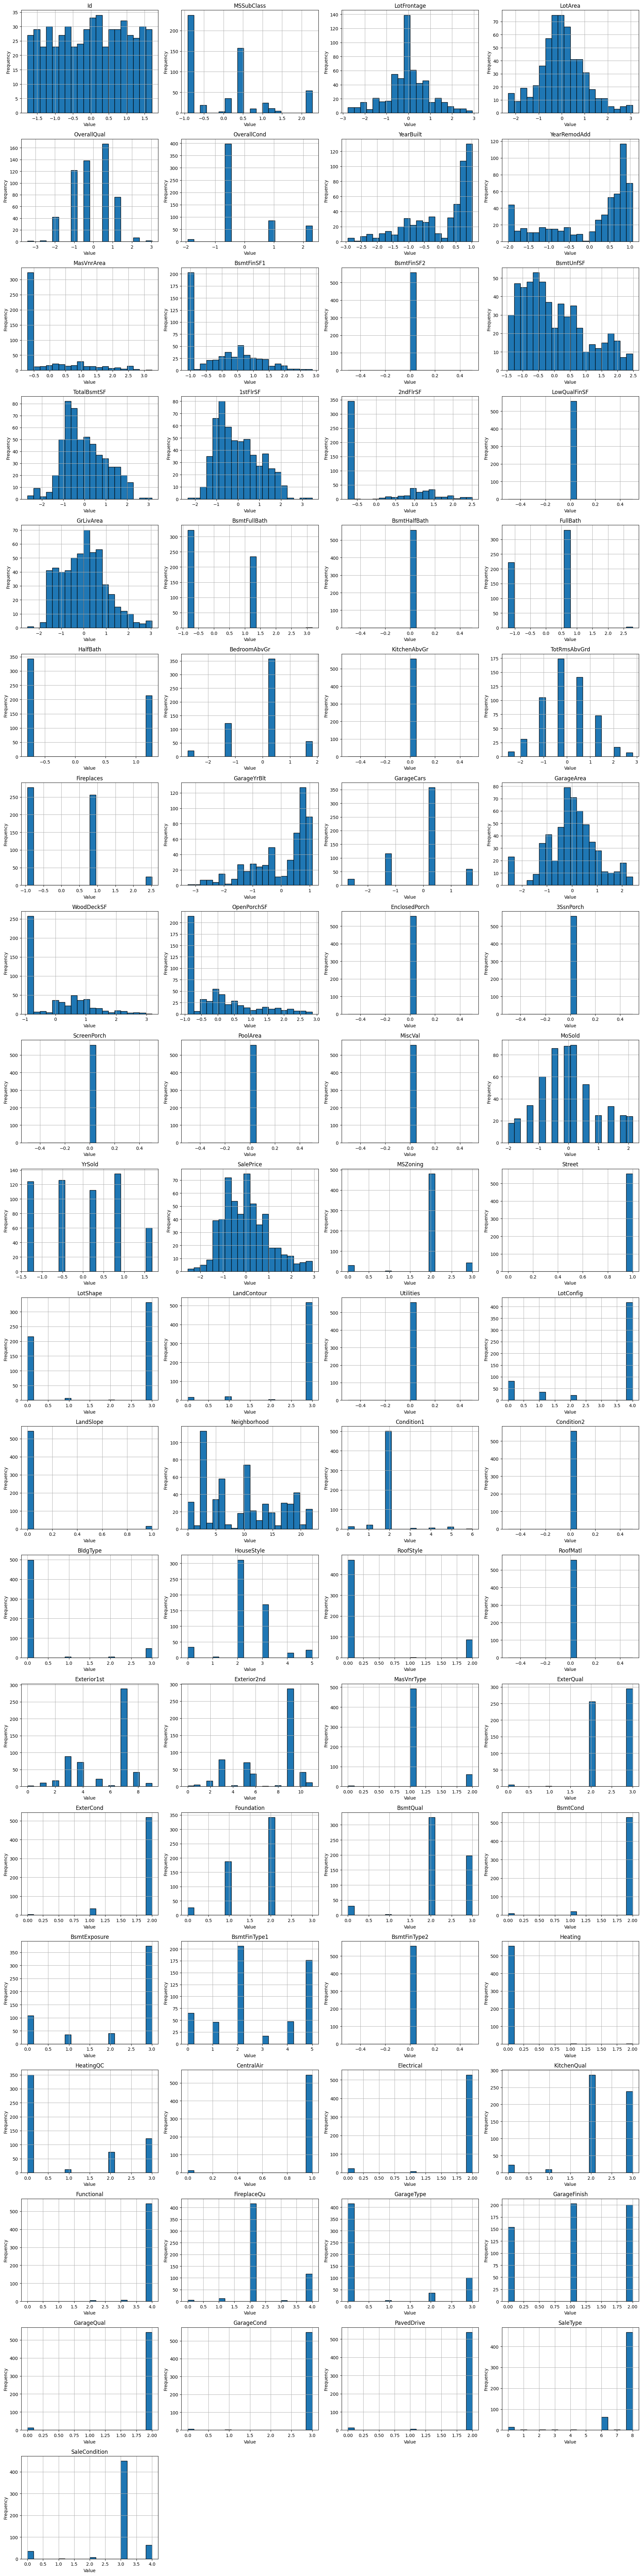

In [46]:
num_vars = df_lencoder.shape[1]

n_cols = 4
n_rows = -(-num_vars//n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (20,n_rows*4))

axes = axes.flatten()

for i, column in enumerate(df_lencoder.columns):
    df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

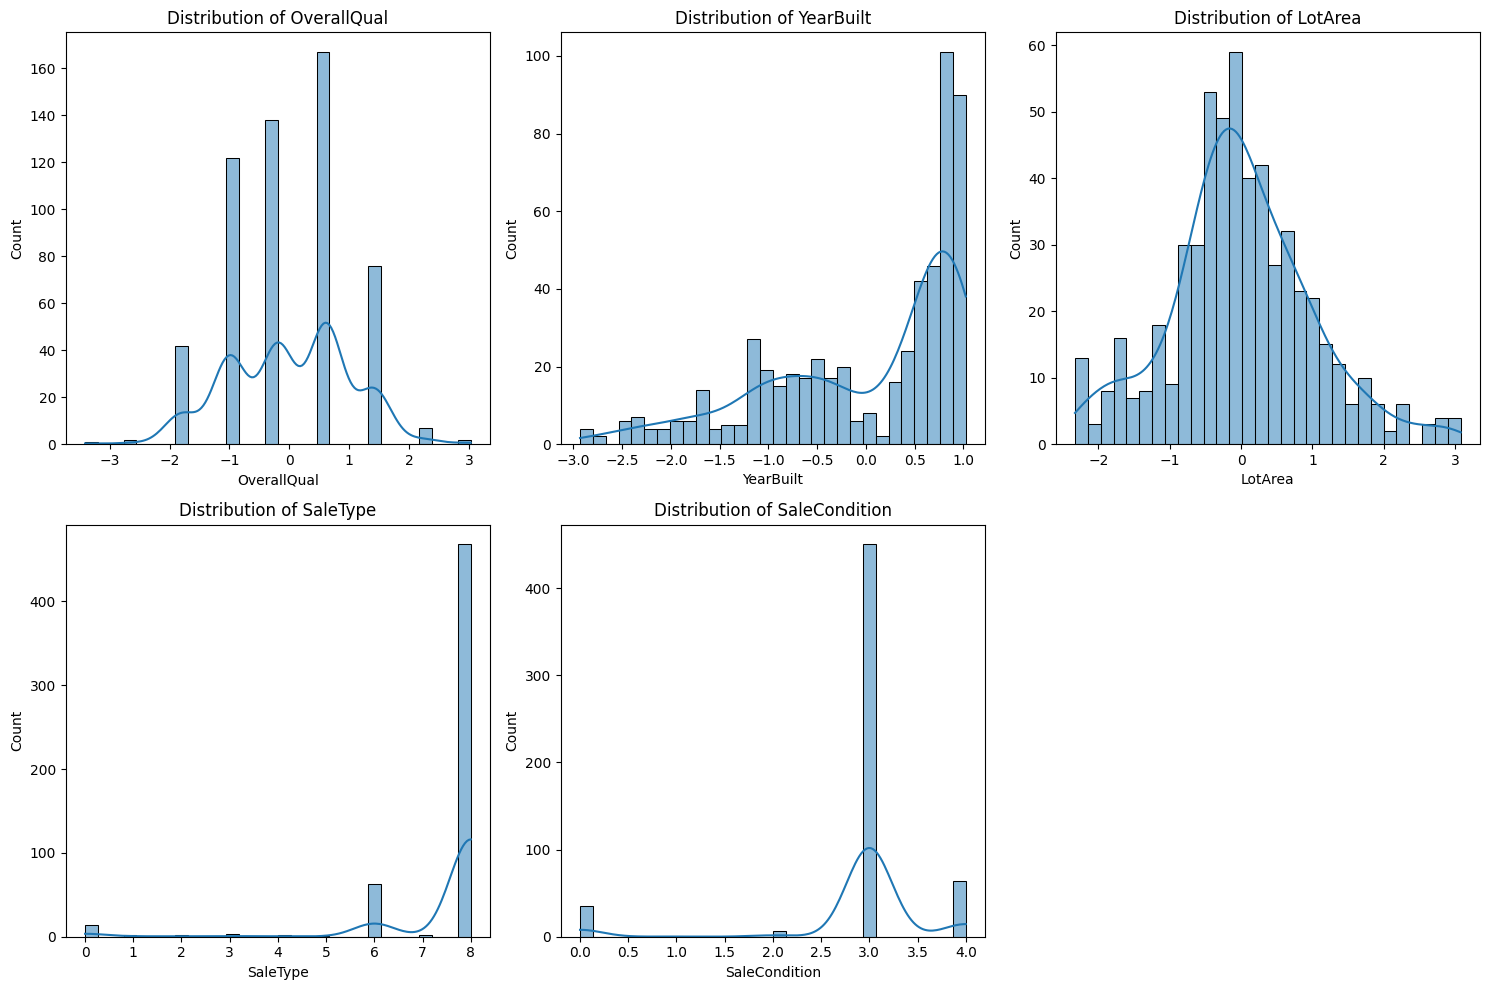

In [47]:
columns_to_plot = ['OverallQual','YearBuilt','LotArea','SaleType','SaleCondition']

plt.figure(figsize=(15,10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2,3,i)
    sns.histplot(df_lencoder[column],kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

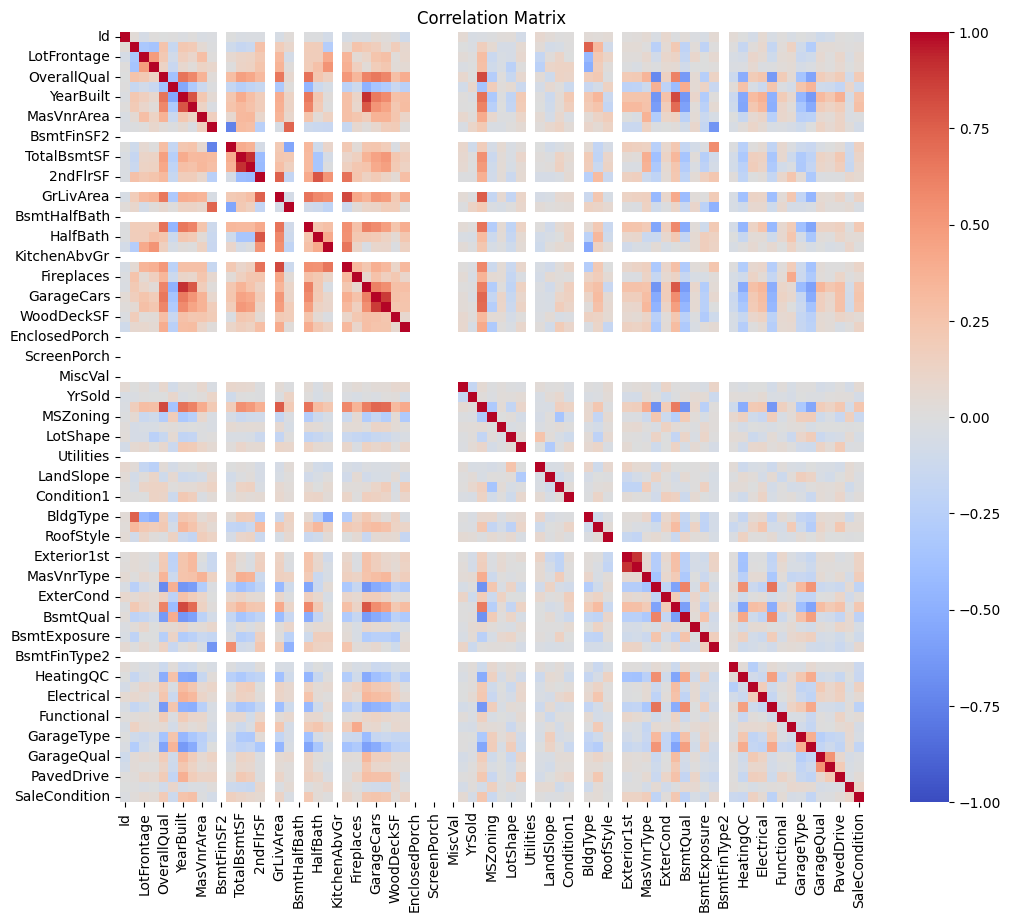

In [48]:
plt.figure(figsize=(12,10))
correlation_matrix = df_lencoder.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.show()

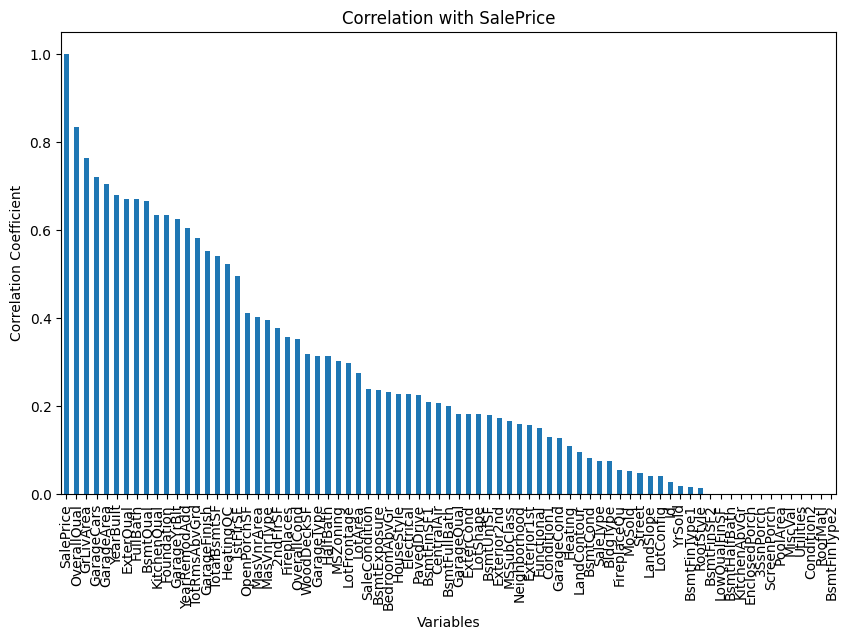

In [49]:
target_corr = df_lencoder.corr()['SalePrice']

target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10,6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with SalePrice')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

## Data Splitting

In [50]:
import sklearn

In [51]:
X = df_lencoder.drop(columns=['SalePrice'])
y = df_lencoder['SalePrice']

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [53]:
# menghitung panjang/jumlah data 
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  557
Jumlah data latih:  445
Jumlah data test:  112


## Modelling

In [54]:
# Model 1 dengan algoritma Least Angle Regression
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

# Model 2 dengan algoritma Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)

# Model 3 dengan algoritma Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train,y_train)

GradientBoostingRegressor(random_state=184)

Evaluasi Model

In [57]:
from sklearn.metrics import *

pred_lars = lars.predict(x_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

data = {
    'MAE': [mae_lars],
    'MSE' : [mse_lars],
    'R2' : [r2_lars]
}

df_results = pd.DataFrame(data, index=['Lars'])

df_results

MAE       MSE        R2
Lars  0.720054  0.817625 -0.018517

In [58]:
pred_LR = LR.predict(x_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)
 
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

MAE       MSE        R2
Lars               0.720054  0.817625 -0.018517
Linear Regression  0.237775  0.097490  0.878557

In [59]:
pred_GBR = GBR.predict(x_test)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)
 
df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

MAE       MSE        R2
Lars                       0.720054  0.817625 -0.018517
Linear Regression          0.237775  0.097490  0.878557
GradientBoostingRegressor  0.217360  0.089055  0.889065

Menyimpan Model

In [60]:
import joblib

joblib.dump(GBR, 'gbr_model.joblib')

['gbr_model.joblib']

In [61]:
import pickle

with open('gbr_model.pkl', 'wb') as file:
    pickle.dump(GBR, file)

## Deployment dan Monitoring

In [62]:
joblib_model = joblib.load('gbr_model.joblib')

with open('gbr_model.pkl', 'rb') as file:
    pickle_model = pickle.load(file)